3-bags LDA demo
============

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '..'
sys.path.append(basedir)

from experimental.three_bags_lda_for_fragments import ThreeBags_Ms2Lda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
n_topics = 250 # number of topics
n_samples = 200 # how many samples to get during Gibbs sampling
n_burn = 0 # no. of burn-in samples to discard
n_thin = 1 # thinning parameter
alpha = 50.0/n_topics # hyper-parameter for document-topic distributions
beta = 0.1 # hyper-parameter for topic-word distributions

fragment_filename = 'input/relative_intensities/Beer_3_T10_POS_fragments_rel.csv'
neutral_loss_filename = 'input/relative_intensities/Beer_3_T10_POS_losses_rel.csv'
mzdiff_filename = 'input/relative_intensities/Beer_3_T10_POS_mzdiffs_rel.csv' 

ms1_filename = 'input/relative_intensities/Beer_3_T10_POS_ms1_rel.csv'
ms2_filename = 'input/relative_intensities/Beer_3_T10_POS_ms2_rel.csv'

In [12]:
ms2lda = ThreeBags_Ms2Lda(fragment_filename, neutral_loss_filename, mzdiff_filename, 
            ms1_filename, ms2_filename, relative_intensity=True)    
df, vocab = ms2lda.preprocess()   

Data shape (856, 3697)


Fitting model...
CGS LDA initialising
......................................................................................
Using Numba for 3-bags LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1   Log joint likelihood = -7644705.375 
Sample 2   Log joint likelihood = -6309995.494 
Sample 3   Log joint likelihood = -5091988.041 
Sample 4   Log joint likelihood = -4412846.288 
Sample 5   Log joint likelihood = -4092127.360 
Sample 6   Log joint likelihood = -3919672.407 
Sample 7   Log joint likelihood = -3809341.023 
Sample 8   Log joint likelihood = -3734122.265 
Sample 9   Log joint likelihood = -3677547.371 
Sample 10   Log joint likelihood = -3635281.619 
Sample 11   Log joint likelihood = -3600070.477 
Sample 12   Log joint likelihood = -3572057.569 
Sample 13   Log joint likelihood = -3547630.962 
Sample 14   Log joint likelihood = -3526056.041 
Sample 15   Log joint likelihood = -3508447.122 
Sample 16   Log joint likelihood = -3491934.372 
Sample 17   Log joint li

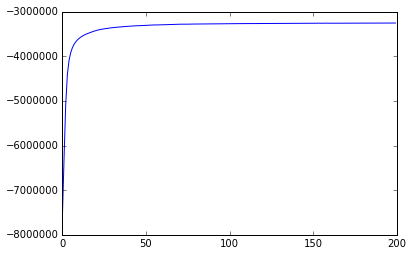

In [13]:
ms2lda.run_lda(df, vocab, n_topics, n_samples, n_burn, n_thin, alpha, beta)

In [14]:
ms2lda.write_results('beer3pos_alternative')   

Writing topics to results/beer3pos_alternative/beer3pos_alternative_topics_bag0.csv
Writing fragments x topics to results/beer3pos_alternative/beer3pos_alternative_all_bag0.csv
Writing topics to results/beer3pos_alternative/beer3pos_alternative_topics_bag1.csv
Writing fragments x topics to results/beer3pos_alternative/beer3pos_alternative_all_bag1.csv
Writing topics to results/beer3pos_alternative/beer3pos_alternative_topics_bag2.csv
Writing fragments x topics to results/beer3pos_alternative/beer3pos_alternative_all_bag2.csv
Writing topic docs to results/beer3pos_alternative/beer3pos_alternative_docs.csv


2. Shared Fragments within a Topic
--------------------------------------

For every topic, we visualise the interesting 'words' shared in common across the documents. Topics are ordered in the list below by their 'h-indices'. The consistency score (0.50 in below case) is then used to highlight interesting peaks in the plot. 0.50 means the word (fragment/loss) is present in at least 50% of the selected parent peaks for this topic. 

Topic Ranking

Topic 103 h-index=6
Topic 137 h-index=5
Topic 202 h-index=5
Topic 13 h-index=4
Topic 34 h-index=4
Topic 43 h-index=4
Topic 89 h-index=4
Topic 190 h-index=4
Topic 203 h-index=4
Topic 234 h-index=4
Topic 239 h-index=4
Topic 2 h-index=3
Topic 6 h-index=3
Topic 48 h-index=3
Topic 53 h-index=3
Topic 58 h-index=3
Topic 61 h-index=3
Topic 82 h-index=3
Topic 91 h-index=3
Topic 110 h-index=3
Topic 112 h-index=3
Topic 134 h-index=3
Topic 138 h-index=3
Topic 141 h-index=3
Topic 151 h-index=3
Topic 155 h-index=3
Topic 164 h-index=3
Topic 165 h-index=3
Topic 168 h-index=3
Topic 172 h-index=3
Topic 181 h-index=3
Topic 197 h-index=3
Topic 200 h-index=3
Topic 209 h-index=3
Topic 210 h-index=3
Topic 211 h-index=3
Topic 217 h-index=3
Topic 219 h-index=3
Topic 245 h-index=3
Topic 0 h-index=2
Topic 1 h-index=2
Topic 4 h-index=2
Topic 5 h-index=2
Topic 8 h-index=2
Topic 15 h-index=2
Topic 19 h-index=2
Topic 20 h-index=2
Topic 21 h-index=2
Topic 22 h-index=2
Topic 26 h-index=2
Topic 31 h-inde

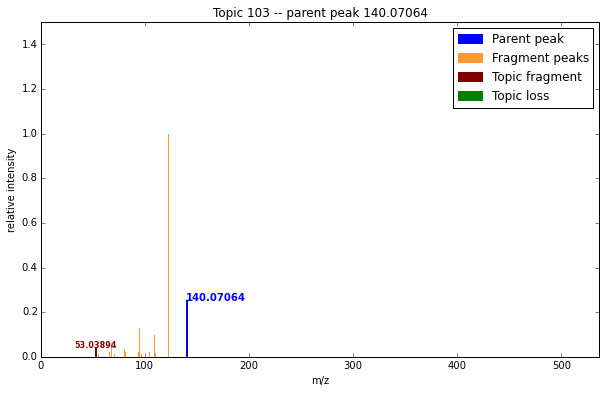

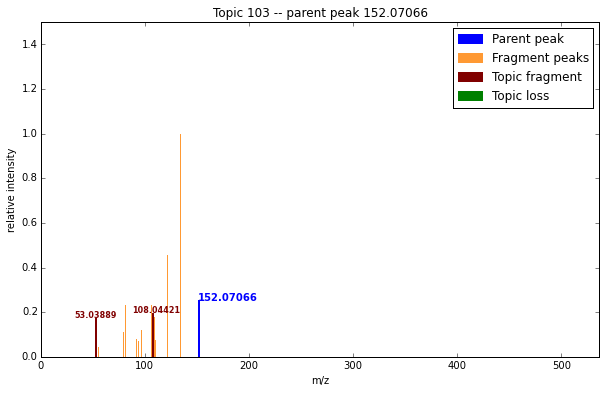

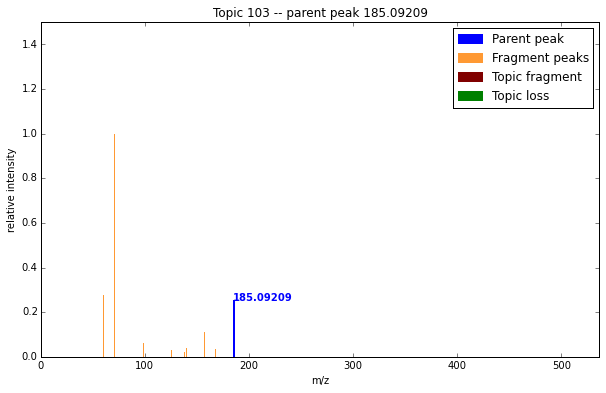

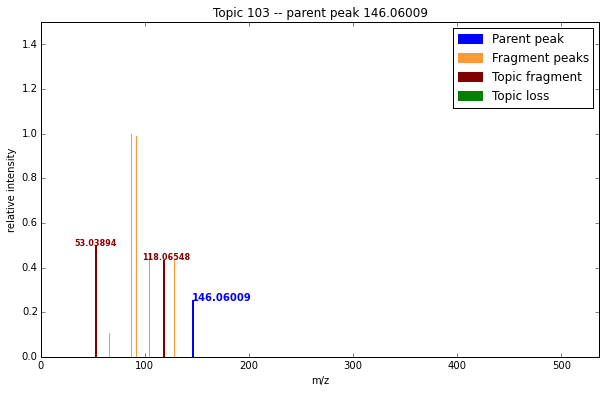

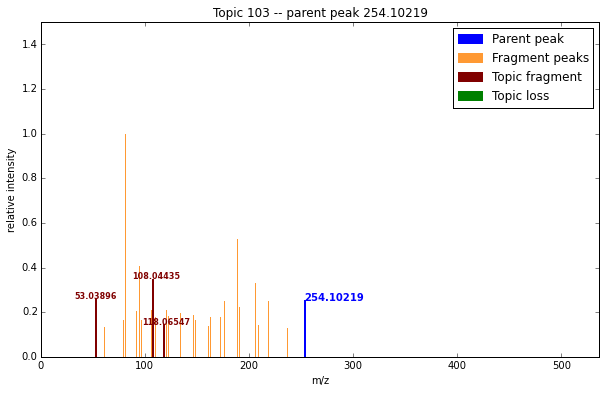

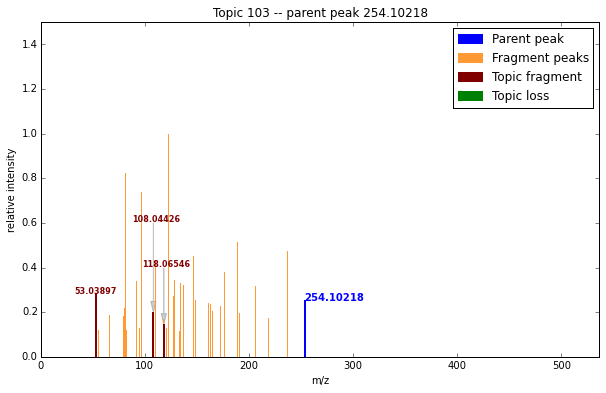

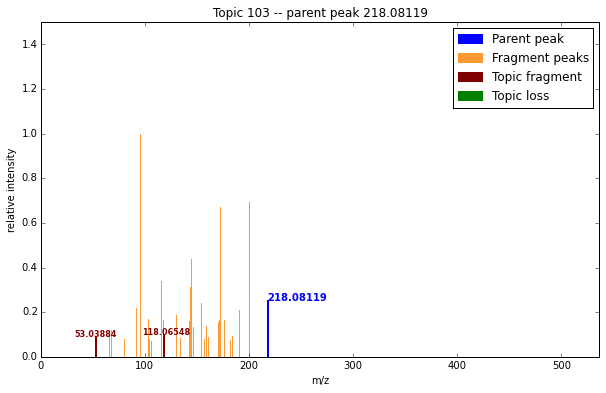

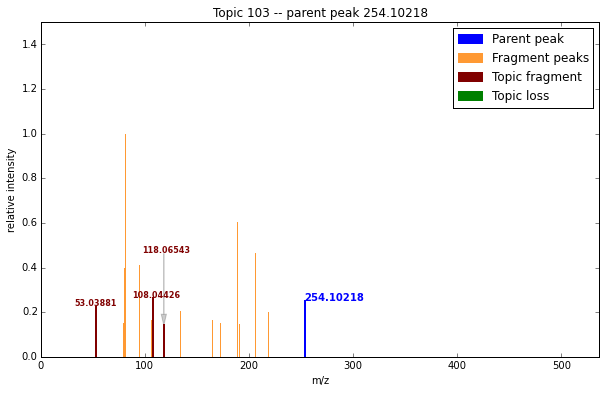

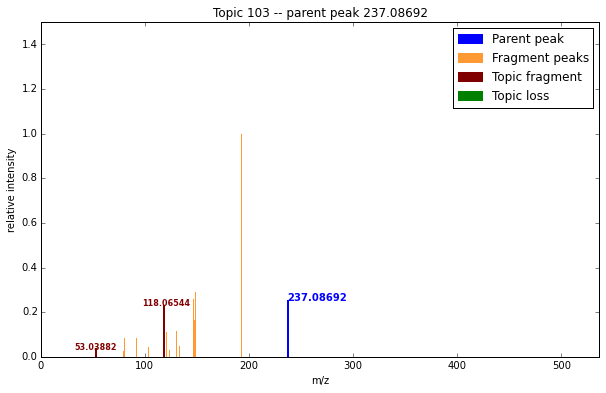

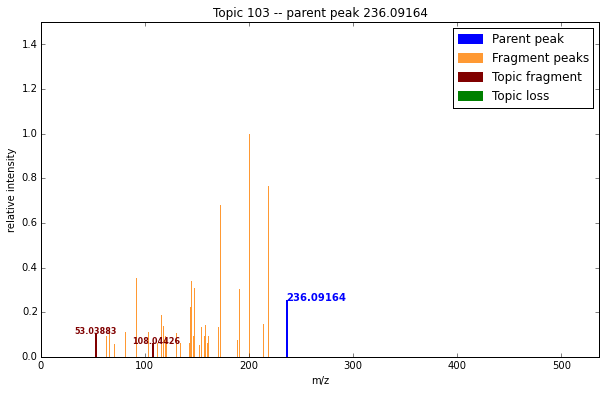

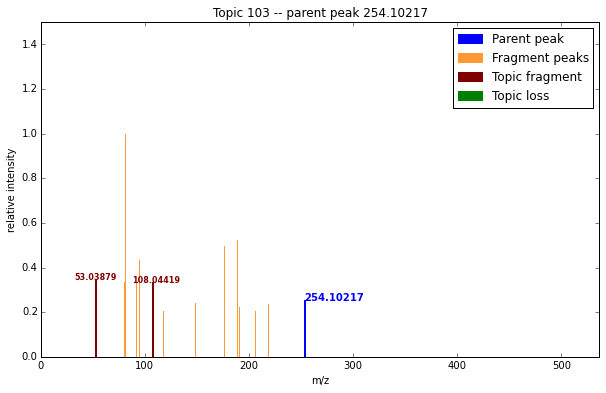

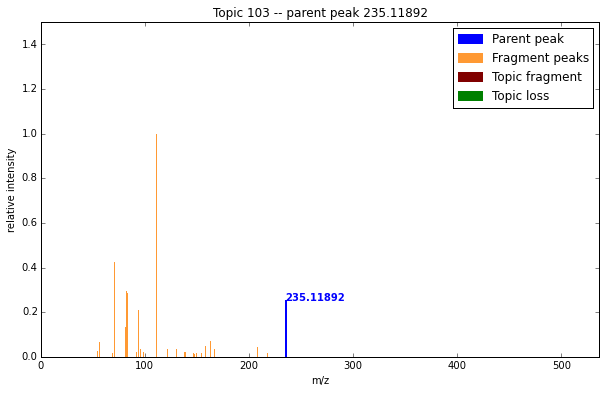

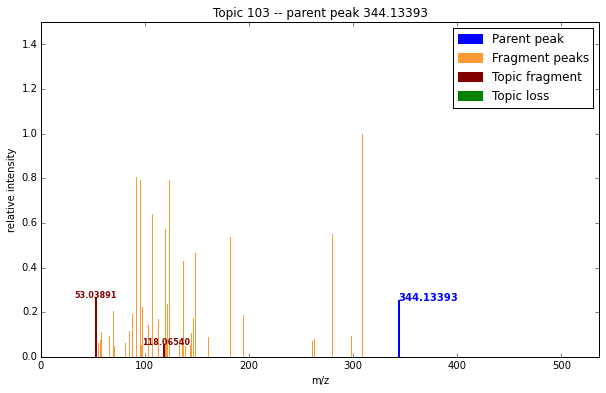

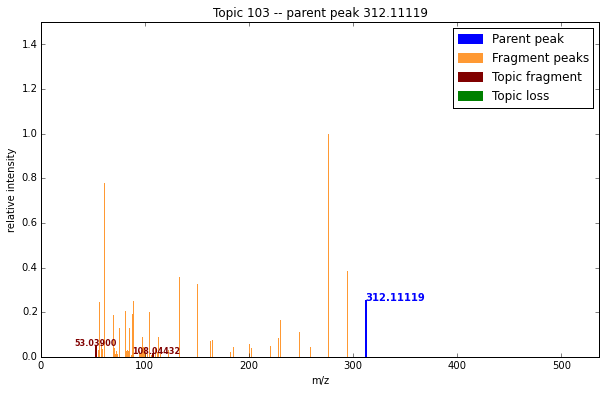

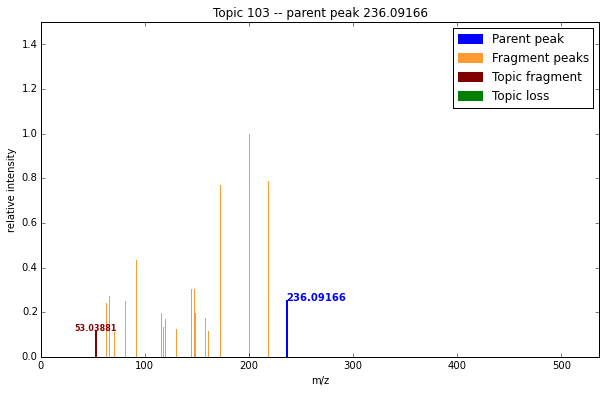

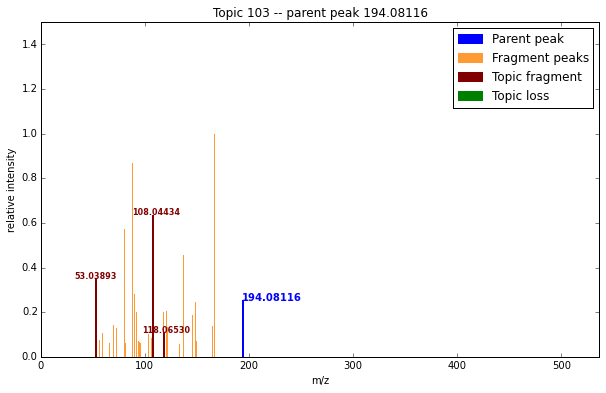

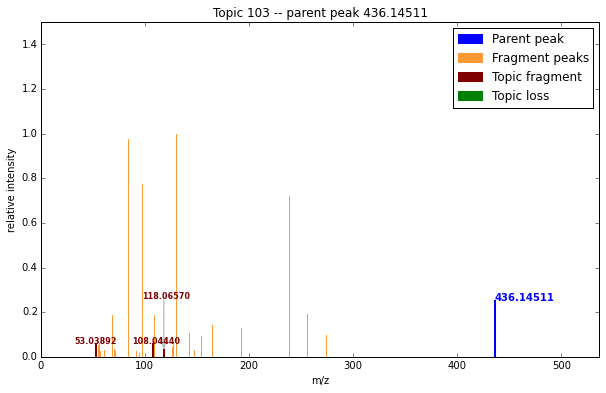

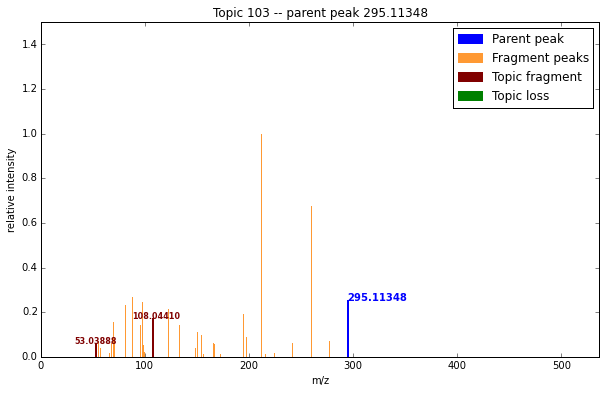

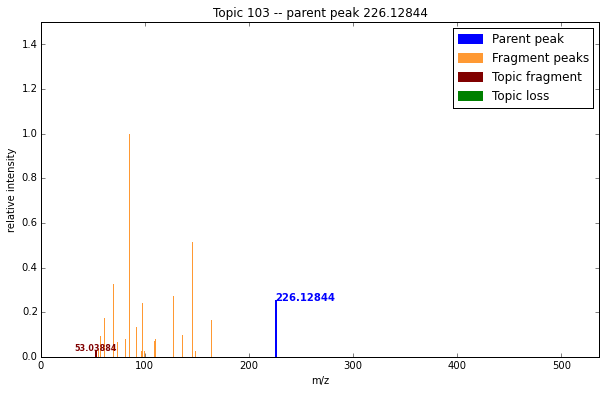

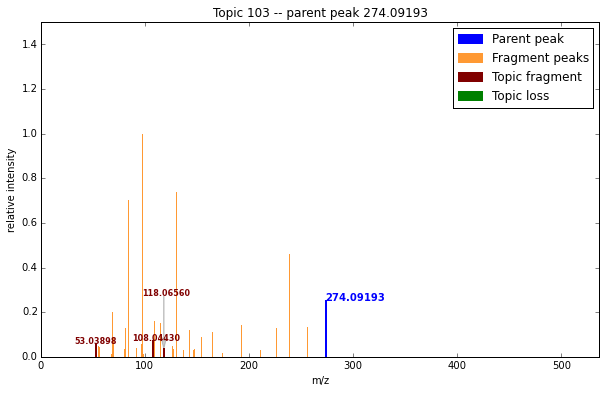

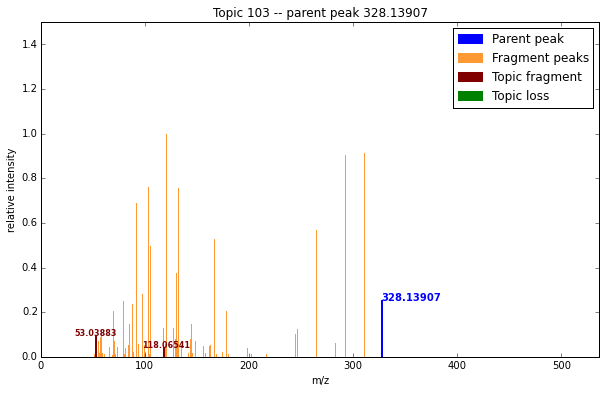

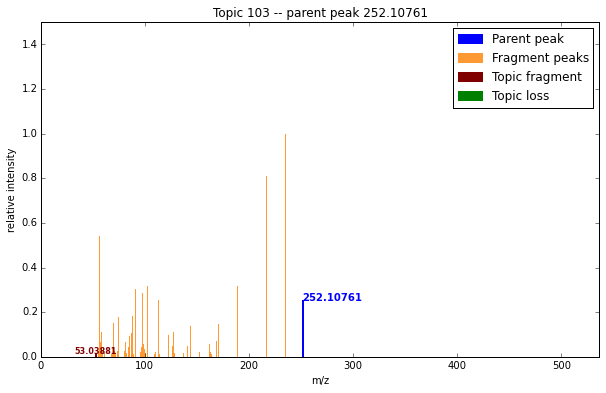

Topic 137 h-index=5

- bag 0:
	fragment_121.06489 (0.378989110594), 
	fragment_152.10755 (0.129099263549), 
	fragment_103.05449 (0.0925914269529), 
	fragment_93.06982 (0.0806319632404), 
	fragment_91.05413 (0.0674136086108), 

- bag 1:

- bag 2:
	mzdiff_40.03074 (0.0621497450396), 
	mzdiff_26.01566 (0.0525571767557), 

Parent peaks

     peakID	mz		rt		int		score
1    10494	166.12262	723.897		2.840e+07	1.704
2    10493	166.12263	696.858		4.826e+07	1.200
3    2665 	666.51284	269.747		3.837e+05	0.849
4    2664 	666.51250	223.606		9.067e+05	0.834
5    1882 	538.28041	241.536		1.318e+06	0.828
6    6782 	180.10187	328.784		5.288e+06	0.760
7    896  	814.55313	221.946		4.271e+05	0.732
8    12564	180.13824	1037.050		1.528e+06	0.683
9    8816 	328.17544	652.424		1.897e+06	0.457
10   743  	514.31665	205.410		5.434e+05	0.429
11   2644 	432.23813	241.536		4.886e+06	0.321

Fragments

1    fragment_121.06489 (0.379)
 peakID  MSnParentPeakID  mz          rt        intensity
 13048     743           

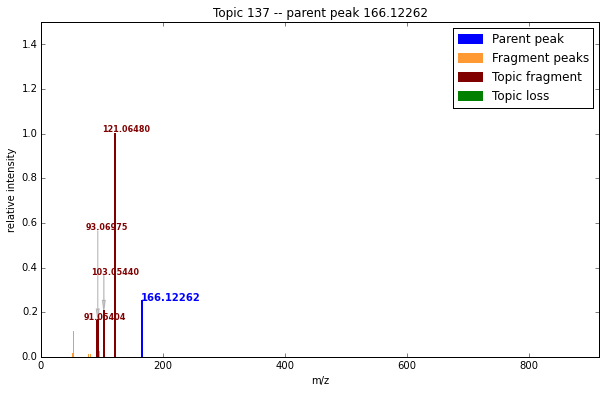

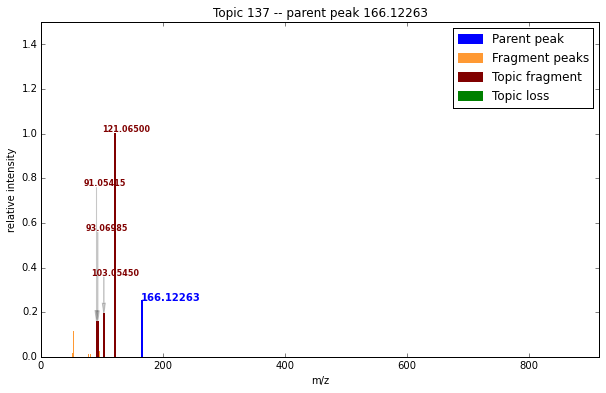

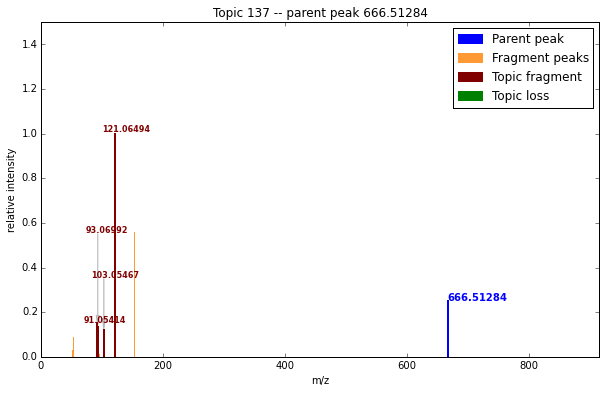

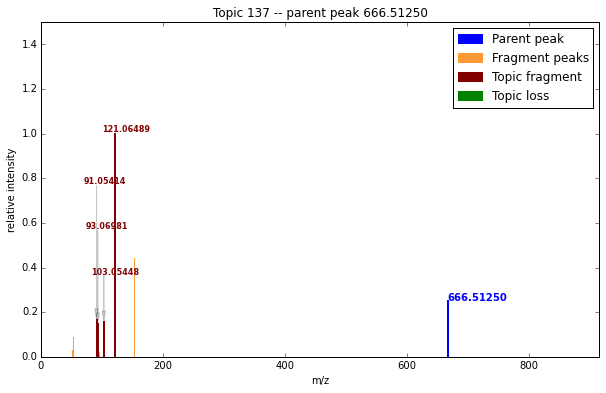

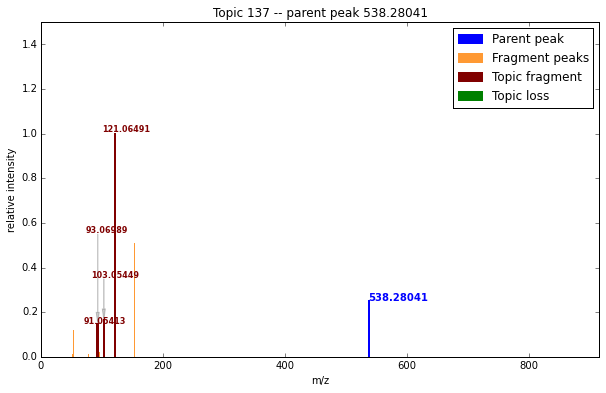

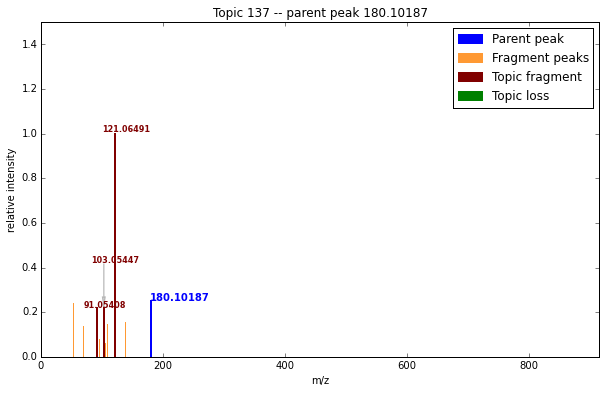

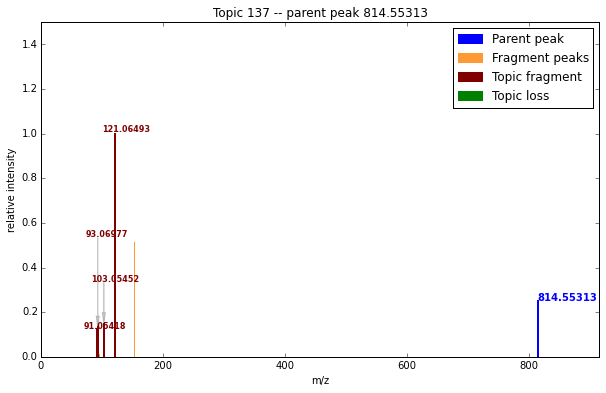

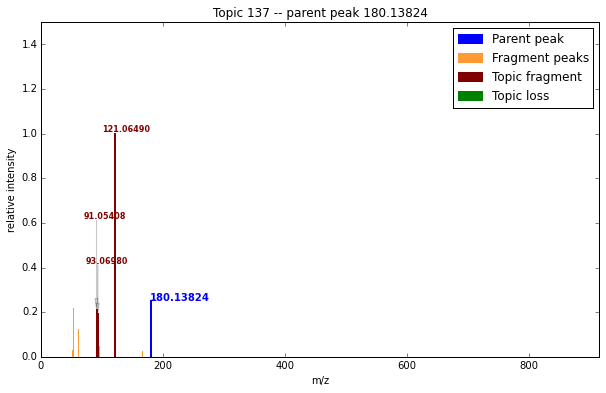

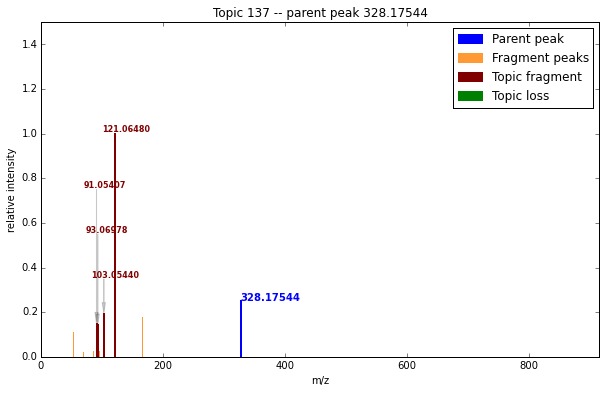

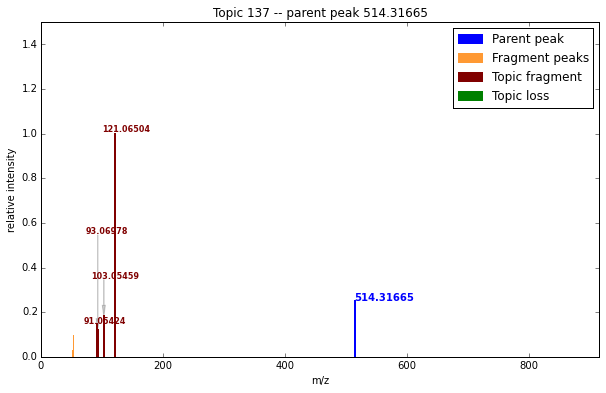

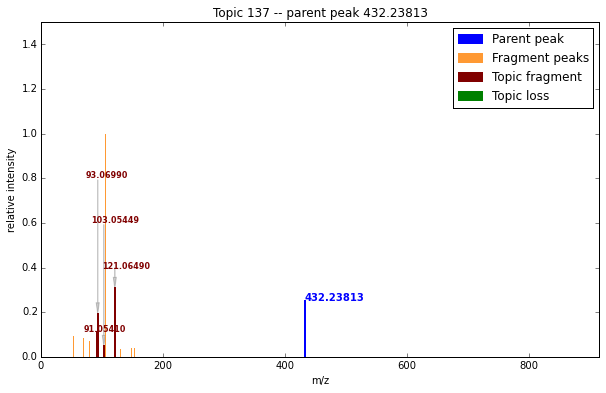

Topic 202 h-index=5

- bag 0:
	fragment_98.05999 (0.22140460352), 
	fragment_131.12918 (0.201977983164), 
	fragment_55.05468 (0.150762347678), 
	fragment_97.07643 (0.106610937776), 
	fragment_235.07575 (0.0500971331018), 

- bag 1:

- bag 2:
	mzdiff_59.04846 (0.0659138773133), 

Parent peaks

     peakID	mz		rt		int		score
1    7175 	306.16851	517.032		9.032e+05	0.363
2    10522	372.18974	617.886		2.403e+06	0.292
3    10504	276.15782	595.502		9.881e+05	0.266
4    10531	291.16316	593.907		4.721e+06	0.236
5    10503	276.15795	636.638		1.591e+06	0.230
6    10529	291.16314	505.911		2.550e+06	0.202
7    10532	291.16317	729.738		5.737e+06	0.137
8    10022	363.18438	791.985		1.081e+06	0.137
9    10521	372.18967	636.638		2.905e+06	0.115

Fragments

1    fragment_98.05999 (0.221)
 peakID  MSnParentPeakID  mz        rt       intensity
 23722   10022            98.06017  798.207  0.961431 
 24220   10503            98.06005  633.998  0.725716 
 24247   10504            98.05998  602.709  0.509168

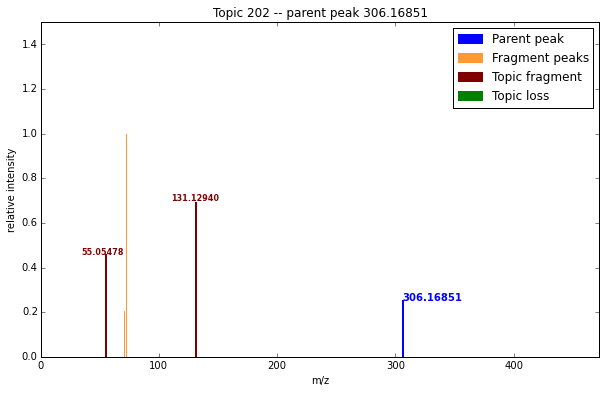

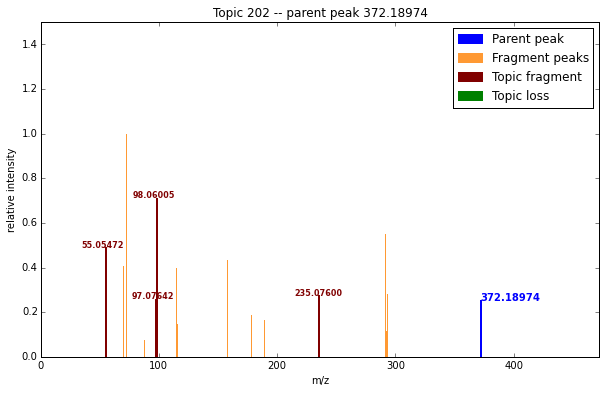

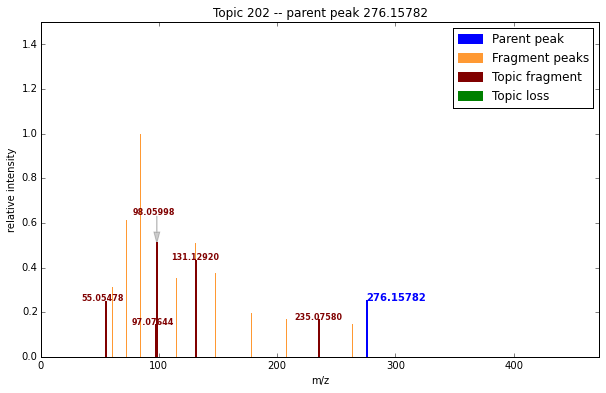

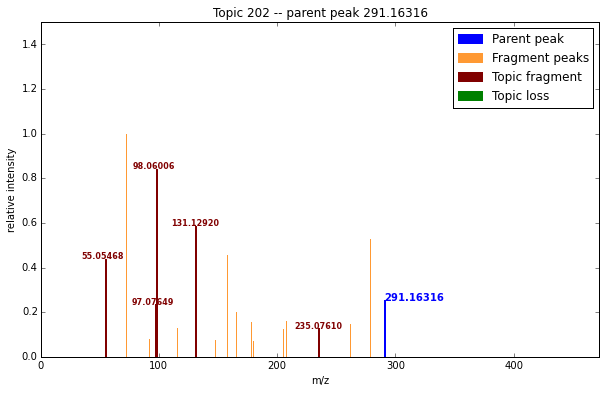

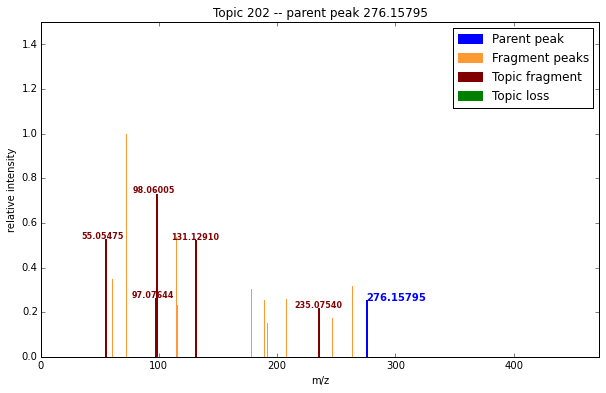

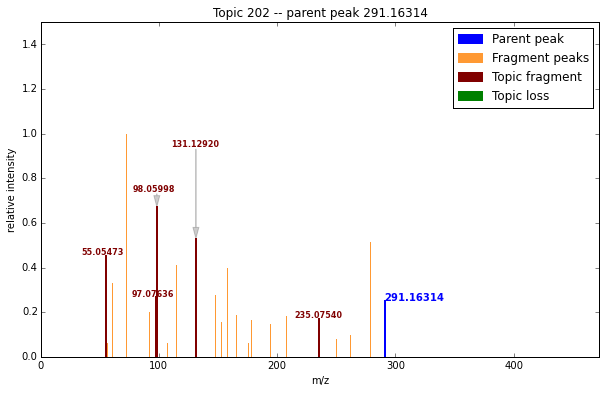

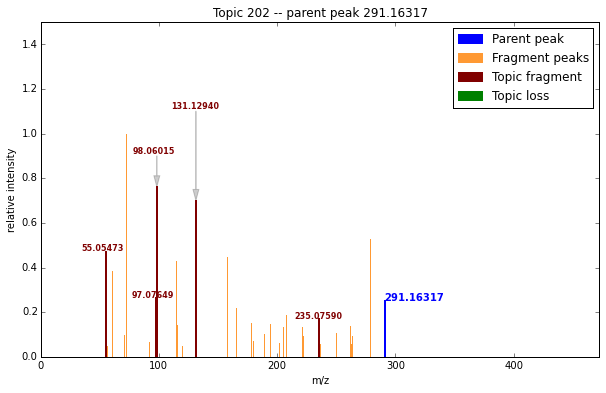

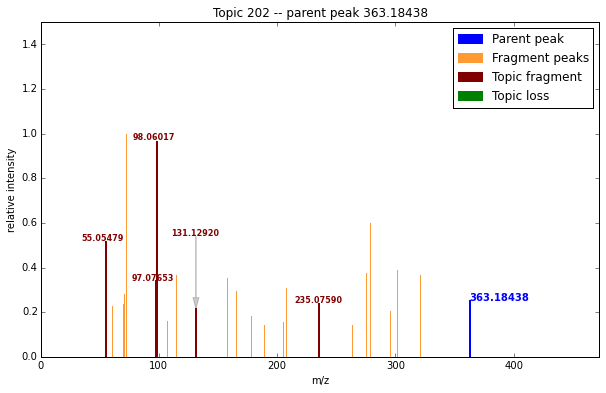

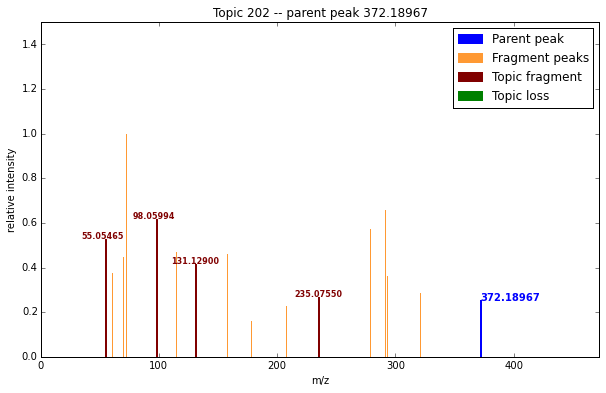

Topic 13 h-index=4

- bag 0:
	fragment_145.04997 (0.20498695274), 
	fragment_73.02851 (0.119938146323), 
	fragment_91.03921 (0.0716149608582), 
	fragment_61.02851 (0.0648497148932), 
	fragment_107.04885 (0.0503527592539), 

- bag 1:
	loss_107.05823 (0.0998483863981), 

- bag 2:
	mzdiff_72.021 (0.0596237744523), 

Parent peaks

     peakID	mz		rt		int		score
1    5493 	420.18633	449.698		7.103e+05	0.538
2    10520	180.08657	630.413		2.820e+06	0.433
3    8918 	492.19261	650.793		1.047e+06	0.423
4    9956 	198.09720	627.372		7.743e+06	0.327
5    9337 	360.14993	652.424		2.088e+07	0.263
6    6305 	226.12844	465.402		2.596e+07	0.165

Fragments

1    fragment_145.04997 (0.205)
 peakID  MSnParentPeakID  mz          rt       intensity
 17298    5493            145.050081  449.441  0.233152 
 18682    6305            145.049995  473.571  0.514068 
 22848    8918            145.049800  647.314  0.662829 
 23145    9337            145.049900  657.697  0.610560 
 23611    9956            145.04990

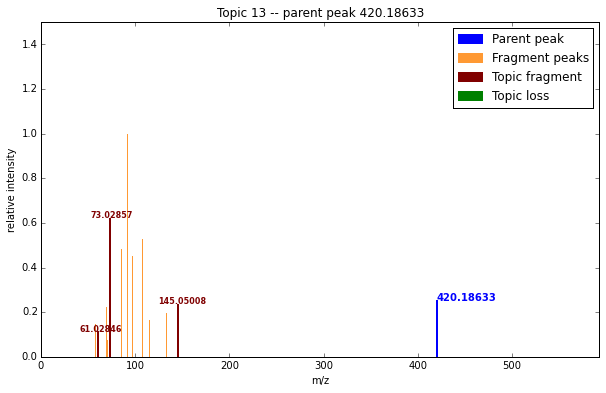

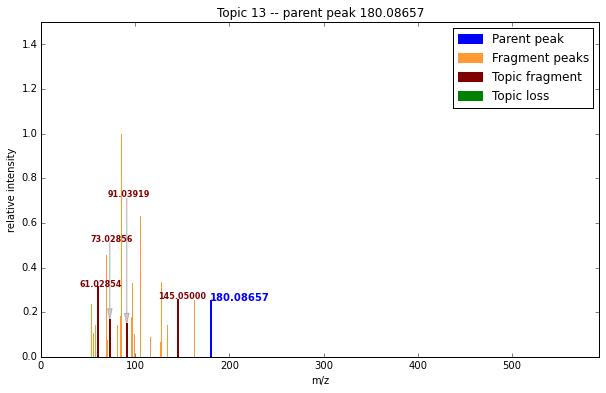

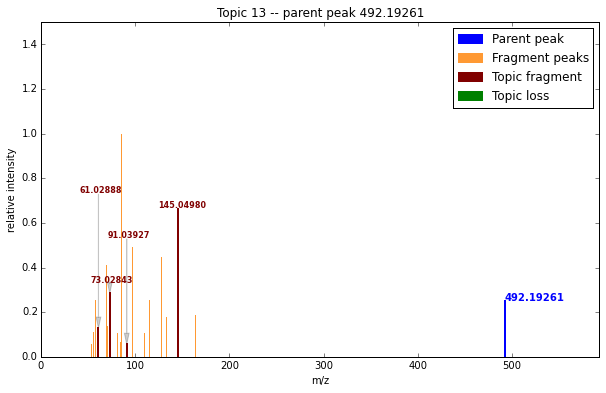

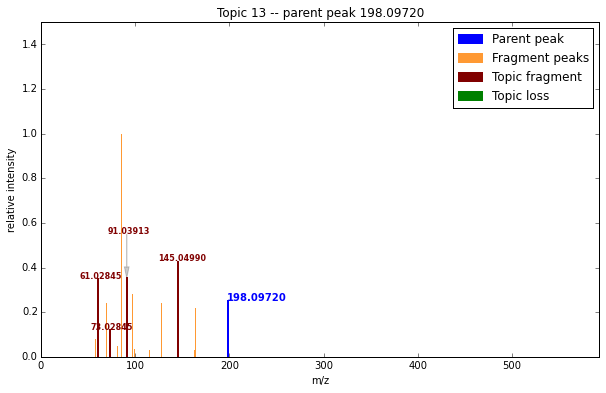

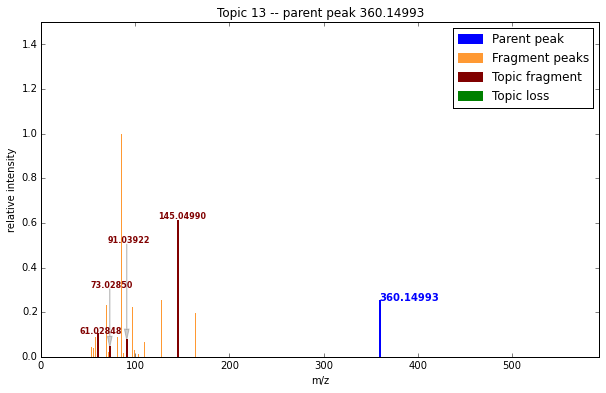

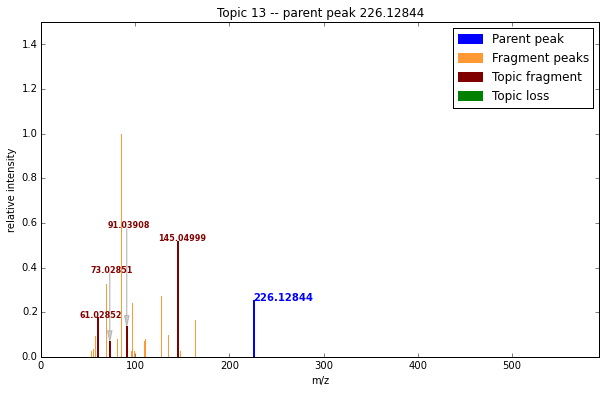

Topic 34 h-index=4

- bag 0:
	fragment_85.02833 (0.23817513067), 
	fragment_163.06062 (0.142672775376), 
	fragment_145.04997 (0.113634897077), 
	fragment_325.11203 (0.0755630121959), 
	fragment_61.02892 (0.0736271536426), 
	fragment_93.05445 (0.0562044266632), 

- bag 1:

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    9224 	1008.36142	688.576		1.930e+06	0.888
2    8417 	434.18696	649.151		1.700e+06	0.847
3    8827 	1009.34530	662.160		8.002e+05	0.739
4    9222 	684.25554	678.367		1.761e+07	0.290
5    8875 	1026.37226	662.160		1.128e+06	0.277
6    9148 	991.33424	689.621		7.546e+05	0.183
7    9244 	487.16597	665.330		5.983e+06	0.150
8    7211 	432.20766	513.775		1.162e+06	0.126
9    9490 	522.20296	662.160		5.828e+07	0.103
10   8993 	667.22890	677.610		3.339e+06	0.101

Fragments

1    fragment_85.02833 (0.238)
 peakID  MSnParentPeakID  mz        rt       intensity
 20515   7211             85.02836  506.953  1.000000 
 22205   8417             85.02826  646.816  0.874271 
 

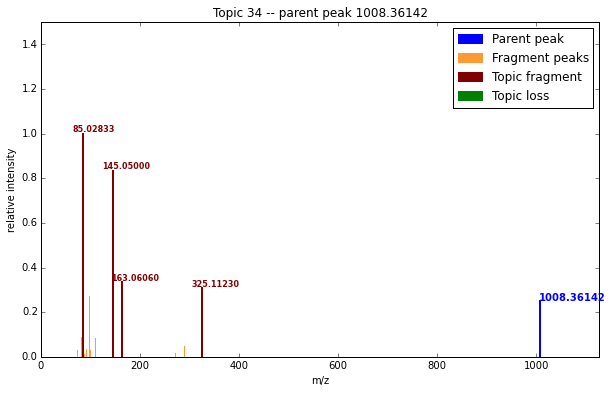

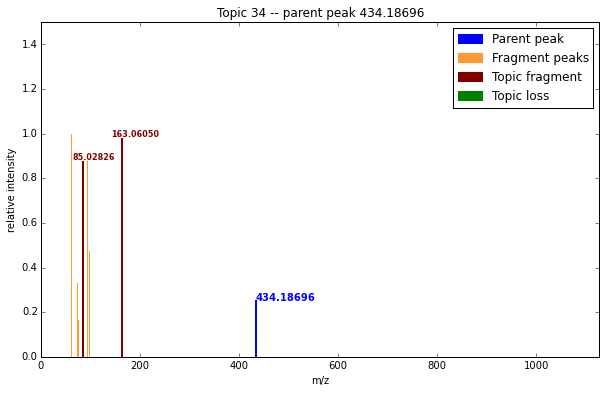

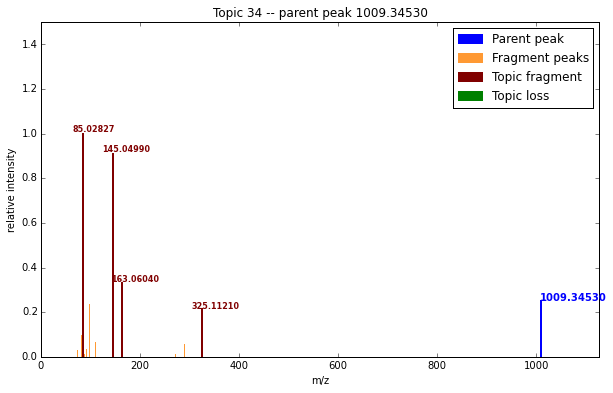

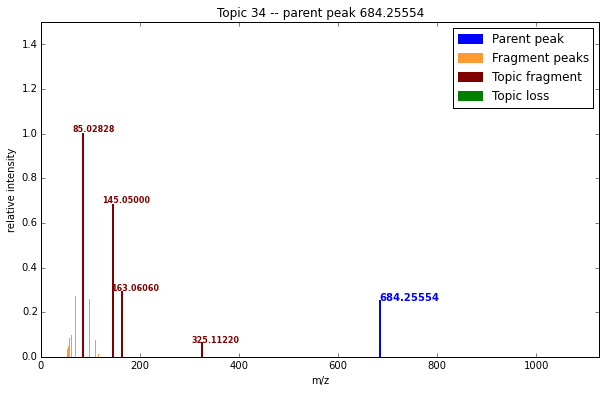

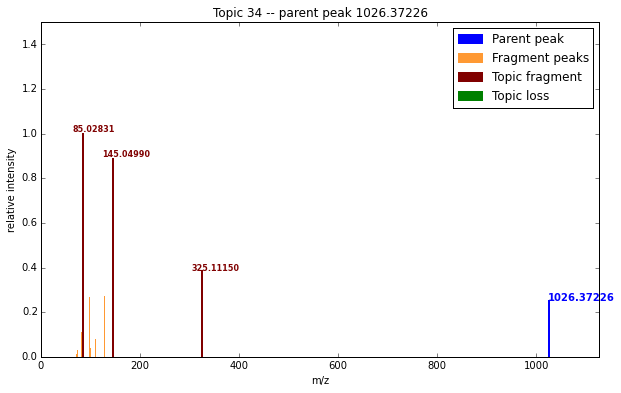

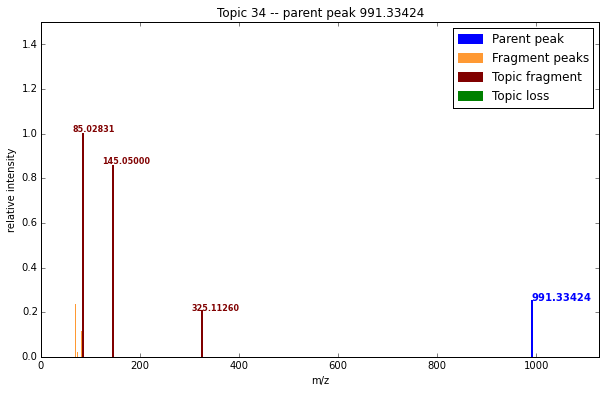

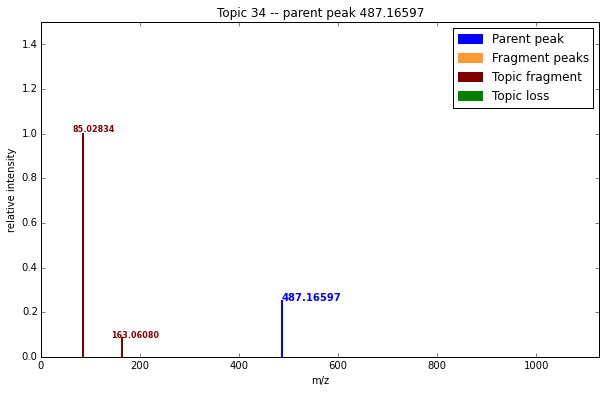

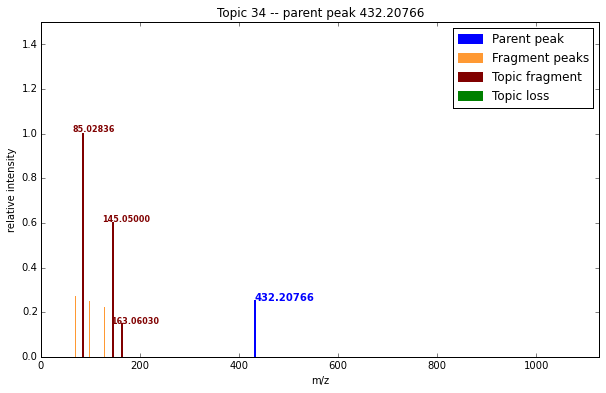

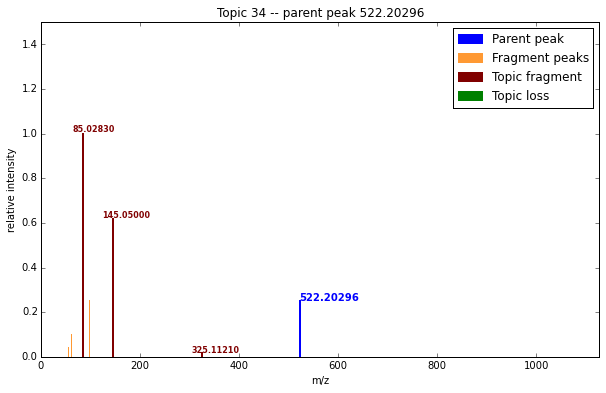

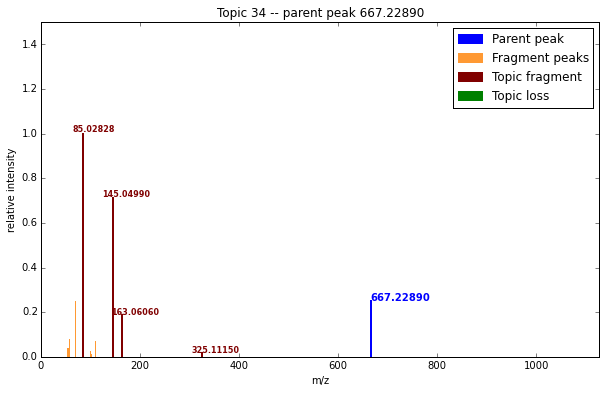

Topic 43 h-index=4

- bag 0:
	fragment_98.05999 (0.120890385883), 
	fragment_114.10281 (0.12015816065), 
	fragment_60.0559 (0.101120304606), 
	fragment_131.12918 (0.0937980522809), 

- bag 1:
	loss_179.07935 (0.0924602259626), 
	loss_161.10472 (0.0555683652294), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    6414 	291.08388	465.402		2.522e+07	0.681
2    10503	276.15795	636.638		1.591e+06	0.641
3    10504	276.15782	595.502		9.881e+05	0.482
4    10521	372.18967	636.638		2.905e+06	0.199
5    9665 	337.17174	694.864		3.216e+05	0.123

Fragments

1    fragment_98.05999 (0.121)
 peakID  MSnParentPeakID  mz         rt       intensity
 19001    6414            98.060025  464.416  0.713893 
 24220   10503            98.060050  633.998  0.725716 
 24247   10504            98.059980  602.709  0.509168 
 24427   10521            98.059940  652.836  0.614083 
2    fragment_114.10281 (0.120)
 peakID  MSnParentPeakID  mz          rt       intensity
 19005    6414            114.102812  

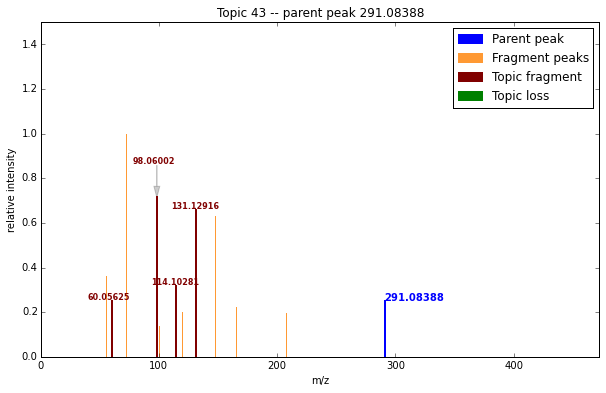

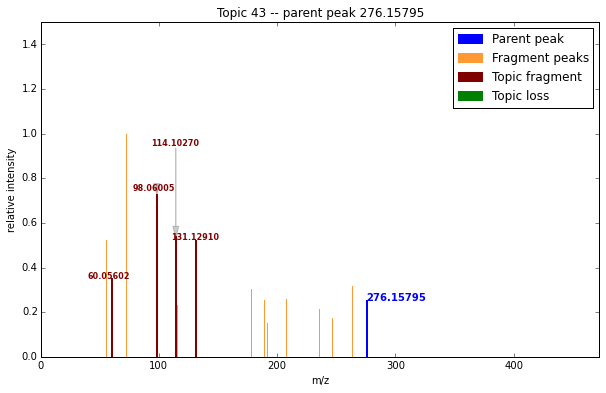

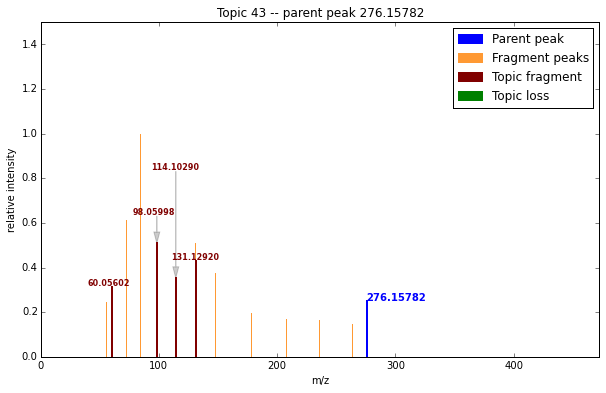

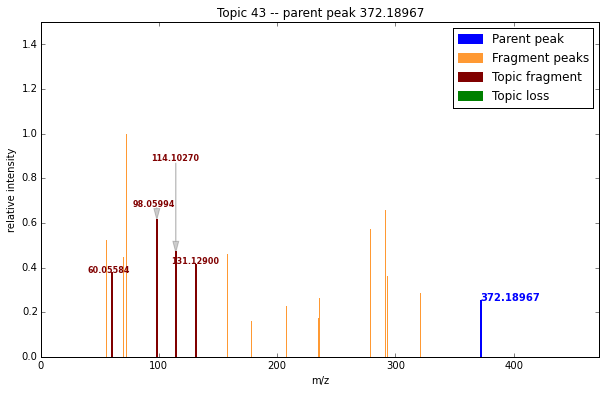

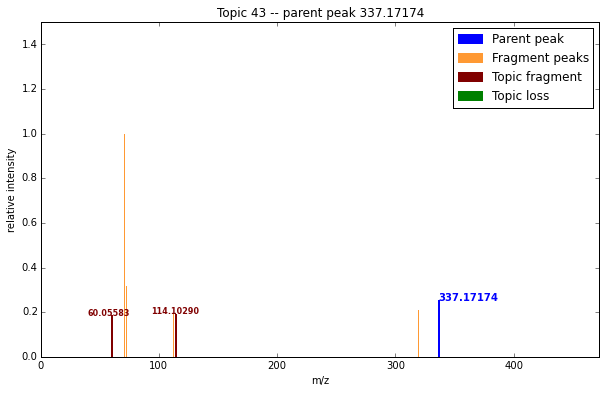

Topic 89 h-index=4

- bag 0:
	fragment_55.01824 (0.13985278654), 
	fragment_65.03877 (0.0752591257323), 
	fragment_127.0387 (0.0632417004657), 
	fragment_81.03337 (0.0587351659907), 

- bag 1:

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    2735 	387.18013	241.536		9.422e+06	0.537
2    3249 	251.12762	208.697		4.093e+06	0.466
3    2625 	355.15395	249.786		8.741e+06	0.418
4    3397 	349.20080	210.369		4.867e+07	0.380
5    8049 	252.10761	592.308		3.563e+07	0.338
6    3210 	404.15517	295.922		1.072e+06	0.306
7    4709 	306.13360	281.137		2.536e+06	0.300
8    7684 	274.09193	536.439		3.015e+07	0.267
9    5601 	254.10218	419.222		1.980e+06	0.262
10   6478 	312.11119	482.456		6.717e+06	0.249
11   7846 	229.15458	490.026		3.320e+07	0.232
12   6339 	216.12311	409.811		1.012e+07	0.220
13   8046 	234.09711	592.308		1.819e+07	0.219
14   6054 	342.15486	412.921		2.899e+06	0.216
15   2628 	365.19595	225.881		2.922e+06	0.215
16   7809 	436.14511	564.091		4.053e+06	0.212
17   6349 	328.

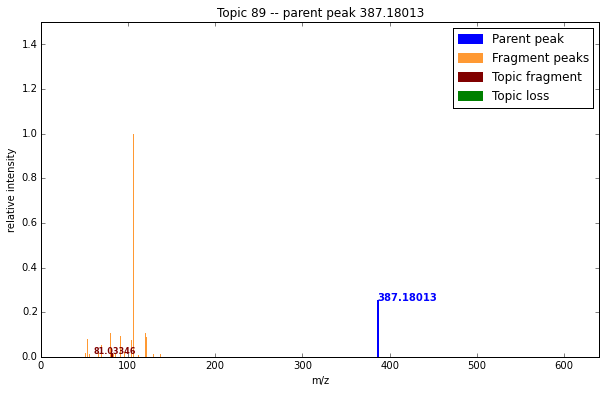

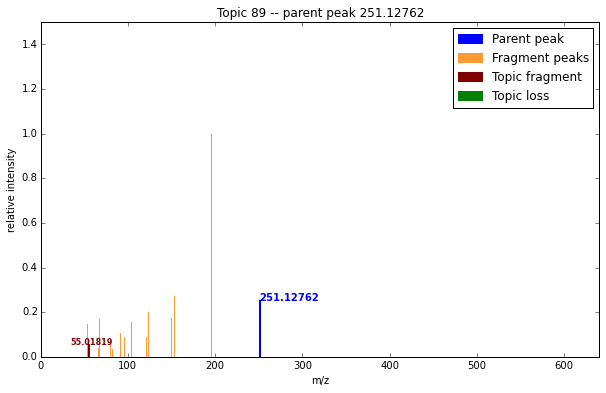

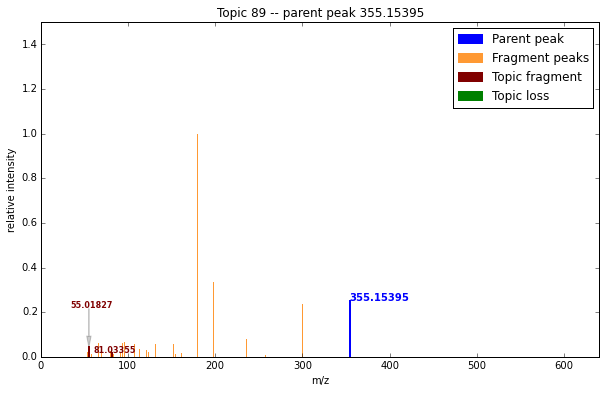

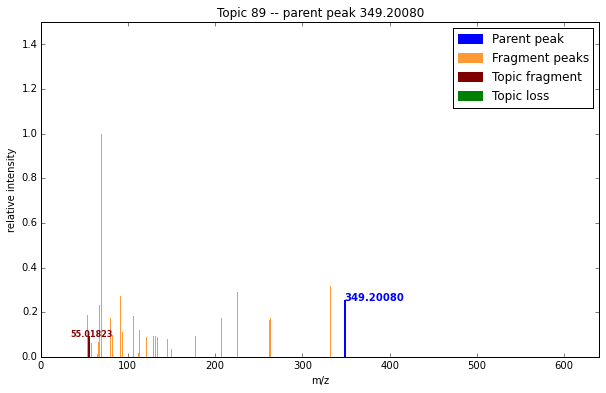

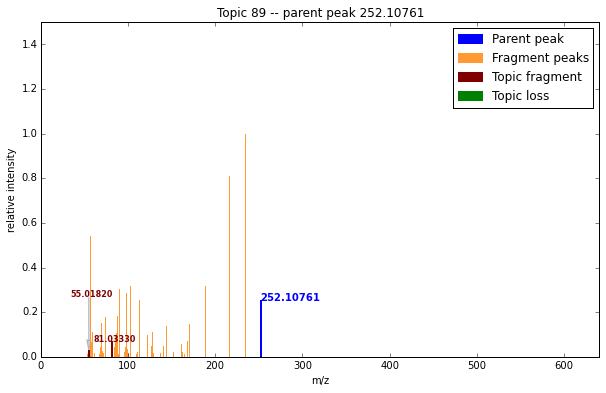

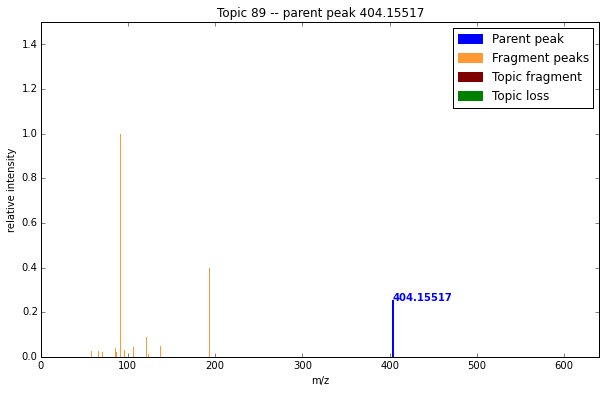

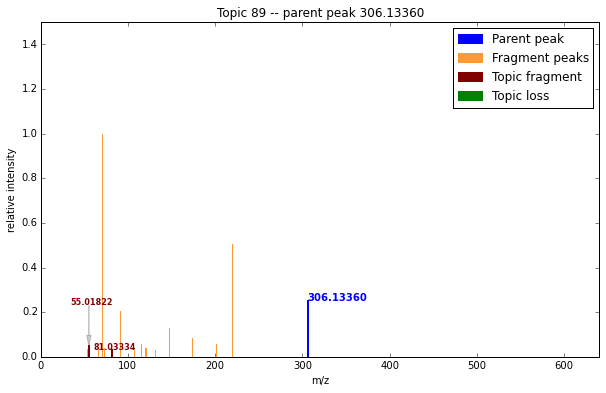

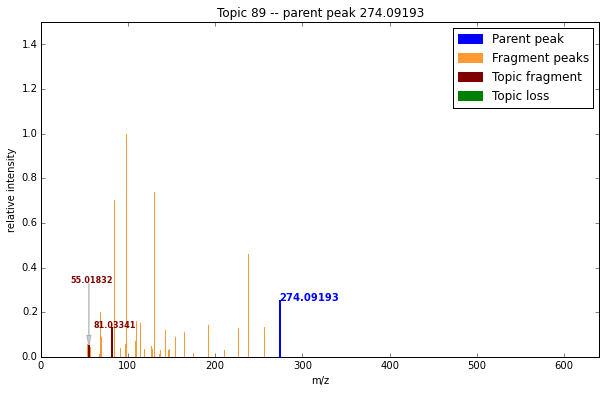

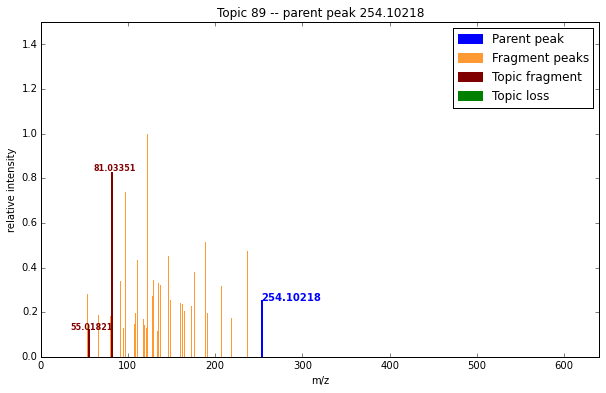

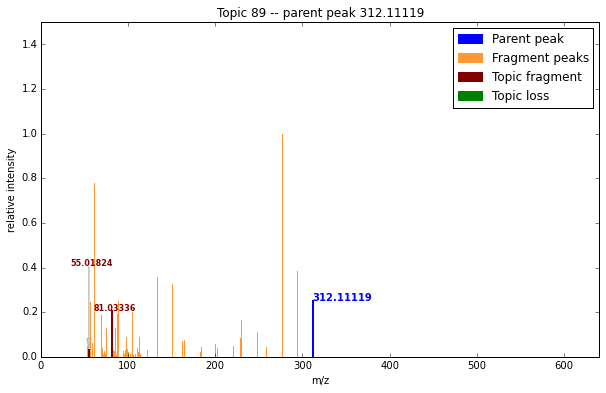

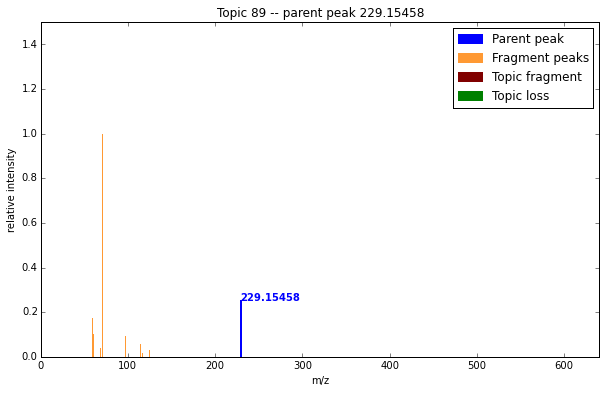

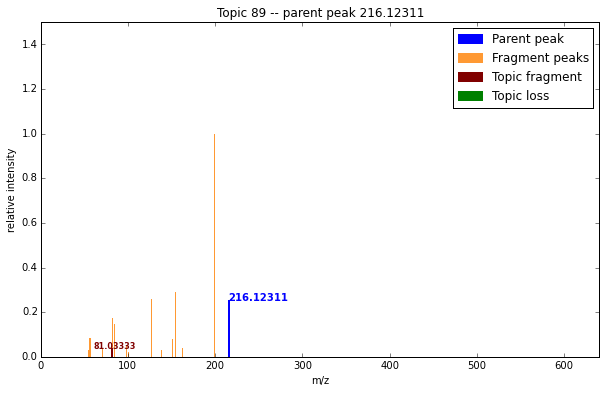

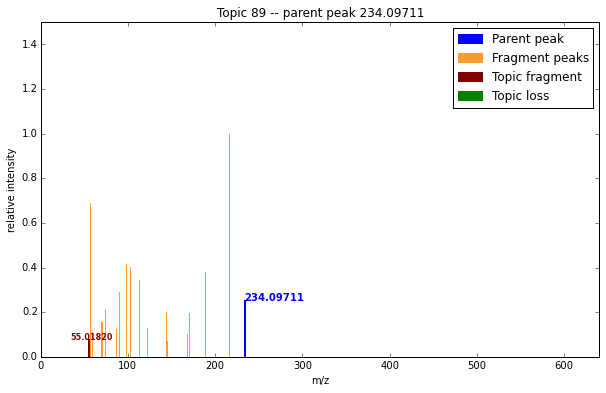

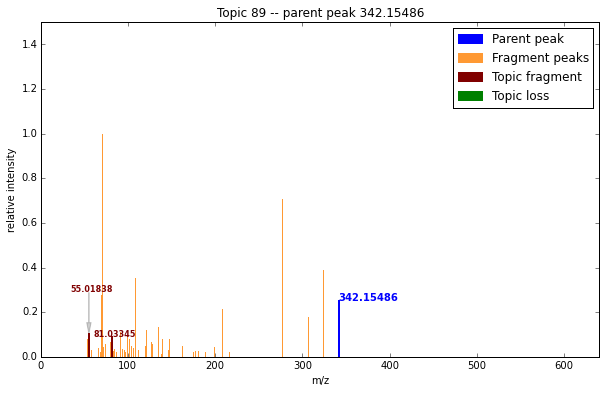

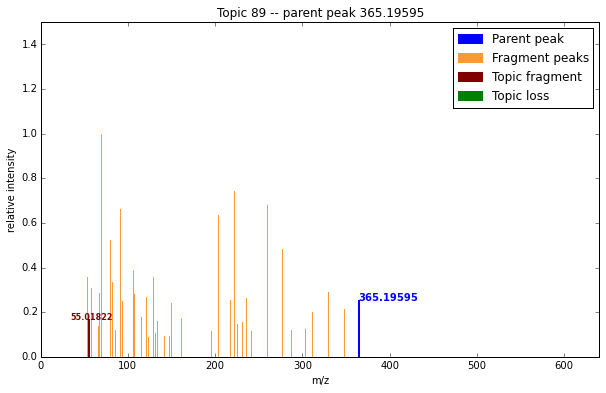

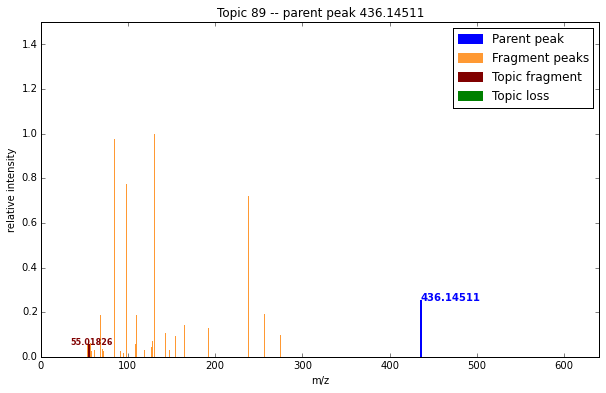

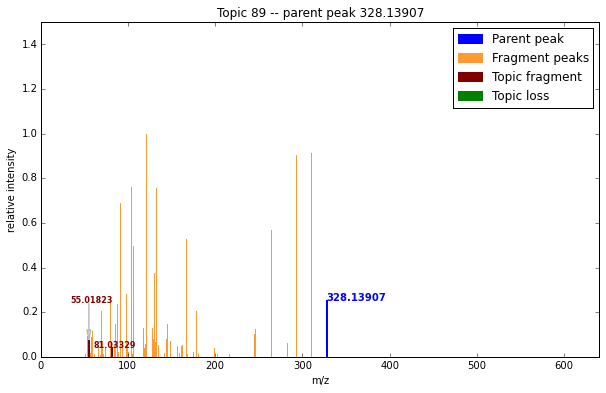

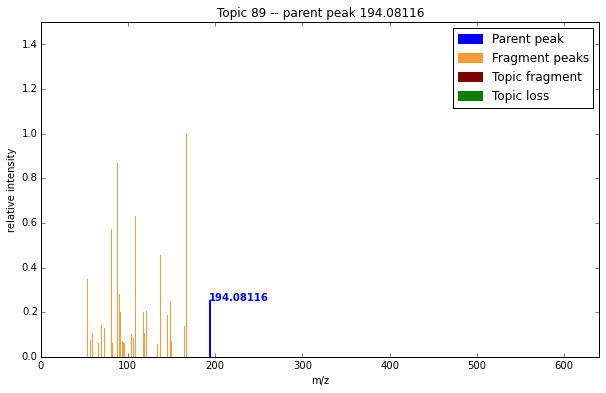

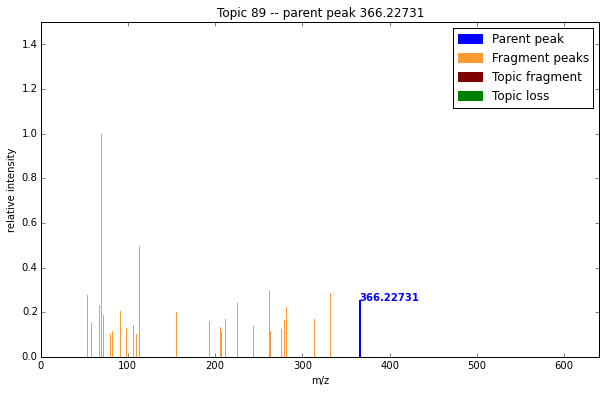

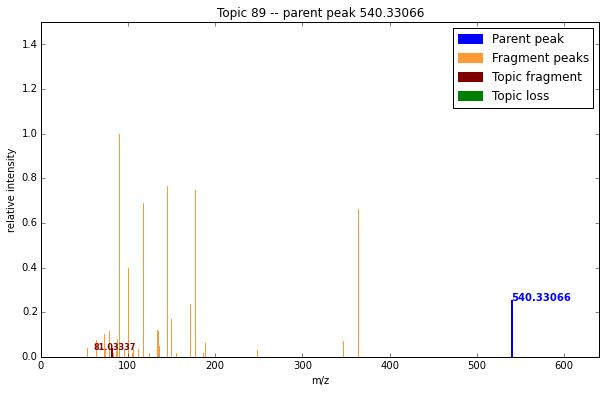

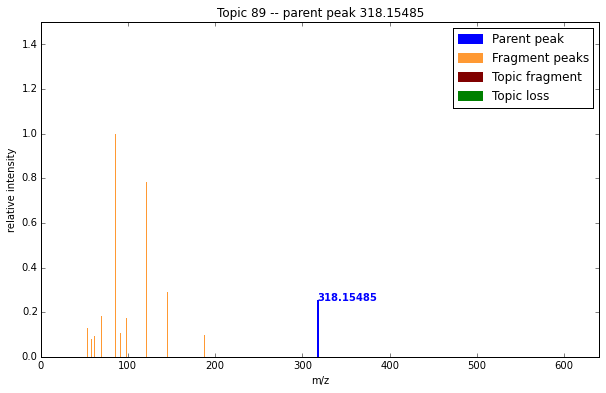

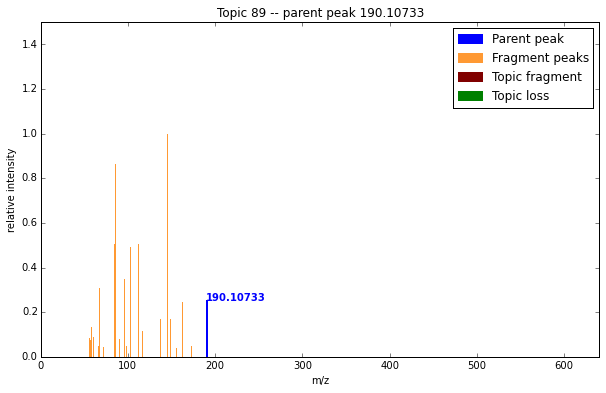

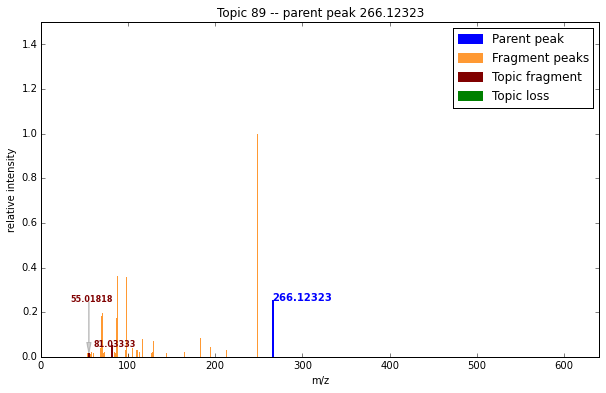

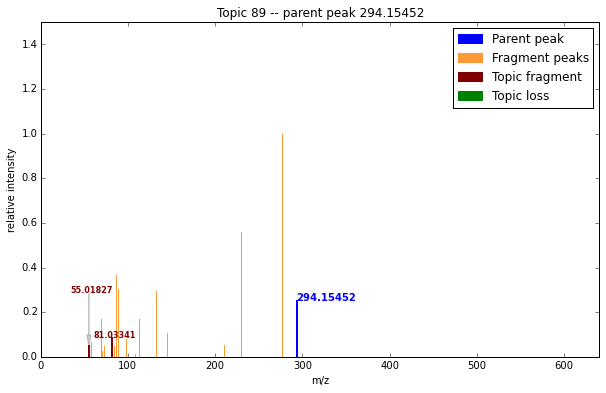

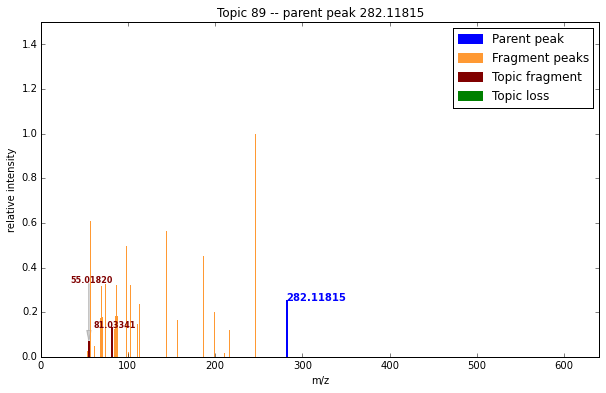

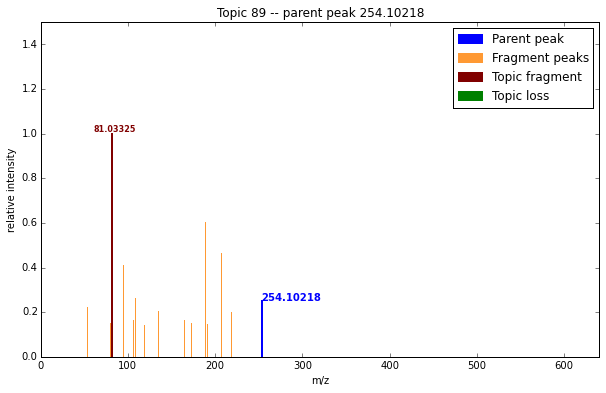

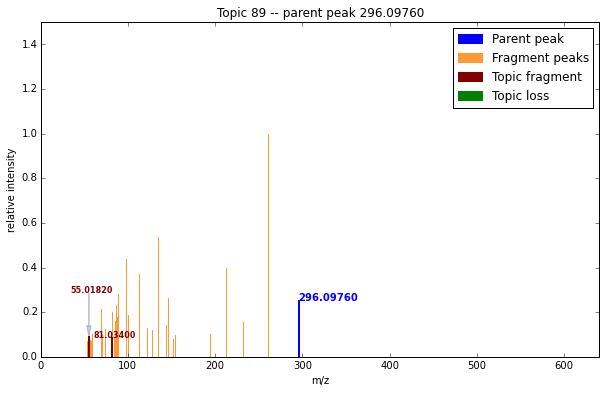

Topic 190 h-index=4

- bag 0:
	fragment_127.0387 (0.283321194465), 
	fragment_145.04997 (0.155458444606), 
	fragment_163.06062 (0.141701060128), 
	fragment_109.0288 (0.0599660111678), 

- bag 1:

- bag 2:
	mzdiff_46.00516 (0.055766540076), 

Parent peaks

     peakID	mz		rt		int		score
1    10517	180.08660	603.508		1.188e+07	1.116
2    7776 	180.08663	565.722		2.087e+06	0.598
3    10378	145.04955	668.607		7.363e+06	0.533
4    8993 	667.22890	677.610		3.339e+06	0.389
5    9443 	325.11289	668.607		1.375e+07	0.374
6    6369 	163.06007	466.972		6.943e+06	0.333
7    8885 	261.03690	652.424		4.013e+06	0.331
8    9337 	360.14993	652.424		2.088e+07	0.296
9    6305 	226.12844	465.402		2.596e+07	0.293
10   9639 	342.13956	665.330		3.334e+06	0.291
11   4079 	370.17083	311.220		9.411e+05	0.290
12   9640 	342.13951	701.499		2.356e+06	0.219
13   9222 	684.25554	678.367		1.761e+07	0.210
14   8875 	1026.37226	662.160		1.128e+06	0.209
15   9338 	360.14997	705.057		3.450e+05	0.203
16   8918 	492.19261	6

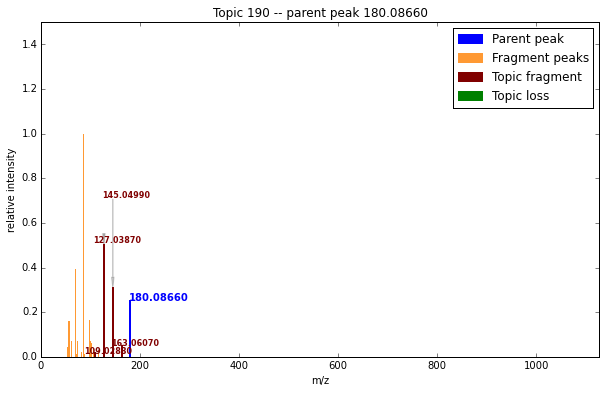

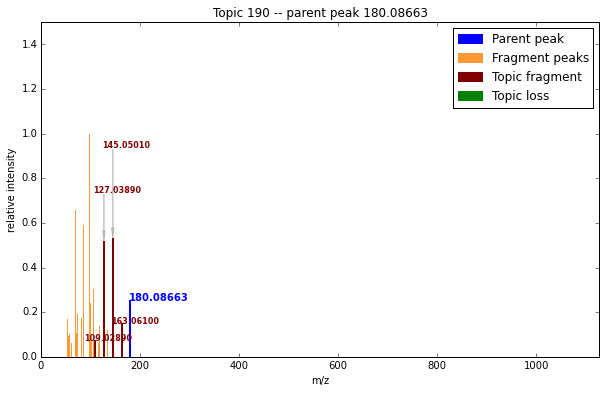

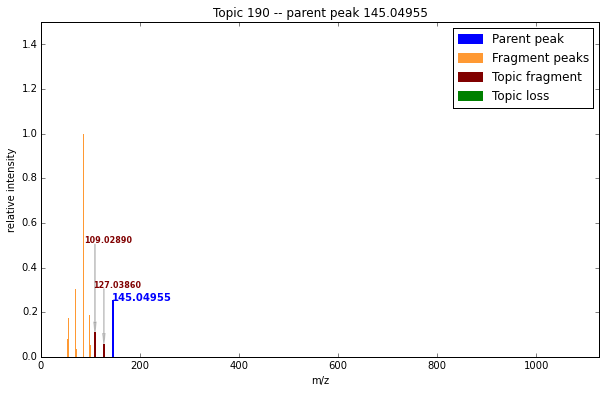

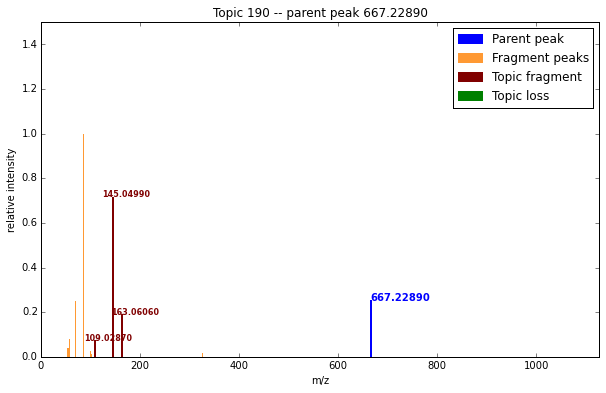

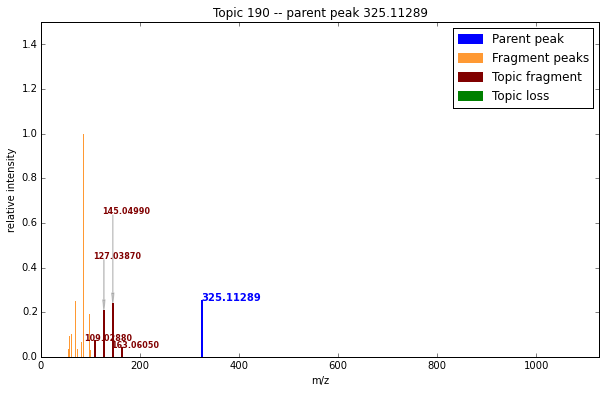

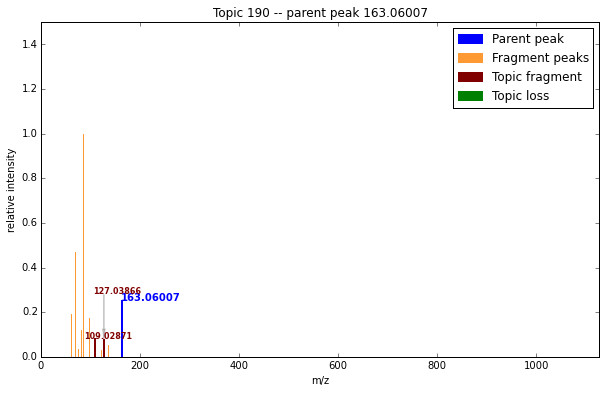

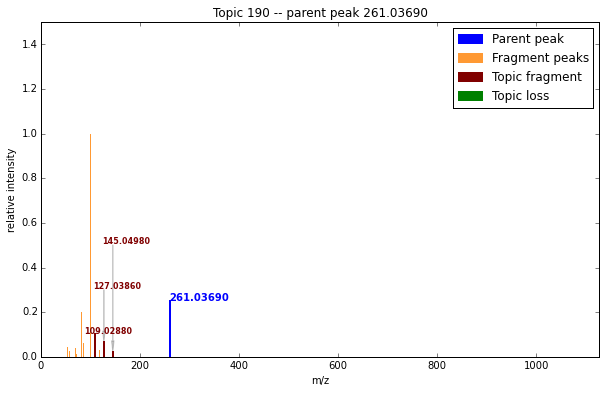

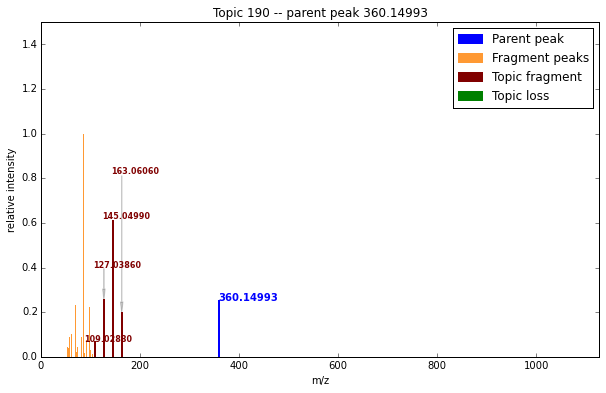

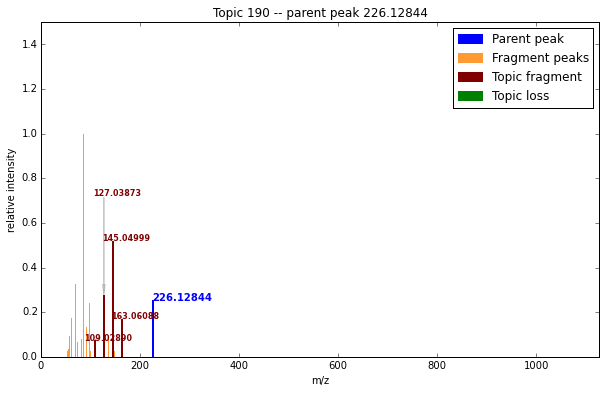

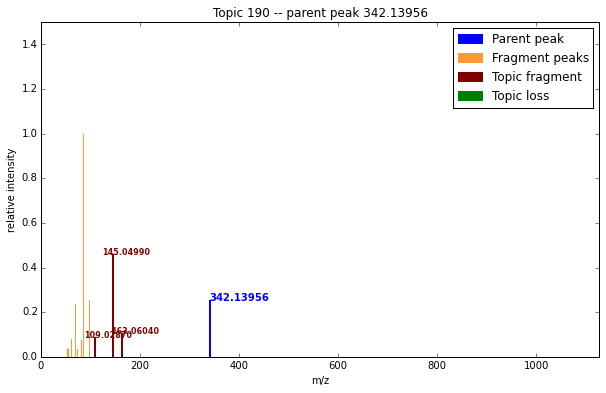

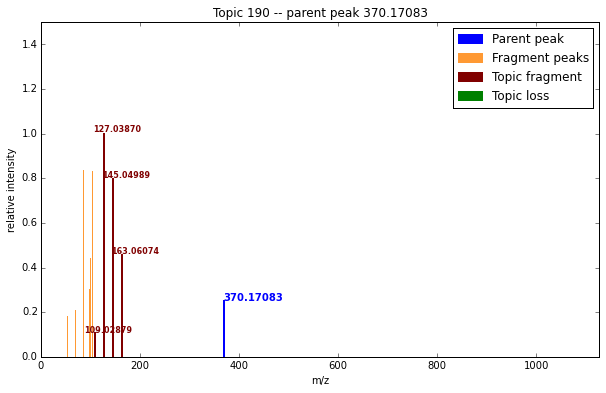

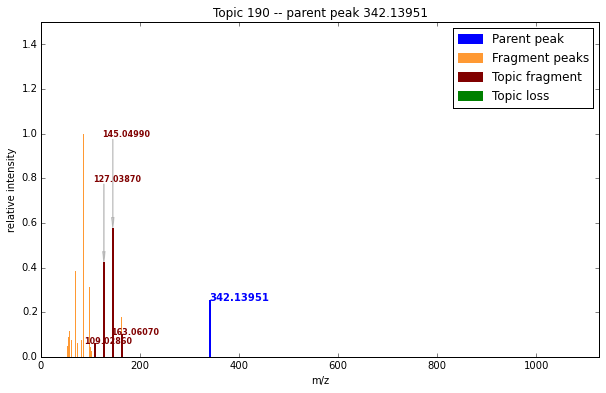

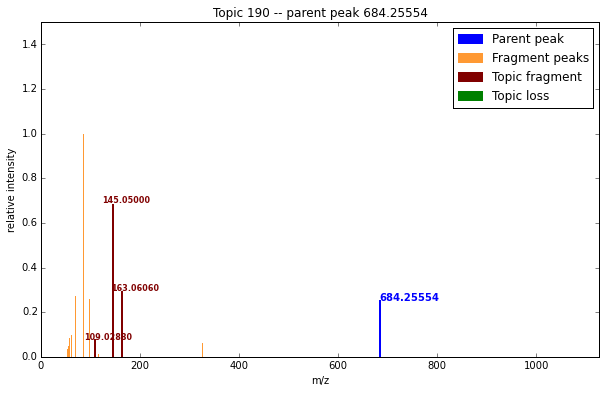

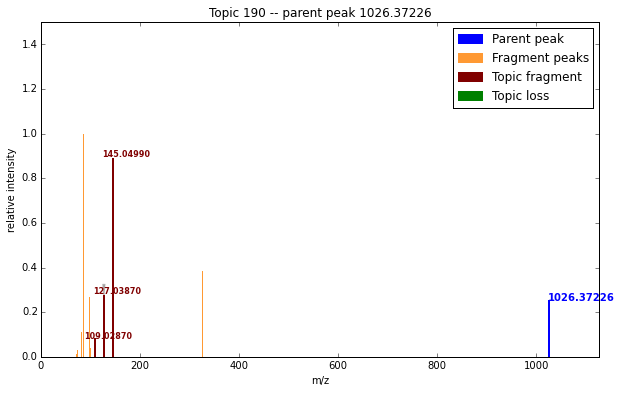

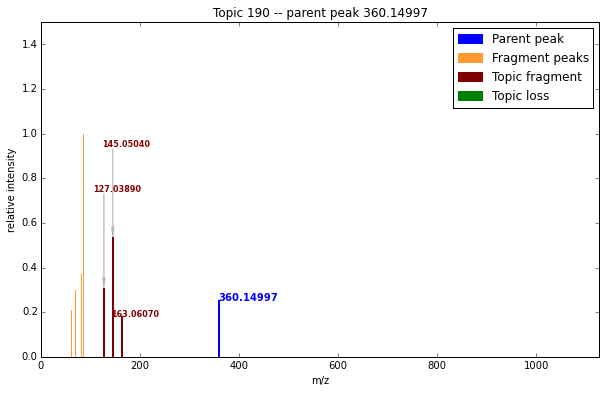

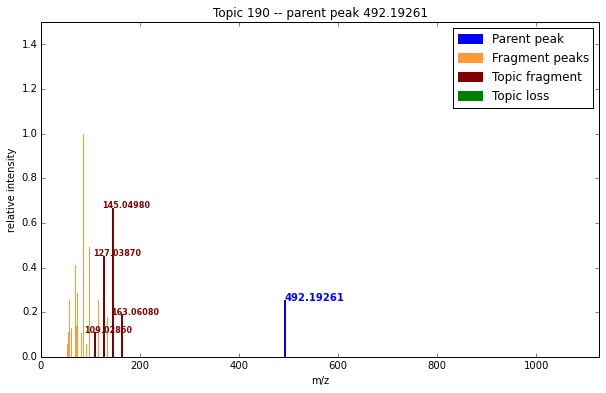

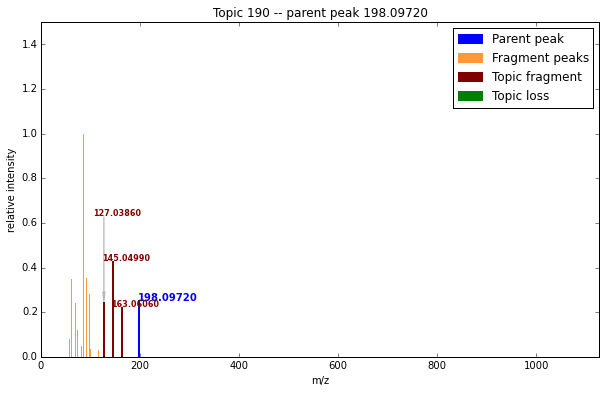

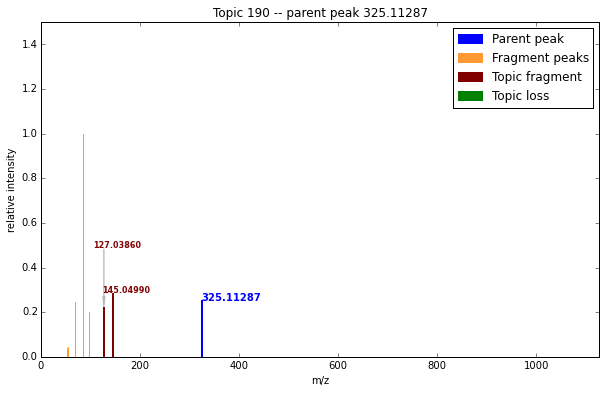

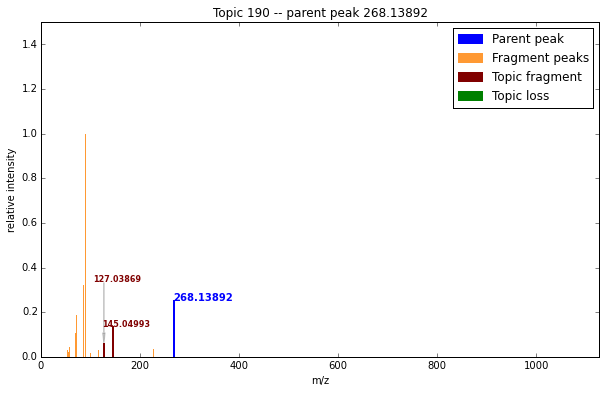

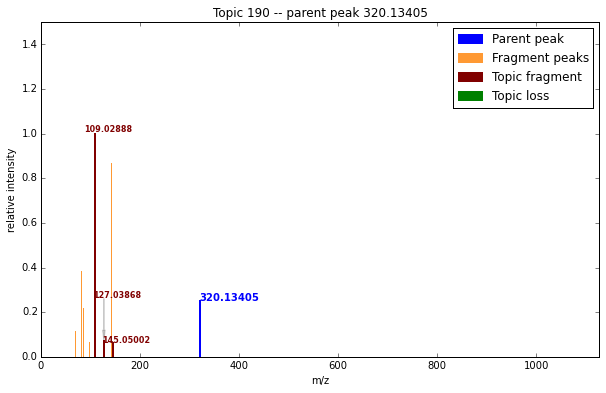

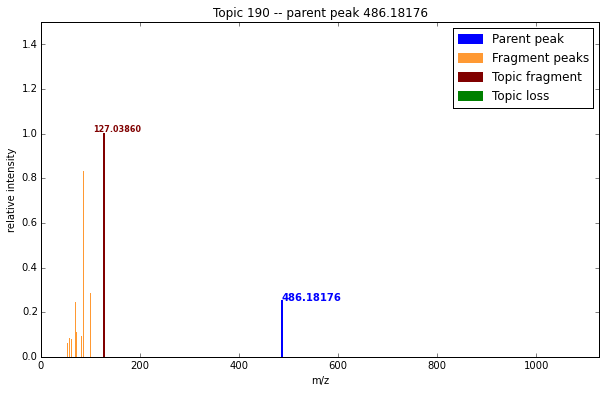

Topic 203 h-index=4

- bag 0:
	fragment_98.05999 (0.125009027226), 
	fragment_278.05554 (0.0982884379288), 
	fragment_165.07001 (0.0527912183144), 
	fragment_157.10848 (0.0506246840471), 

- bag 1:

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    10022	363.18438	791.985		1.081e+06	0.768
2    8576 	374.79834	622.592		5.219e+06	0.284
3    10532	291.16317	729.738		5.737e+06	0.255
4    10528	291.16318	632.053		6.842e+06	0.169

Fragments

1    fragment_98.05999 (0.125)
 peakID  MSnParentPeakID  mz        rt       intensity
 22288    8576            98.06003  615.519  0.076200 
 23722   10022            98.06017  798.207  0.961431 
 24510   10528            98.06009  643.487  0.739044 
 24700   10532            98.06015  720.628  0.761204 
2    fragment_278.05554 (0.098)
 peakID  MSnParentPeakID  mz        rt       intensity
 22286    8576            278.0553  615.519  0.101901 
 23723   10022            278.0559  798.207  0.598173 
 24513   10528            278.0557  643.487  0.

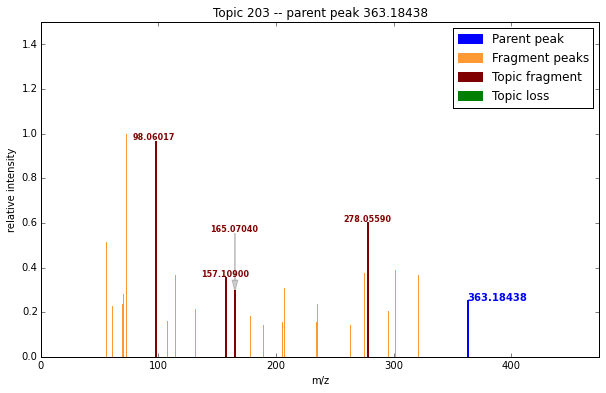

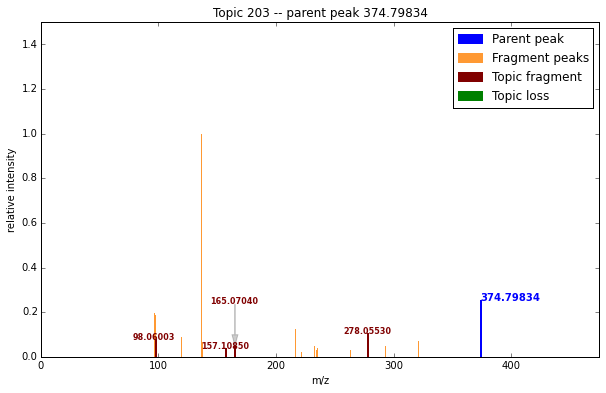

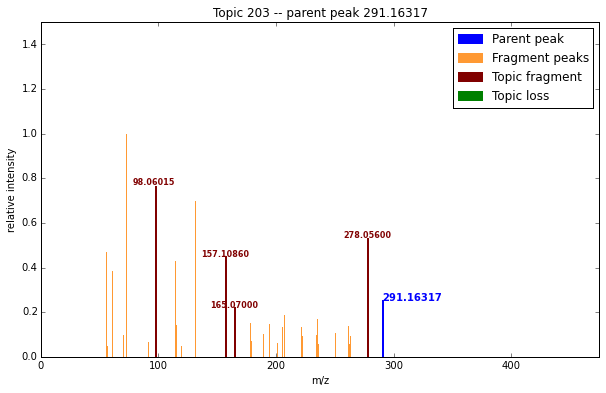

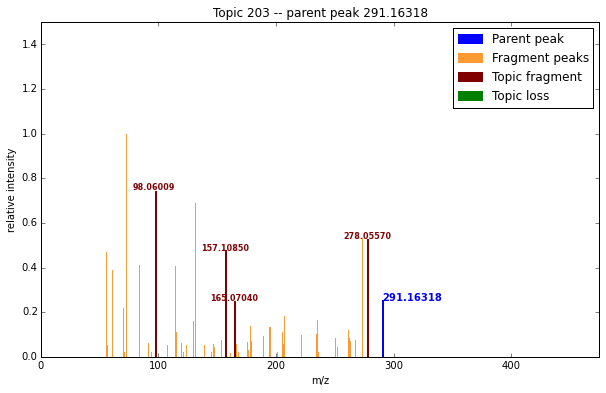

Topic 234 h-index=4

- bag 0:
	fragment_177.05473 (0.243542253173), 
	fragment_145.02839 (0.172420605522), 
	fragment_89.03862 (0.163036499234), 
	fragment_117.03314 (0.13340247938), 

- bag 1:
	loss_193.07363 (0.0588235294118), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    8088 	307.17645	565.722		1.986e+06	0.945
2    12747	265.15453	1093.700		4.872e+05	0.884
3    12752	265.15453	1145.810		4.082e+05	0.857
4    3579 	369.11816	290.983		4.275e+05	0.830
5    8204 	307.09988	614.695		1.755e+06	0.404

Fragments

1    fragment_177.05473 (0.244)
 peakID  MSnParentPeakID  mz          rt        intensity
 15622    3579            177.054614   292.200  1.000000 
 21797    8088            177.054600   573.652  0.984119 
 21854    8204            177.054700   612.455  0.963804 
 25394   12747            177.054800  1104.320  1.000000 
 25407   12752            177.054500  1150.880  1.000000 
2    fragment_145.02839 (0.172)
 peakID  MSnParentPeakID  mz          rt        intensity


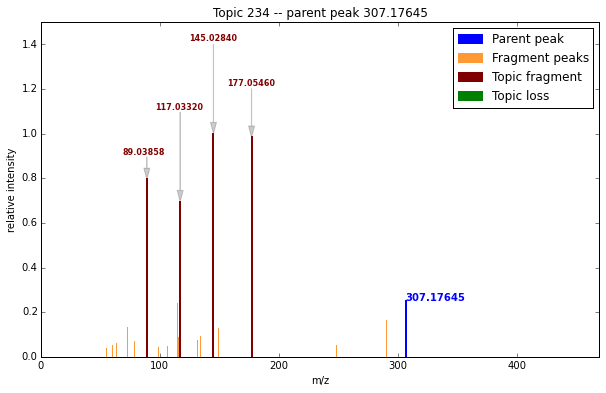

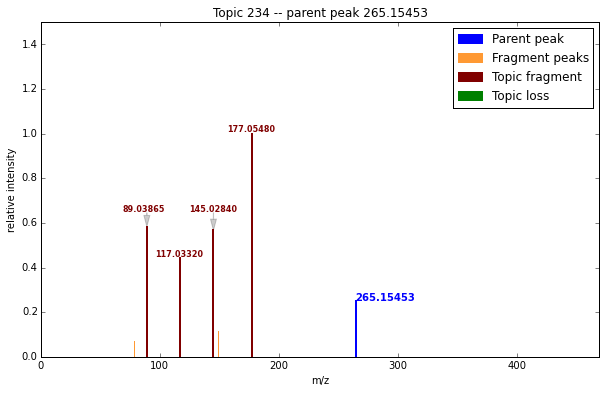

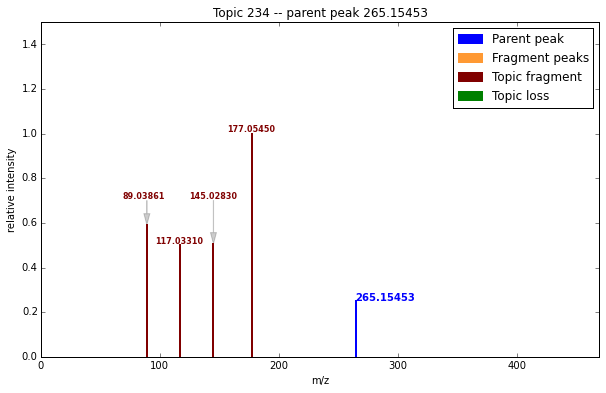

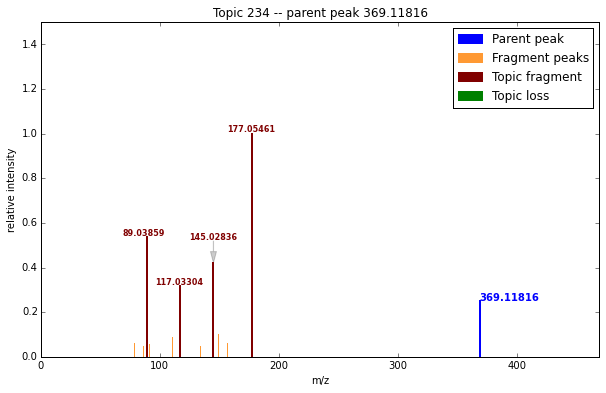

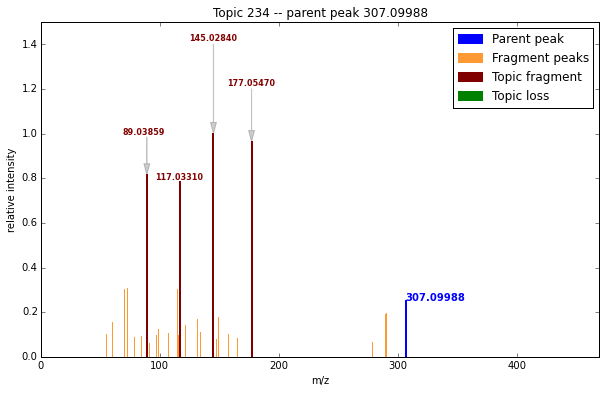

Topic 239 h-index=4

- bag 0:
	fragment_81.07 (0.133728088175), 
	fragment_67.05455 (0.121416427273), 
	fragment_95.08537 (0.112036114205), 
	fragment_105.07017 (0.0774462097673), 
	fragment_55.05468 (0.0704109749663), 
	fragment_107.08554 (0.068652166266), 

- bag 1:

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    2149 	291.26812	238.237		5.693e+05	0.924
2    1828 	311.13680	254.771		6.126e+05	0.591
3    2733 	383.20642	282.730		7.963e+05	0.219
4    1918 	309.22704	251.436		4.982e+05	0.135
5    2834 	241.17968	239.890		4.509e+05	0.096

Fragments

1    fragment_81.07 (0.134)
 peakID  MSnParentPeakID  mz         rt       intensity
 13804   1828             81.070018  254.370  0.612515 
 14050   2149             81.069972  237.694  1.000000 
 14867   2733             81.070198  280.324  0.507521 
 15009   2834             81.069874  238.792  0.935304 
2    fragment_67.05455 (0.121)
 peakID  MSnParentPeakID  mz         rt       intensity
 13802   1828             67.054620  2

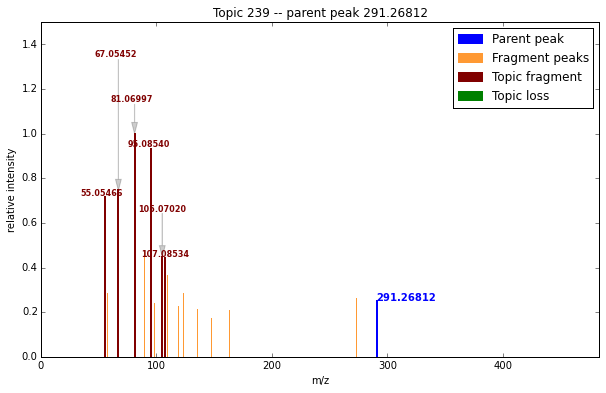

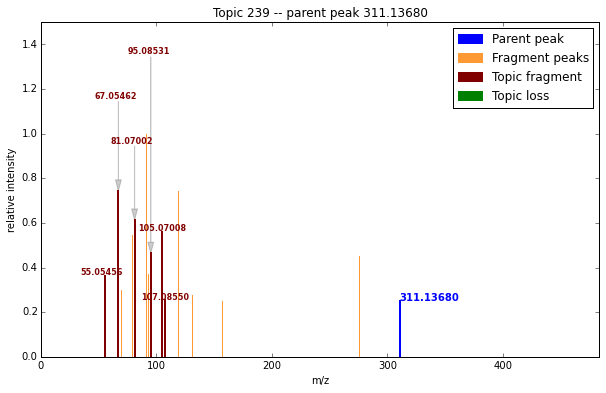

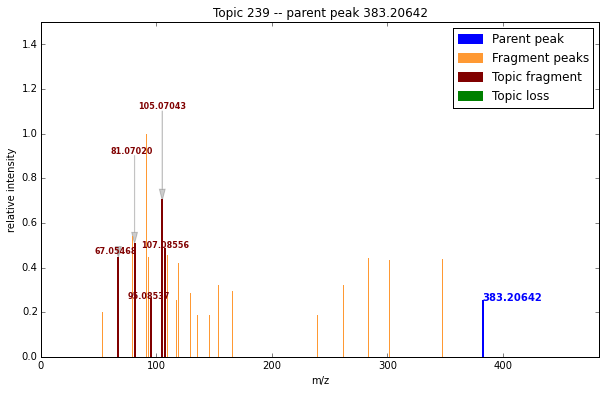

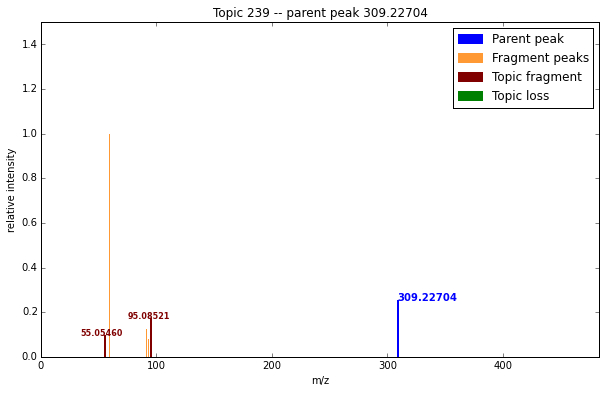

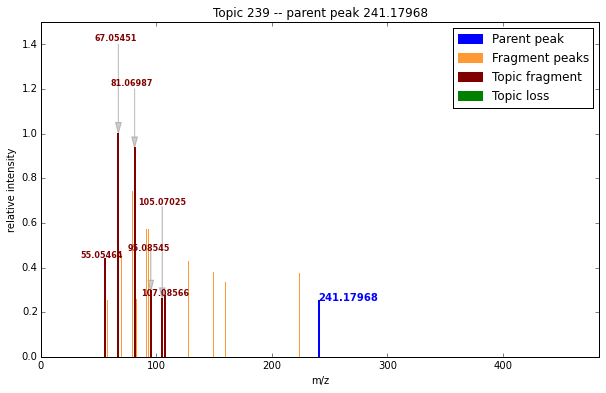

Topic 2 h-index=3

- bag 0:
	fragment_144.10184 (0.363656436299), 
	fragment_85.06477 (0.232648855524), 
	fragment_102.0918 (0.0972252888791), 

- bag 1:
	loss_105.04249 (0.492121581783), 
	loss_133.03727 (0.0539798719122), 
	loss_135.05318 (0.0519467317272), 

- bag 2:
	mzdiff_59.03704 (0.0799006146201), 

Parent peaks

     peakID	mz		rt		int		score
1    7060 	190.10734	328.784		5.665e+06	0.657
2    7796 	189.12336	564.091		1.418e+07	0.428
3    4101 	204.12312	259.764		3.971e+05	0.399
4    7061 	190.10737	416.080		5.417e+06	0.230
5    7063 	190.10733	387.071		2.743e+06	0.166
6    6711 	189.08691	488.384		3.772e+06	0.156
7    10898	203.15030	1065.250		3.887e+05	0.120
8    1569 	367.21161	212.026		1.617e+06	0.065
9    2483 	257.18577	276.253		4.999e+05	0.063

Fragments

1    fragment_144.10184 (0.364)
 peakID  MSnParentPeakID  mz          rt        intensity
 14442    2483            144.101646   274.284  0.114092 
 15965    4101            144.102024   260.591  1.000000 
 19969    706

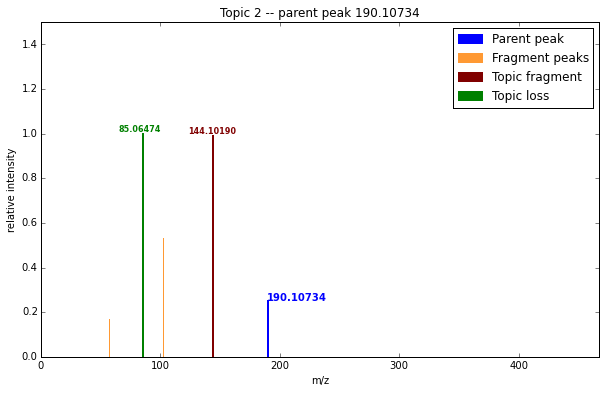

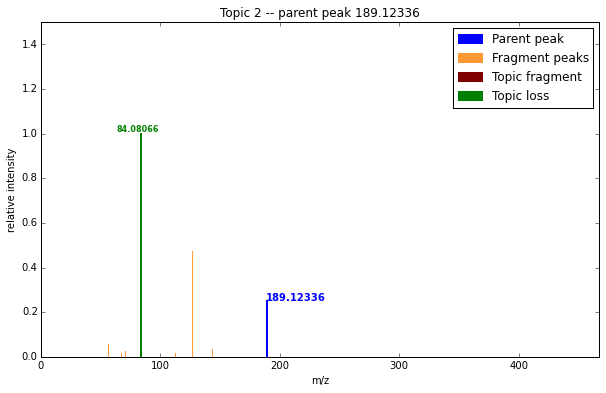

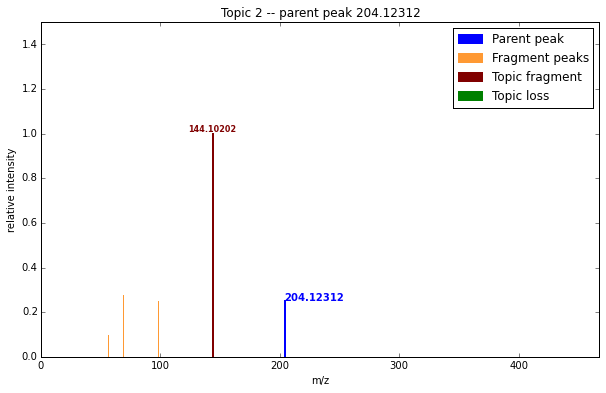

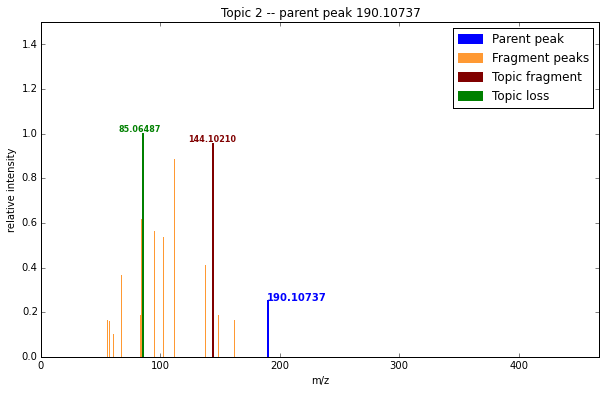

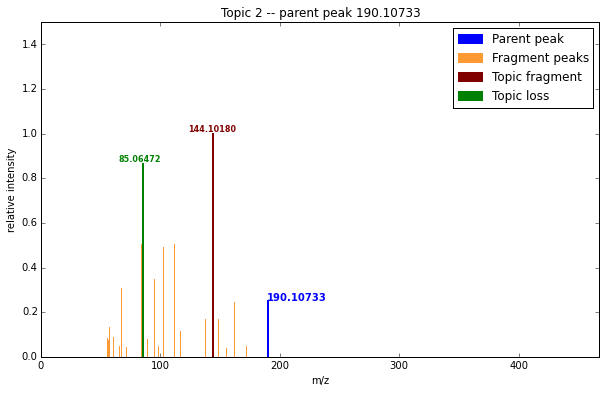

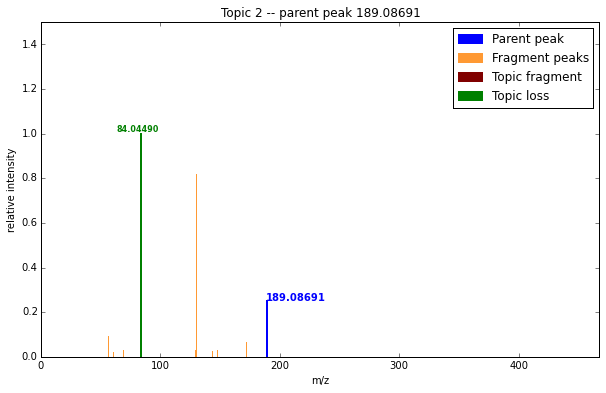

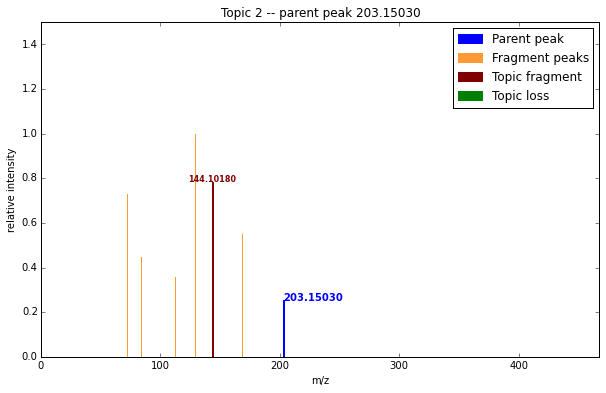

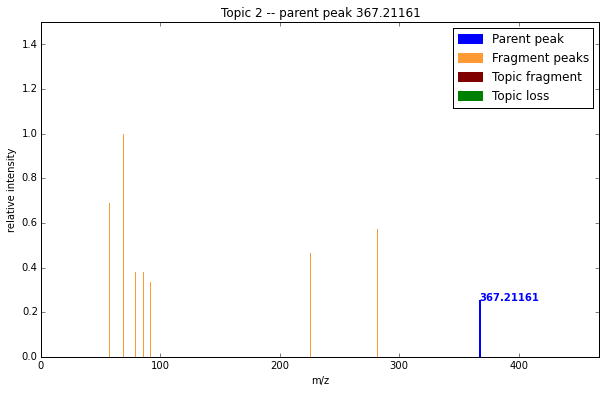

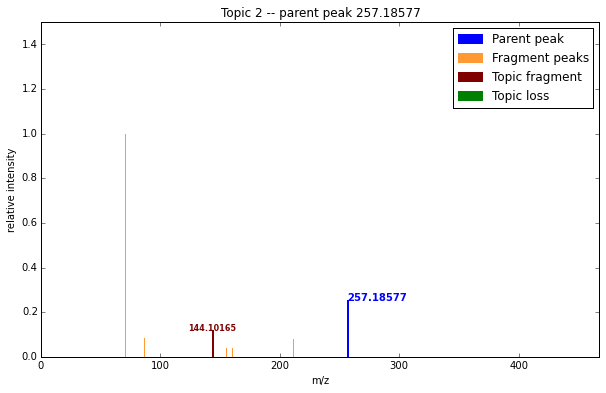

Topic 6 h-index=3

- bag 0:
	fragment_105.03345 (0.357745275969), 
	fragment_103.05449 (0.0961887477314), 
	fragment_93.06982 (0.0694993060745), 

- bag 1:
	loss_75.10479 (0.36296459689), 
	loss_127.09933 (0.0872394397265), 

- bag 2:
	mzdiff_51.99452 (0.0689849836288), 
	mzdiff_27.99513 (0.0509201761319), 

Parent peaks

     peakID	mz		rt		int		score
1    12549	180.13825	1189.260		2.487e+05	1.893
2    12562	180.13824	1176.410		3.134e+05	1.520
3    12548	180.13825	1163.280		4.215e+05	1.113
4    12561	180.13824	1111.520		1.270e+06	0.902
5    12555	180.13824	1144.760		6.492e+05	0.874
6    12563	180.13824	1018.080		7.479e+05	0.720

Fragments

1    fragment_105.03345 (0.358)
 peakID  MSnParentPeakID  mz        rt       intensity
 25220   12548            105.0334  1157.87  0.581548 
 25234   12549            105.0334  1190.43  1.000000 
 25252   12555            105.0335  1142.66  0.415524 
 25270   12561            105.0334  1111.93  0.252498 
 25286   12562            105.0335  1173.57 

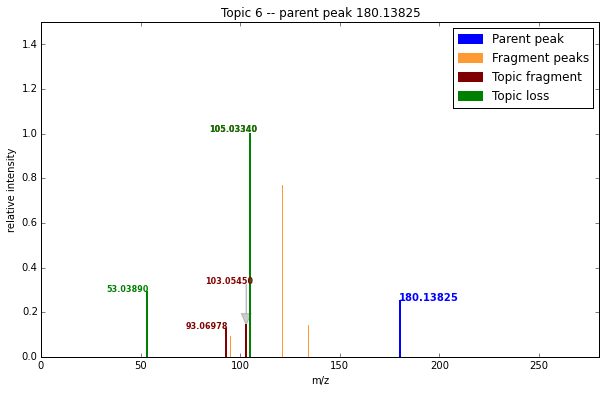

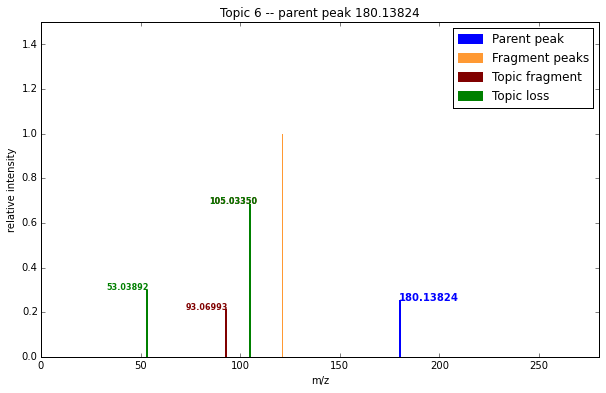

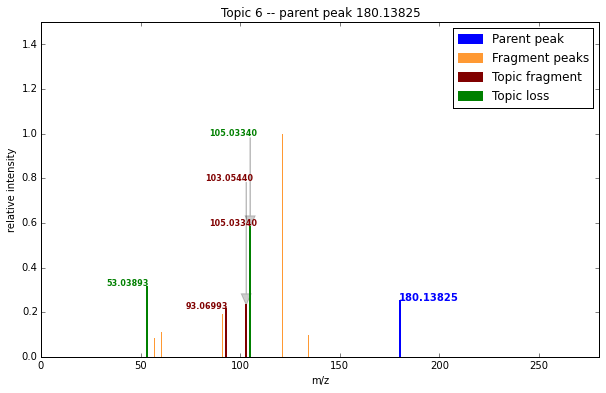

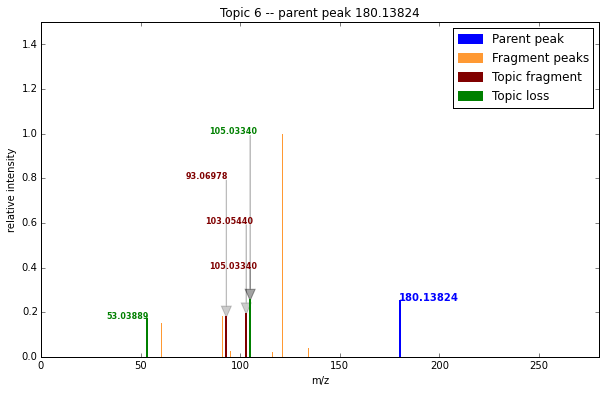

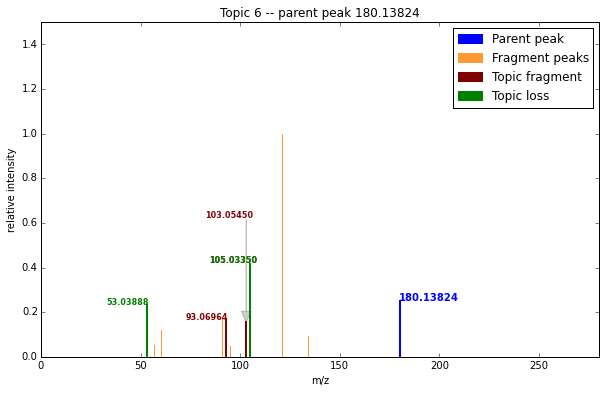

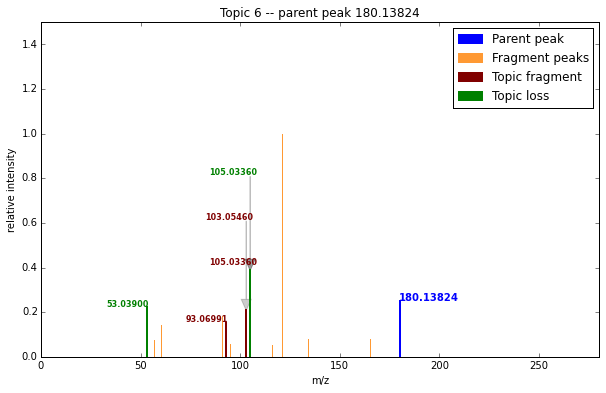

Topic 48 h-index=3

- bag 0:
	fragment_86.09652 (0.194012077911), 
	fragment_125.00056 (0.159989793315), 
	fragment_141.05511 (0.1591392362), 
	fragment_98.98387 (0.143829208131), 

- bag 1:
	loss_59.07329 (0.201221840397), 
	loss_85.08914 (0.19867633957), 
	loss_99.05338 (0.127402316406), 

- bag 2:
	mzdiff_38.904 (0.0760934691432), 

Parent peaks

     peakID	mz		rt		int		score
1    9790 	184.07331	617.886		2.333e+07	0.874
2    9791 	184.07328	729.738		2.551e+05	0.861
3    9326 	240.10764	688.576		3.093e+05	0.610
4    9948 	258.10999	605.017		1.105e+09	0.237
5    6051 	320.13405	460.808		4.898e+06	0.171

Fragments

1    fragment_86.09652 (0.194)
 peakID  MSnParentPeakID  mz        rt       intensity
 23505   9790             86.09659  633.858  1.000000 
 23509   9791             86.09658  734.606  1.000000 
 23602   9948             86.09651  603.782  0.302643 
2    fragment_125.00056 (0.160)
 peakID  MSnParentPeakID  mz        rt       intensity
 23506   9790             125.0006  6

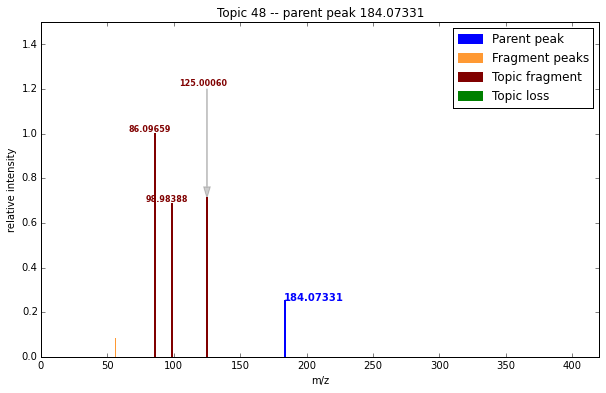

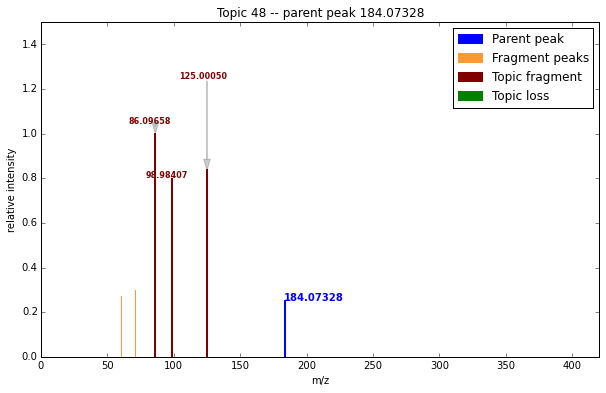

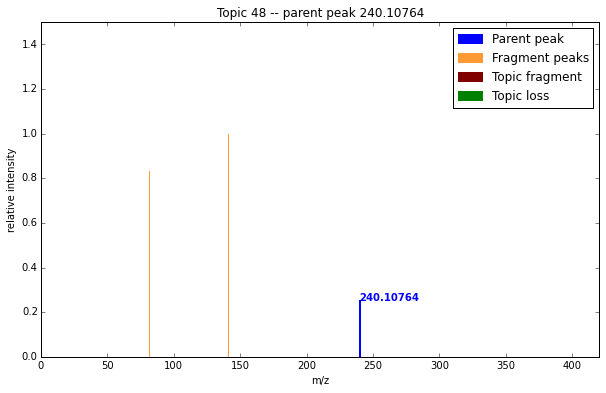

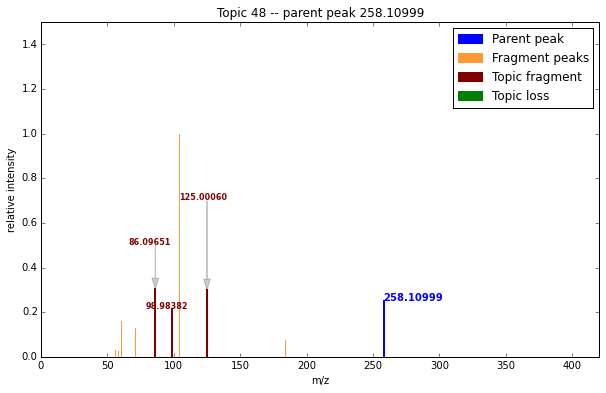

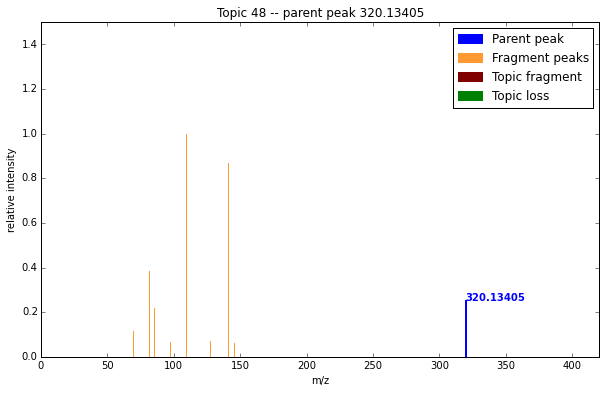

Topic 53 h-index=3

- bag 0:
	fragment_116.07114 (0.295619480633), 
	fragment_100.11239 (0.17495846813), 
	fragment_181.09784 (0.122497158346), 
	fragment_209.09245 (0.0560461659526), 

- bag 1:
	loss_143.05793 (0.218397539183), 
	loss_113.08407 (0.12172257214), 

- bag 2:
	mzdiff_125.04784 (0.0713077356846), 

Parent peaks

     peakID	mz		rt		int		score
1    6397 	146.08117	471.593		6.029e+06	1.150
2    7108 	146.11755	486.862		2.432e+06	0.742
3    3427 	326.17101	297.637		1.191e+06	0.602
4    5721 	324.15548	417.639		1.094e+06	0.566
5    3821 	340.18674	290.983		3.782e+06	0.537
6    7847 	229.15463	297.637		1.477e+06	0.522
7    5724 	324.15542	452.947		7.980e+05	0.517
8    5720 	324.15534	348.358		1.048e+06	0.514
9    5534 	453.19811	428.854		7.807e+05	0.273
10   2953 	437.23928	290.983		4.992e+05	0.207
11   2816 	471.22375	289.342		3.912e+05	0.105
12   6343 	227.10254	330.420		1.193e+07	0.084

Fragments

1    fragment_116.07114 (0.296)
 peakID  MSnParentPeakID  mz          rt      

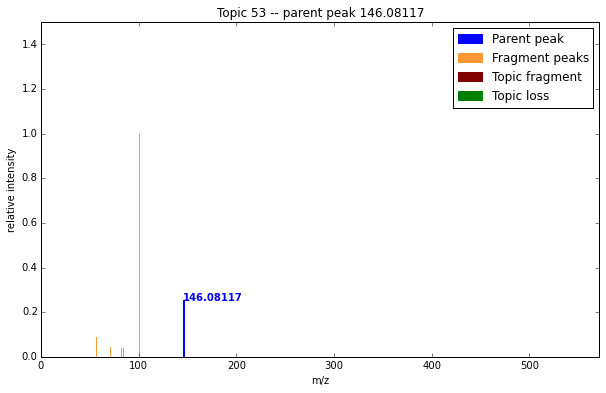

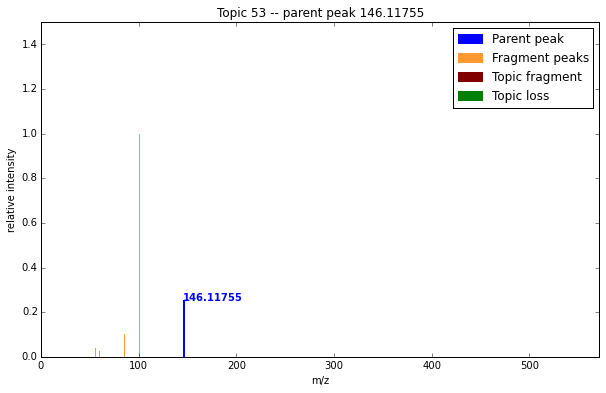

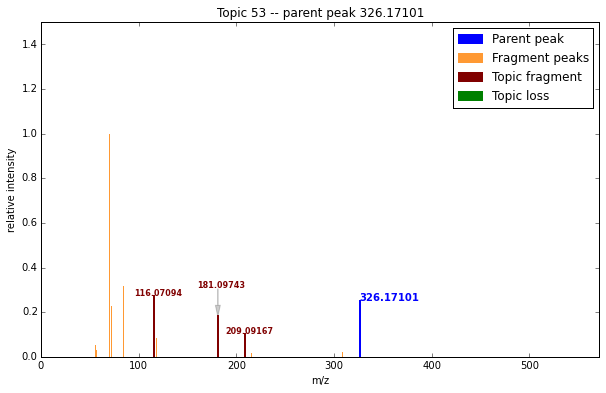

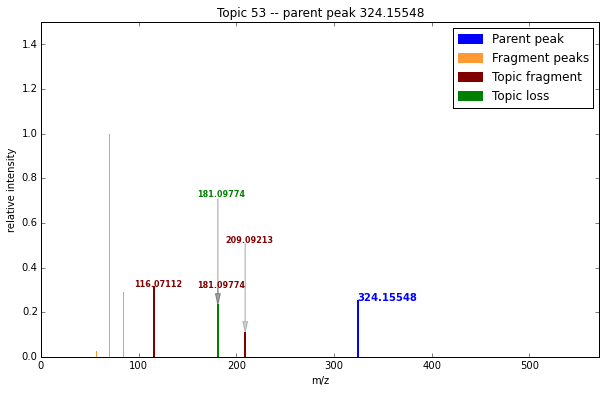

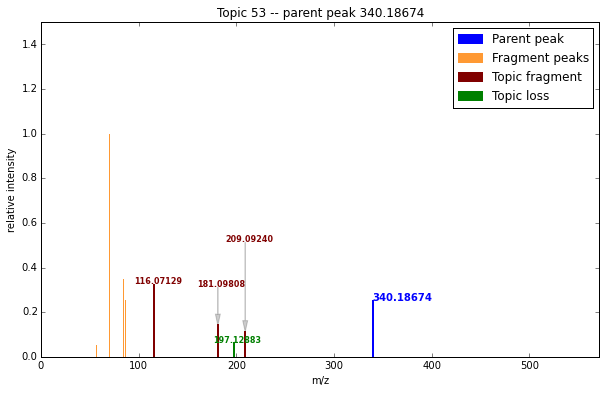

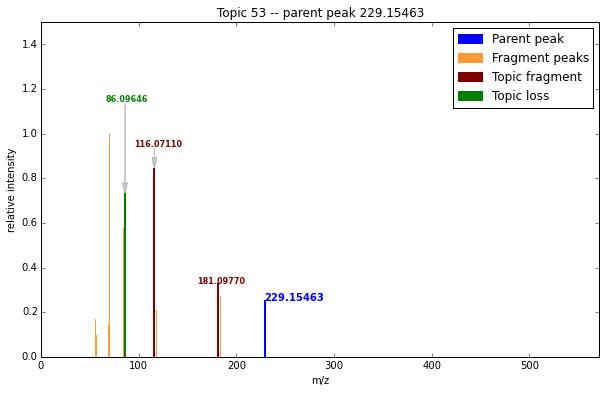

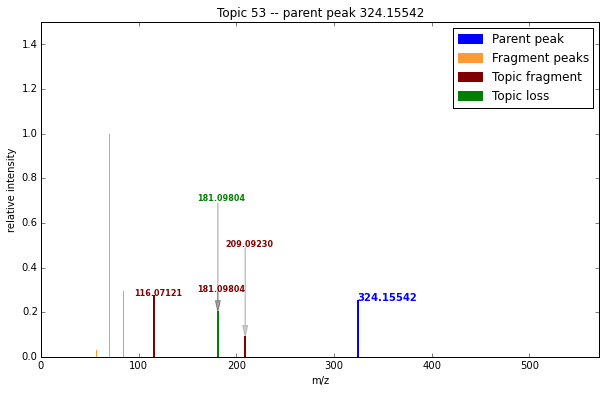

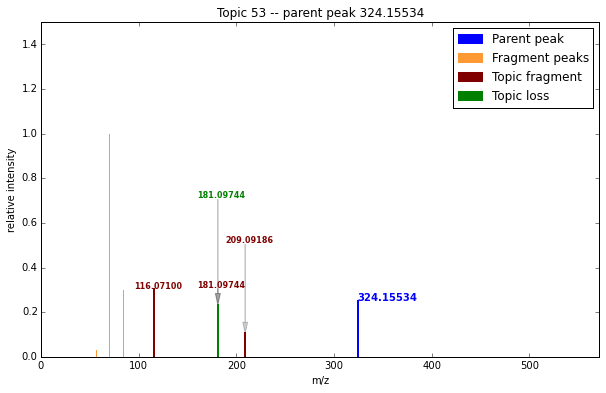

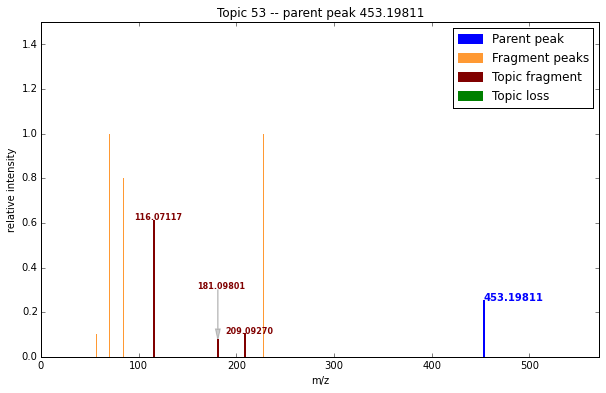

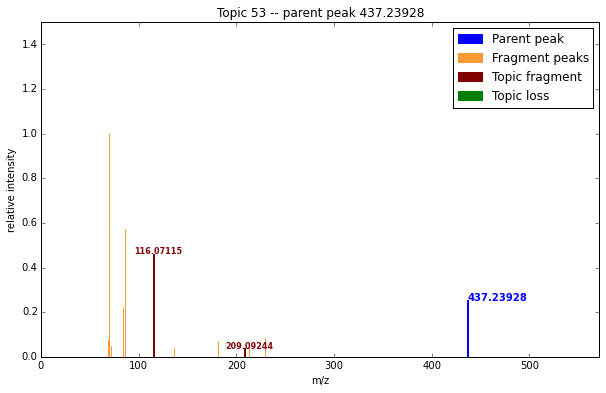

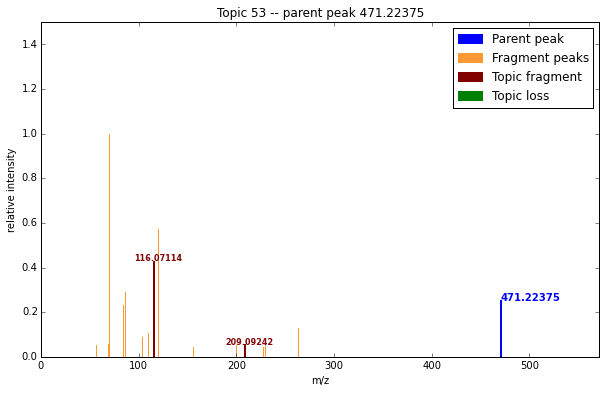

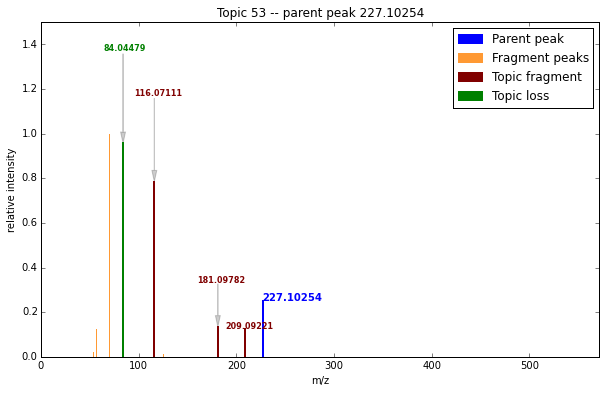

Topic 58 h-index=3

- bag 0:
	fragment_57.07007 (0.499915274342), 
	fragment_495.26484 (0.0844206459484), 
	fragment_327.07802 (0.0827261327821), 
	fragment_551.33272 (0.0623919747856), 

- bag 1:

- bag 2:
	mzdiff_33.98401 (0.122532259843), 

Parent peaks

     peakID	mz		rt		int		score
1    6284 	163.13286	259.764		4.586e+06	0.947
2    1085 	647.45872	220.295		1.120e+06	0.903
3    924  	708.51148	220.295		6.086e+05	0.859
4    1741 	663.45372	221.946		2.136e+06	0.810
5    1144 	680.48034	221.946		1.786e+06	0.798
6    670  	489.24841	210.369		4.691e+05	0.668
7    4497 	202.14378	243.181		2.058e+06	0.211
8    1386 	394.25876	208.697		5.095e+06	0.192
9    1569 	367.21161	212.026		1.617e+06	0.130
10   1488 	447.27411	236.531		7.450e+05	0.107
11   3343 	338.34169	233.227		1.835e+06	0.106
12   1288 	352.30572	234.884		3.942e+05	0.097
13   3459 	241.14337	248.128		4.879e+05	0.070
14   781  	327.19533	208.697		7.372e+05	0.068
15   2598 	279.15900	236.531		1.055e+06	0.068
16   2633 	379.21151	

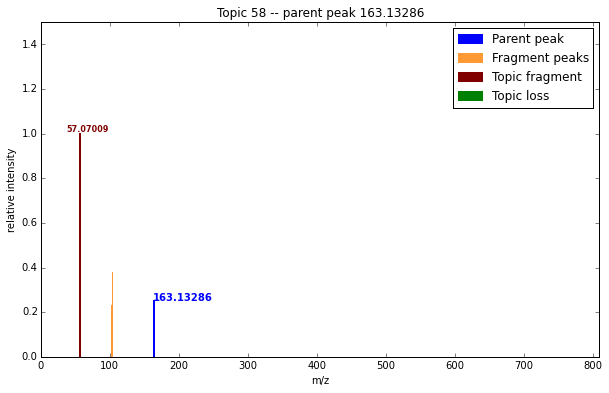

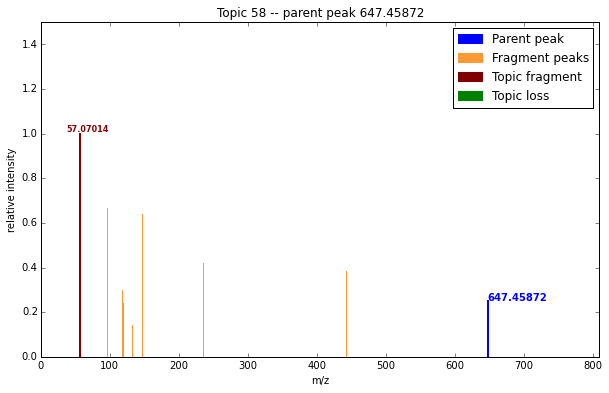

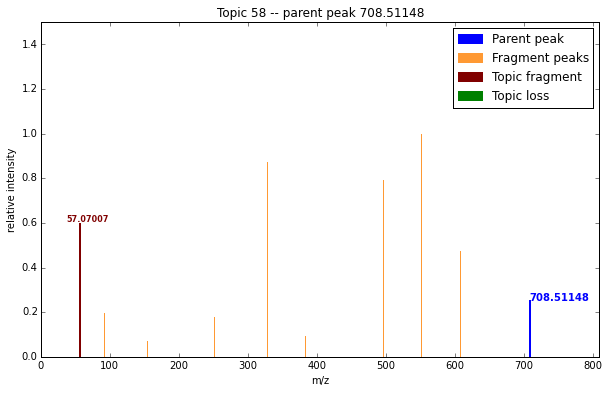

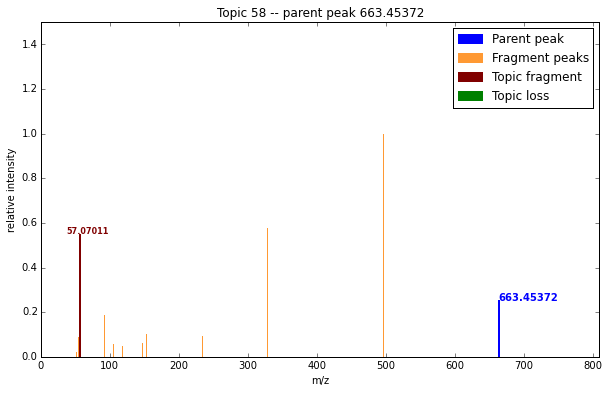

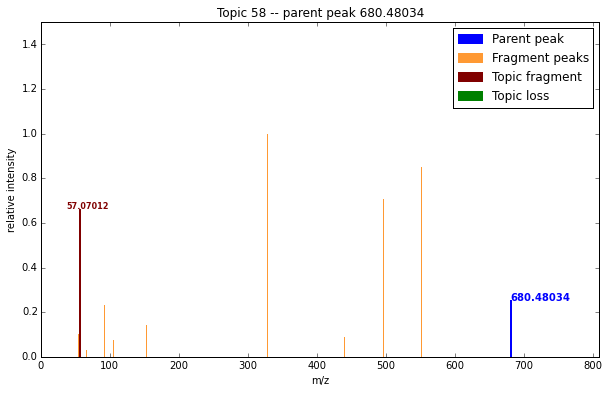

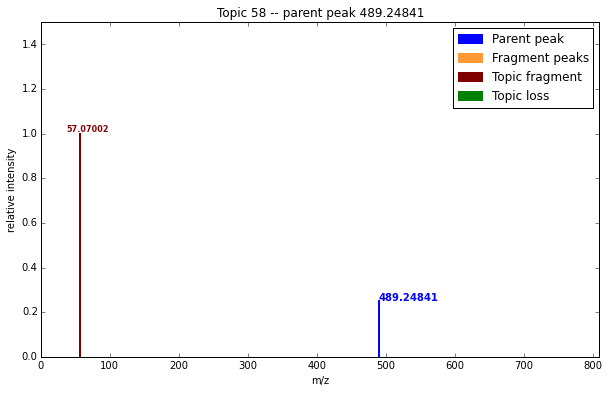

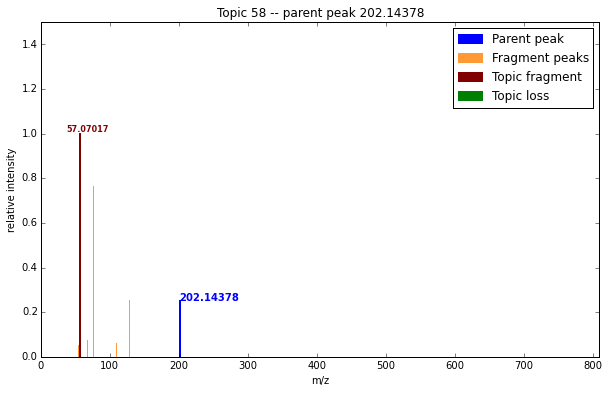

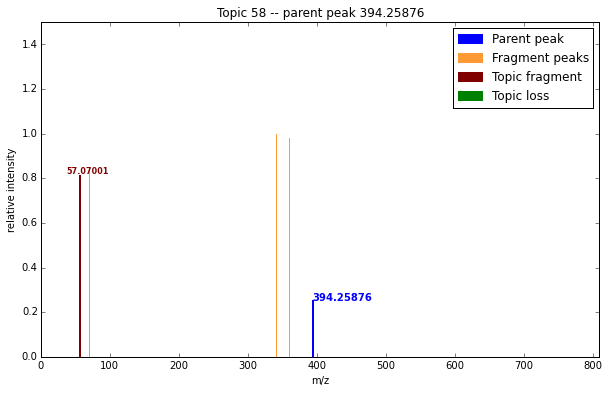

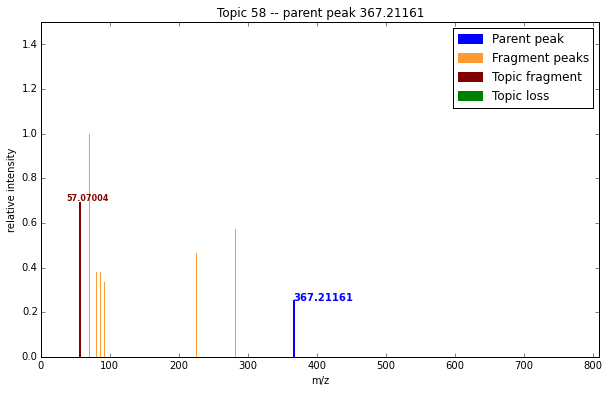

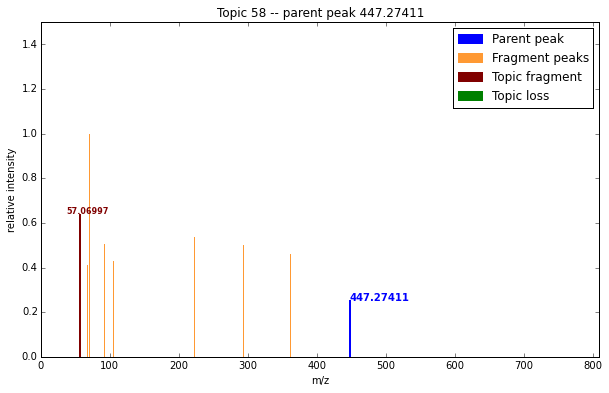

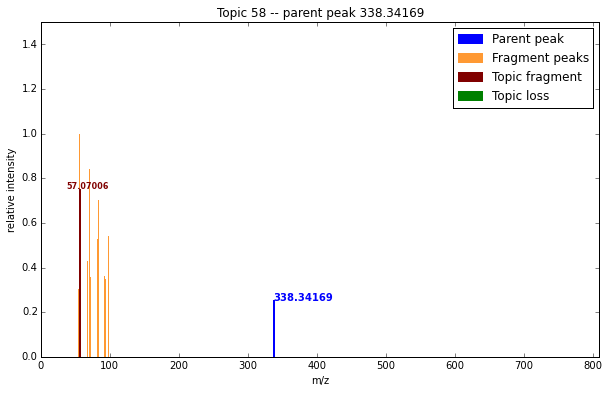

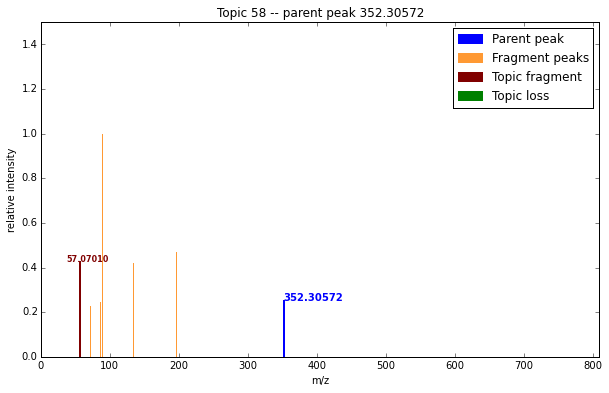

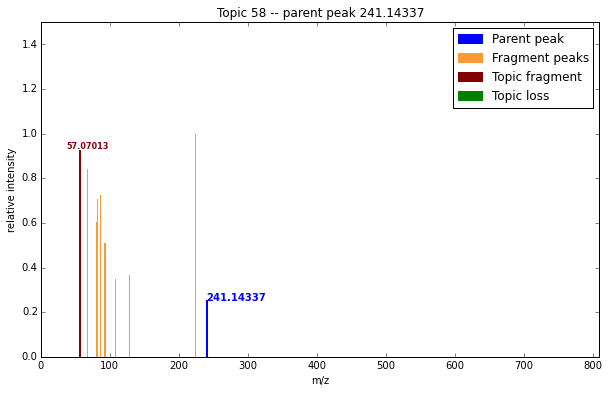

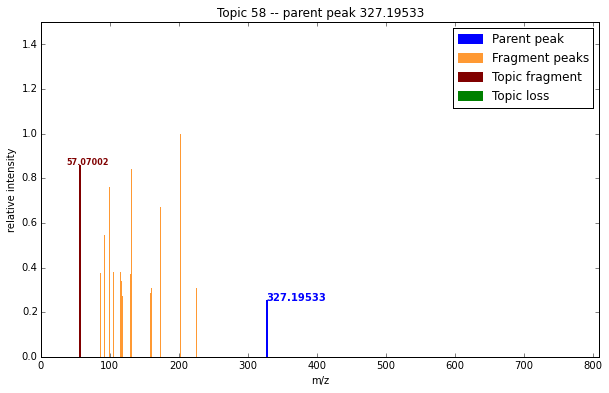

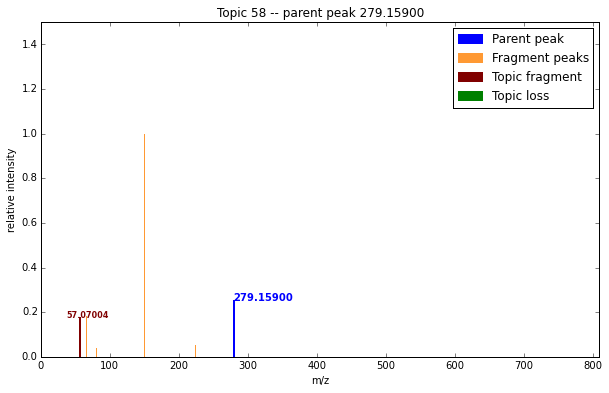

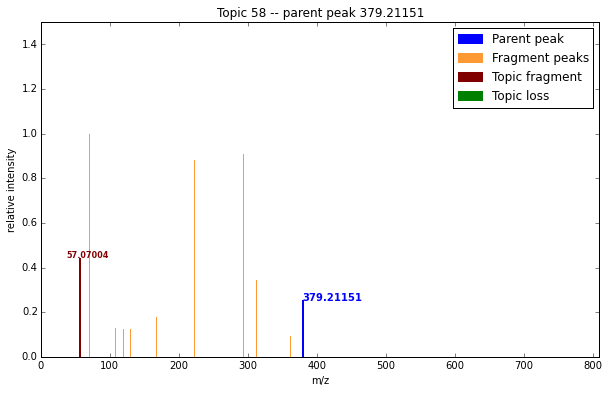

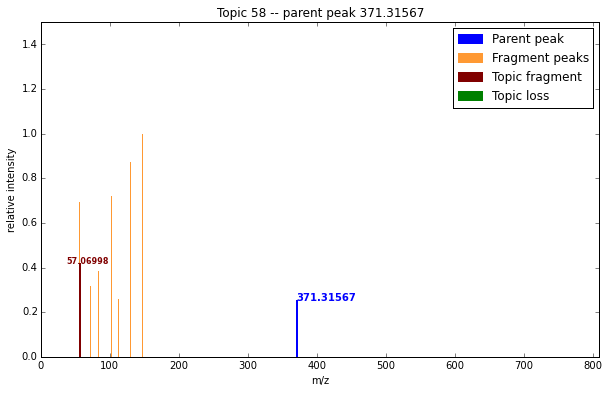

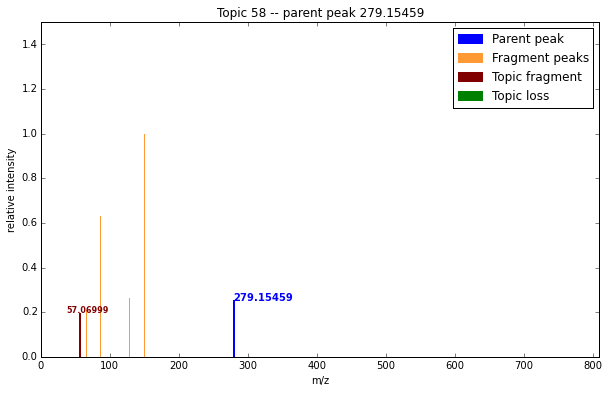

Topic 61 h-index=3

- bag 0:
	fragment_188.07057 (0.157176810995), 
	fragment_94.06505 (0.112741552134), 
	fragment_206.0825 (0.0982742585512), 
	fragment_190.08769 (0.05383899969), 
	fragment_176.07104 (0.0507388653508), 

- bag 1:
	loss_173.06877 (0.244062575991), 
	loss_66.03222 (0.1330145092), 
	loss_160.0369 (0.0900543081786), 
	loss_146.05776 (0.0722217719056), 
	loss_163.04805 (0.0584420847856), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    5603 	254.10221	294.270		4.091e+05	0.580
2    5605 	254.10217	348.358		7.909e+05	0.527
3    5604 	254.10218	330.420		7.728e+05	0.469

Fragments

1    fragment_188.07057 (0.157)
 peakID  MSnParentPeakID  mz          rt       intensity
 17567   5603             188.070585  292.339  0.524646 
 17593   5604             188.070471  326.053  0.602701 
 17631   5605             188.070235  358.932  0.524276 
2    fragment_94.06505 (0.113)
 peakID  MSnParentPeakID  mz         rt       intensity
 17573   5603             94.065600  292

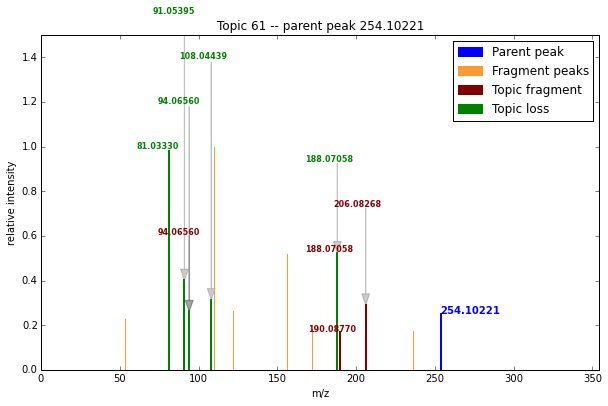

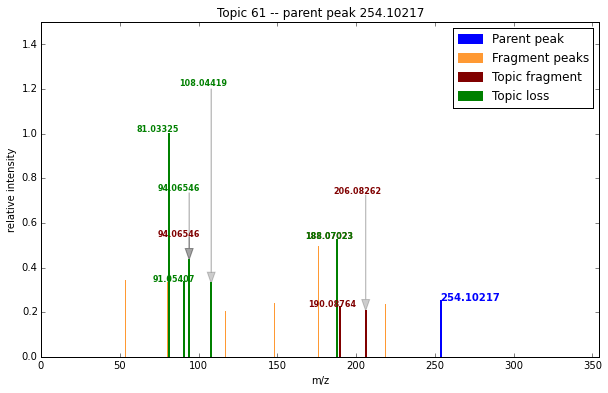

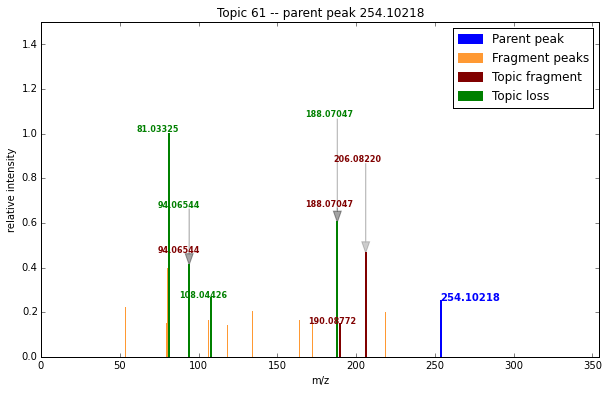

Topic 82 h-index=3

- bag 0:
	fragment_198.1136 (0.336548166424), 
	fragment_154.08576 (0.0931927778401), 
	fragment_126.09181 (0.0853426040148), 

- bag 1:
	loss_18.0095 (0.297216995147), 
	loss_62.03715 (0.0813112805784), 
	loss_90.03154 (0.0743785282757), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    6341 	216.12305	385.459		2.965e+06	0.869
2    6340 	216.12306	351.627		9.099e+05	0.854
3    6339 	216.12311	409.811		1.012e+07	0.695

Fragments

1    fragment_198.1136 (0.337)
 peakID  MSnParentPeakID  mz          rt       intensity
 18725   6339             198.113834  406.808  1        
 18744   6340             198.113583  358.515  1        
 18771   6341             198.113694  390.717  1        
2    fragment_154.08576 (0.093)
 peakID  MSnParentPeakID  mz          rt       intensity
 18726   6339             154.085879  406.808  0.292105 
 18745   6340             154.085831  358.515  0.284633 
 18773   6341             154.085671  390.717  0.258337 
3    fragment_1

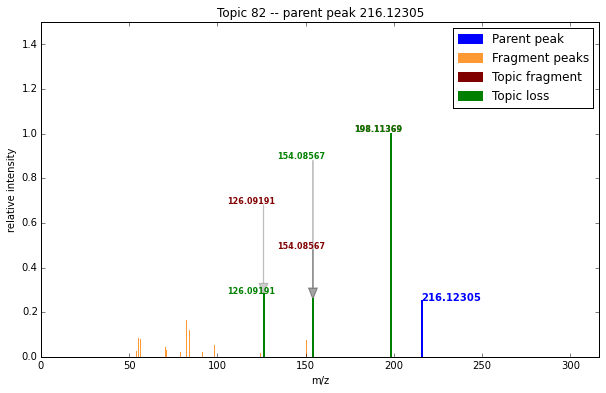

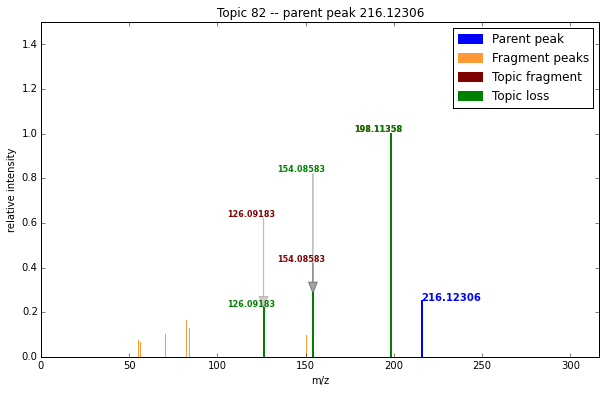

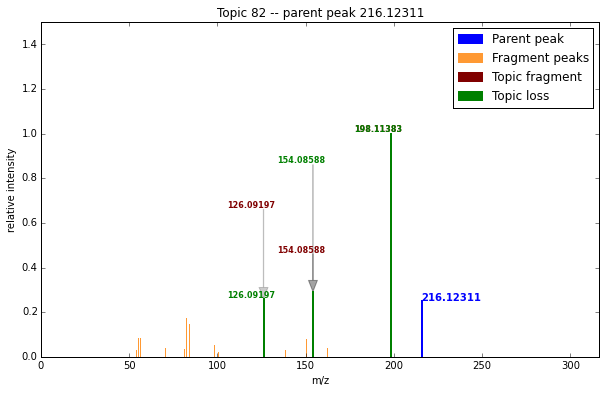

Topic 91 h-index=3

- bag 0:
	fragment_136.07598 (0.323934717724), 
	fragment_182.08216 (0.111195783324), 
	fragment_165.05397 (0.069283038039), 
	fragment_95.04936 (0.0661078300629), 
	fragment_119.04876 (0.0648377468724), 
	fragment_123.04462 (0.0521369149679), 

- bag 1:
	loss_115.0998 (0.0870459218643), 
	loss_161.10472 (0.0527758738862), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    8027 	182.08107	585.875		2.020e+07	0.851
2    2784 	280.15430	256.419		6.771e+05	0.800
3    2151 	308.18565	233.227		2.509e+06	0.642
4    4911 	154.08625	403.273		1.330e+06	0.528
5    7822 	311.12365	570.233		6.113e+05	0.439

Fragments

1    fragment_136.07598 (0.324)
 peakID  MSnParentPeakID  mz          rt       intensity
 14073   2151             136.075848  229.339  1.000000 
 14923   2784             136.075970  255.187  1.000000 
 16752   4911             136.076020  403.817  1.000000 
 21379   7822             136.075900  571.153  1.000000 
 21613   8027             136.075900  5

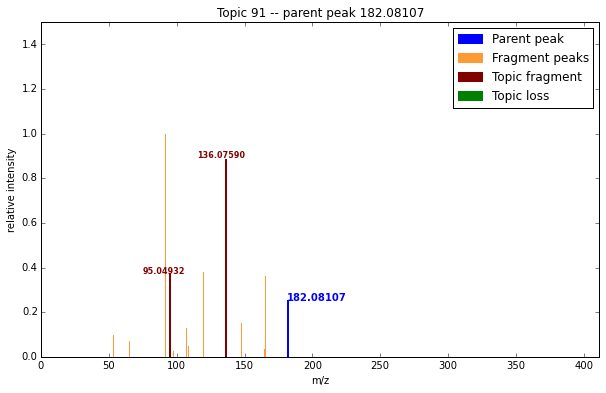

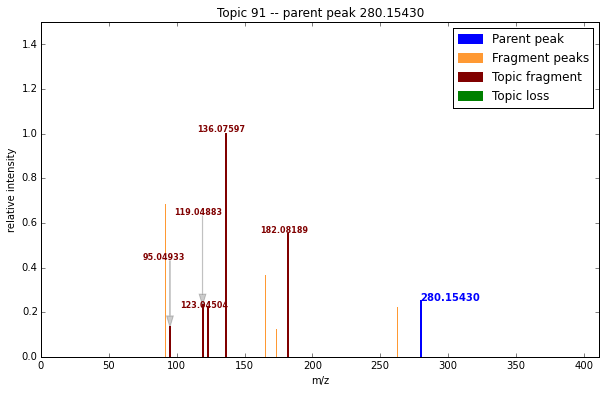

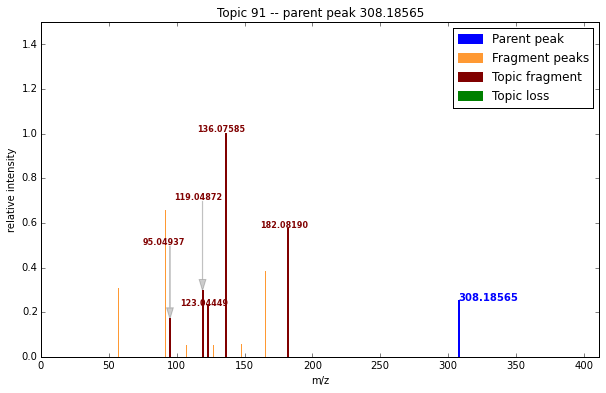

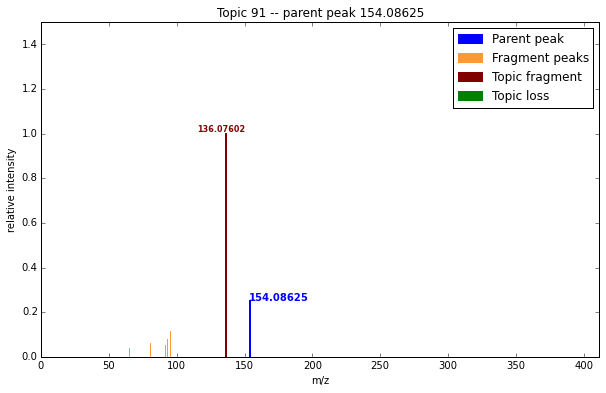

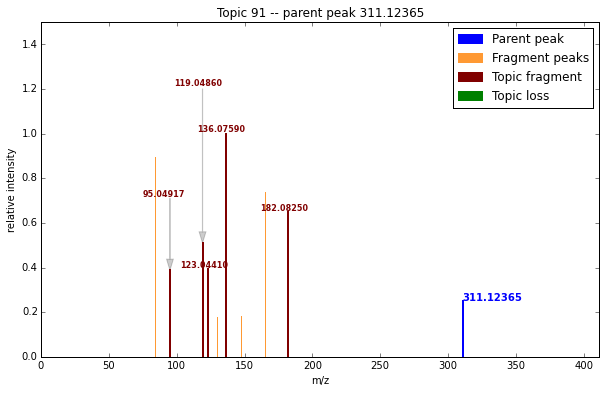

Topic 110 h-index=3

- bag 0:
	fragment_225.07566 (0.104136947218), 
	fragment_331.19013 (0.0831585130486), 
	fragment_281.13706 (0.0655366283461), 
	fragment_113.0602 (0.0512712931107), 
	fragment_261.14913 (0.0512712931107), 

- bag 1:
	loss_105.07856 (0.0605367172873), 
	loss_35.03718 (0.0584564177242), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    1515 	366.22731	210.369		2.972e+06	0.738
2    1168 	366.19963	224.227		5.821e+05	0.646
3    1569 	367.21161	212.026		1.617e+06	0.376
4    3397 	349.20080	210.369		4.867e+07	0.295

Fragments

1    fragment_225.07566 (0.104)
 peakID  MSnParentPeakID  mz          rt       intensity
 13334   1168             225.075783  211.483  0.260080 
 13561   1515             225.075985  204.581  0.240861 
 13657   1569             225.075611  220.851  0.466702 
 15403   3397             225.075902  215.595  0.288936 
2    fragment_331.19013 (0.083)
 peakID  MSnParentPeakID  mz          rt       intensity
 13333   1168             331.190

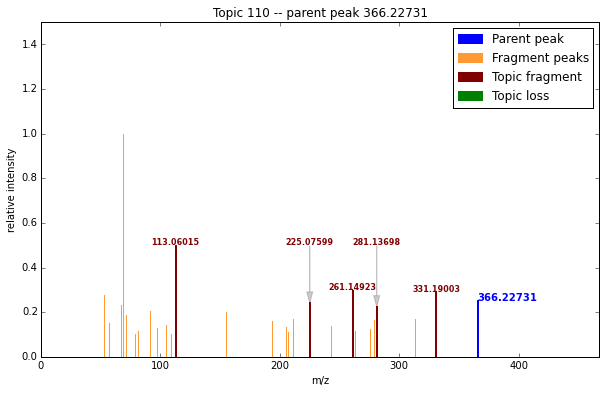

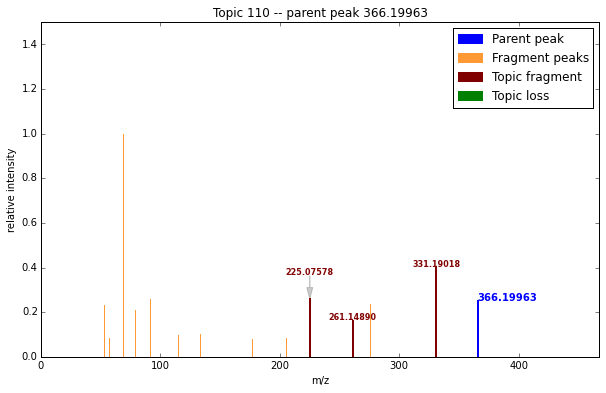

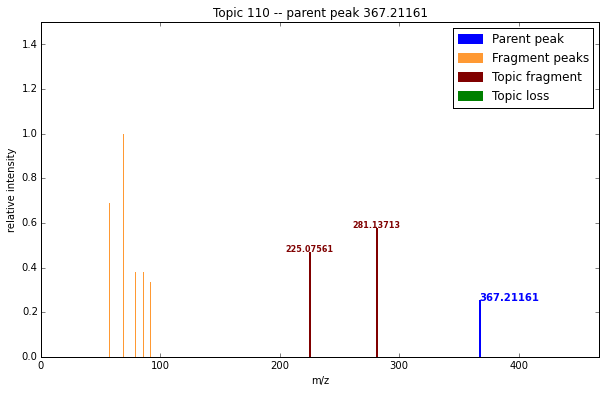

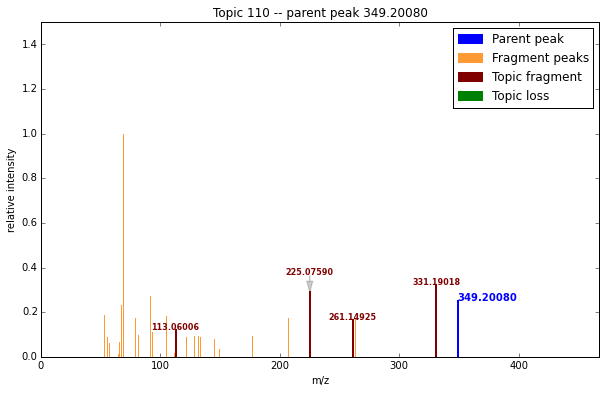

Topic 112 h-index=3

- bag 0:
	fragment_67.05455 (0.375024395684), 
	fragment_81.07 (0.299467477068), 
	fragment_55.05468 (0.150026486743), 

- bag 1:

- bag 2:
	mzdiff_23.99973 (0.17325897116), 
	mzdiff_26.0153 (0.148308505174), 
	mzdiff_28.03097 (0.0624495486901), 
	mzdiff_35.99945 (0.0595141997505), 
	mzdiff_16.03111 (0.0529096646364), 

Parent peaks

     peakID	mz		rt		int		score
1    6780 	180.10185	486.862		6.798e+06	0.732
2    3343 	338.34169	233.227		1.835e+06	0.628
3    2429 	257.04205	241.536		2.261e+06	0.616
4    1985 	313.23734	243.181		6.437e+05	0.339
5    3604 	195.13801	248.128		2.261e+06	0.319
6    1987 	333.26348	246.483		6.679e+05	0.313
7    3416 	253.14331	234.884		4.030e+05	0.311
8    1499 	277.21609	246.483		5.033e+05	0.284
9    2622 	346.25883	253.125		1.561e+06	0.263
10   3282 	213.14851	248.128		2.738e+06	0.238
11   906  	339.25308	216.950		1.582e+06	0.222
12   2834 	241.17968	239.890		4.509e+05	0.171
13   3459 	241.14337	248.128		4.879e+05	0.157
14   2103 	331

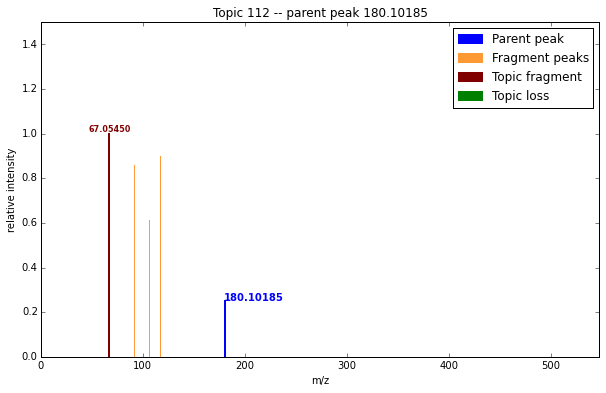

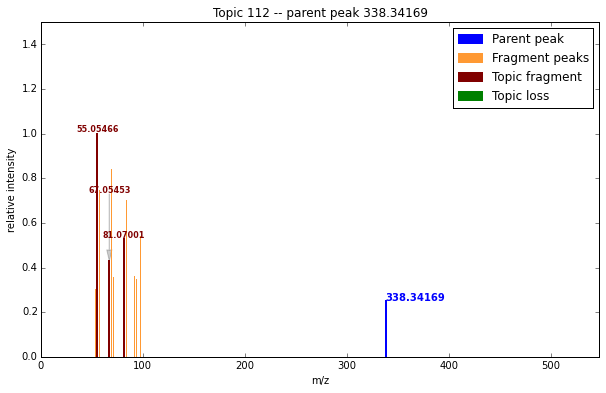

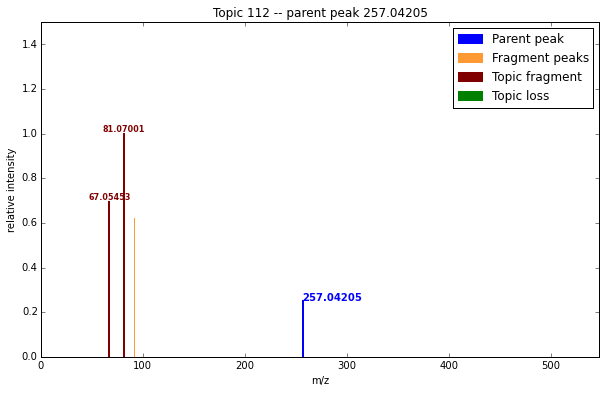

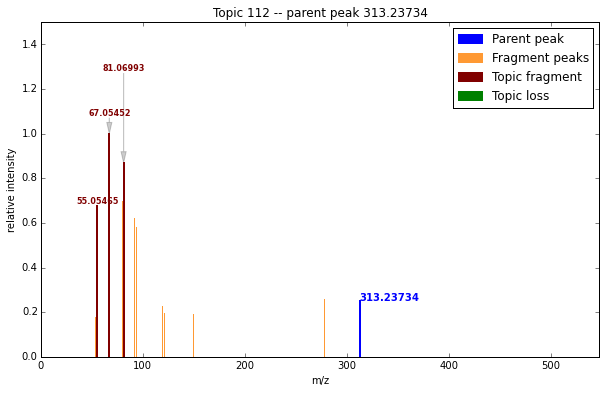

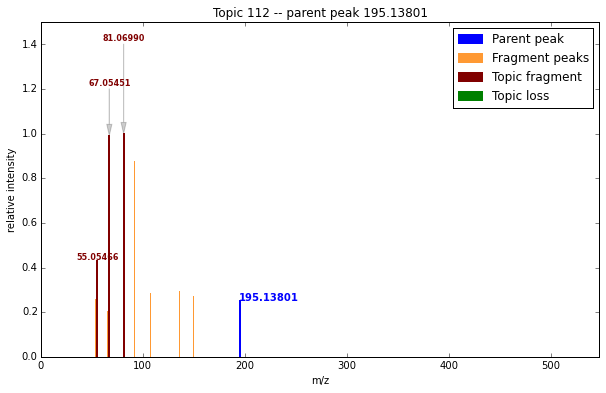

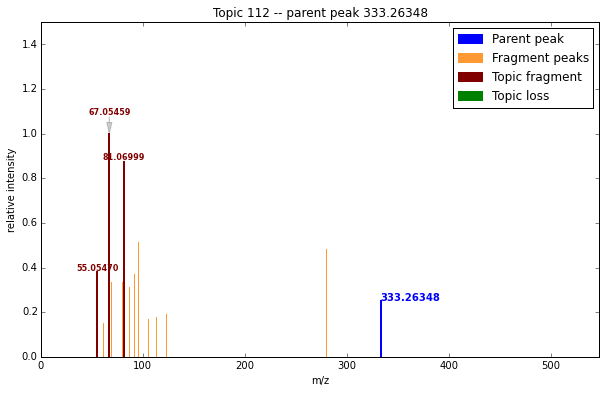

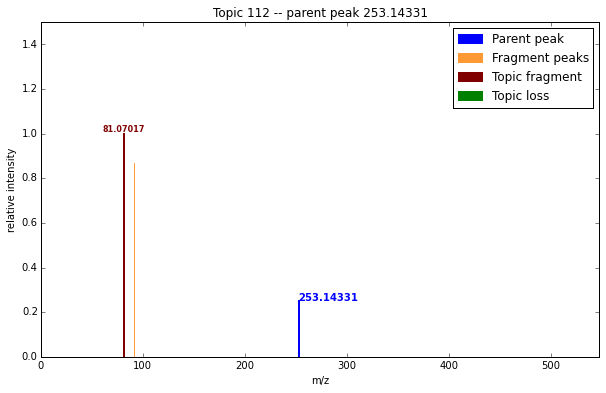

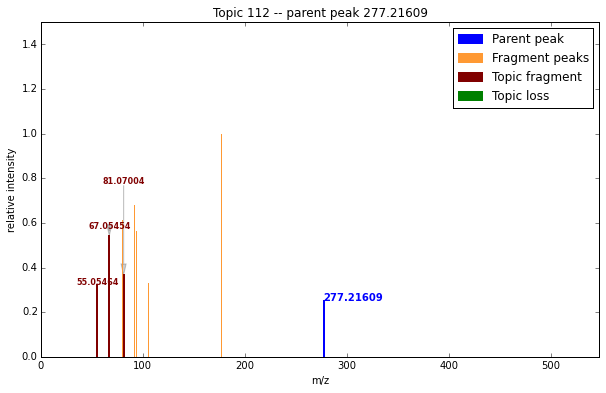

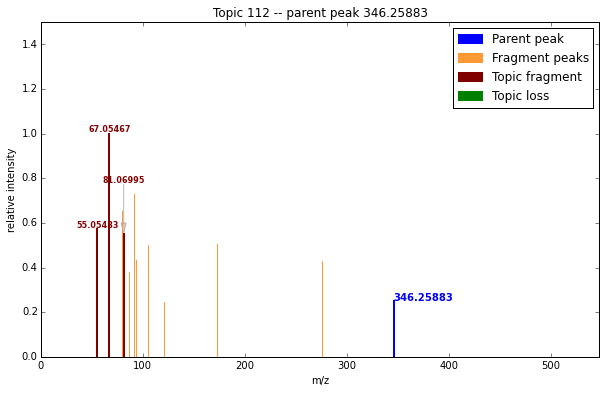

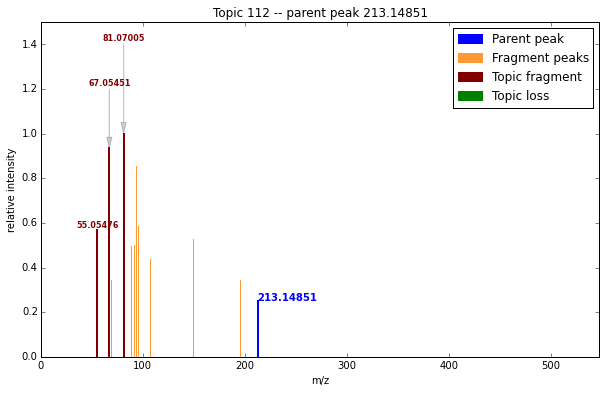

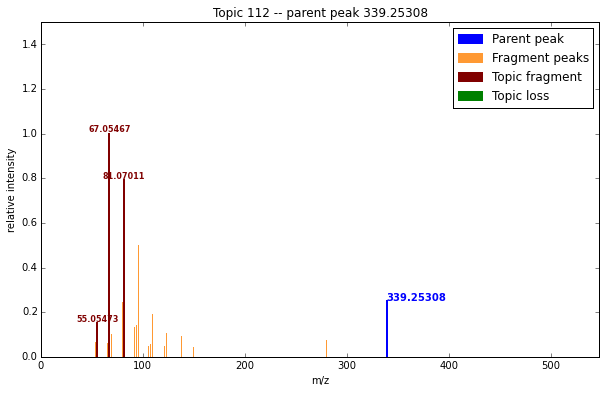

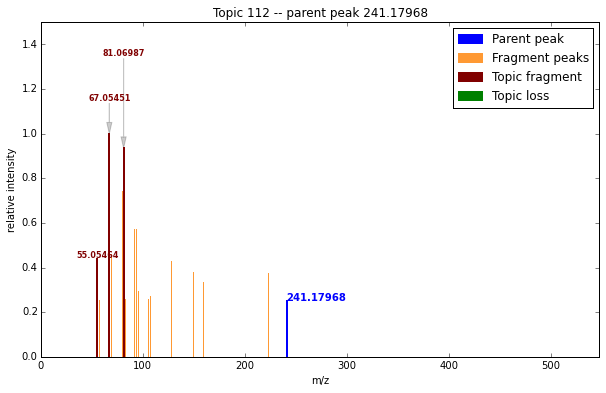

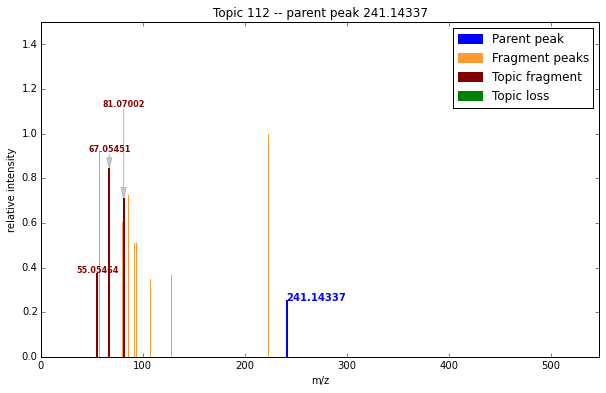

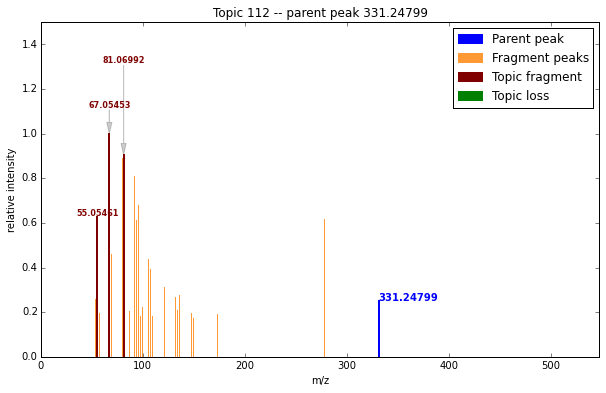

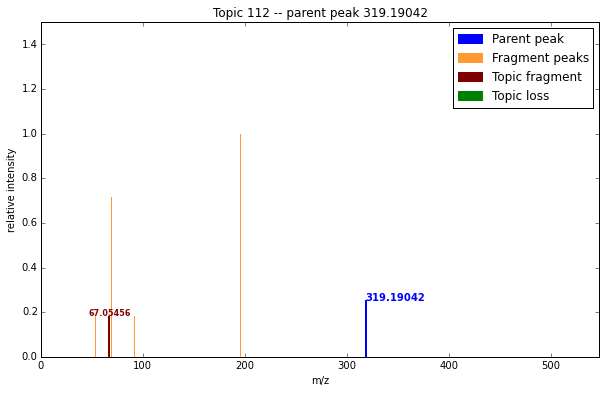

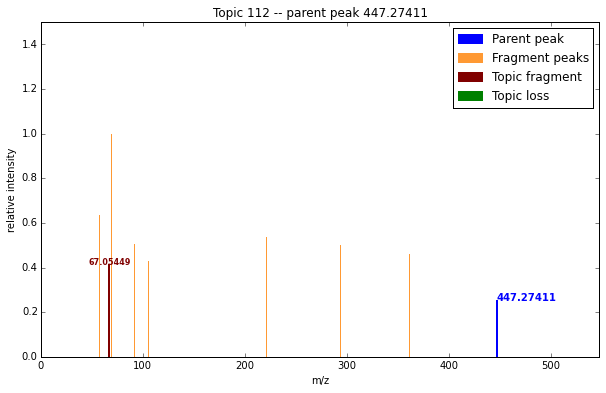

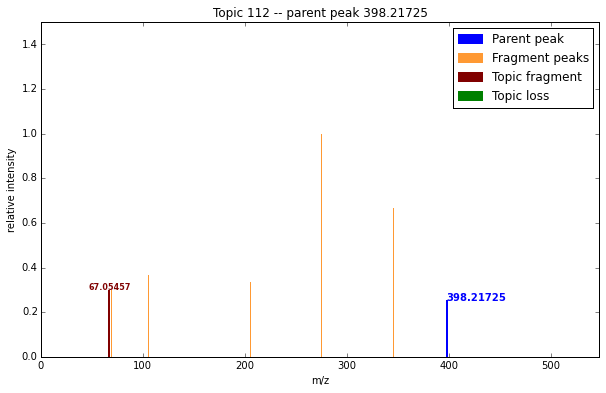

Topic 134 h-index=3

- bag 0:
	fragment_157.10848 (0.111459968603), 
	fragment_98.05999 (0.100246692083), 
	fragment_114.10281 (0.0643642072214), 
	fragment_115.08711 (0.052403378934), 
	fragment_295.09461 (0.051655827166), 

- bag 1:

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    10467	306.16862	636.638		2.560e+06	0.900
2    6523 	469.20801	494.747		1.176e+06	0.735
3    8204 	307.09988	614.695		1.755e+06	0.148

Fragments

1    fragment_157.10848 (0.111)
 peakID  MSnParentPeakID  mz        rt       intensity
 19231    6523            157.1085  491.420  0.864650 
 21869    8204            157.1084  612.455  0.100727 
 24125   10467            157.1085  639.006  0.531837 
2    fragment_98.05999 (0.100)
 peakID  MSnParentPeakID  mz         rt       intensity
 19230    6523            98.059969  491.420  1.000000 
 21866    8204            98.059940  612.455  0.125325 
 24123   10467            98.060050  639.006  0.734430 
3    fragment_114.10281 (0.064)
 peakID  MSnParentPe

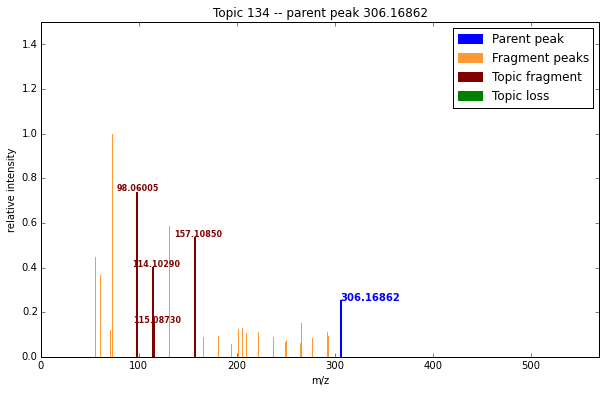

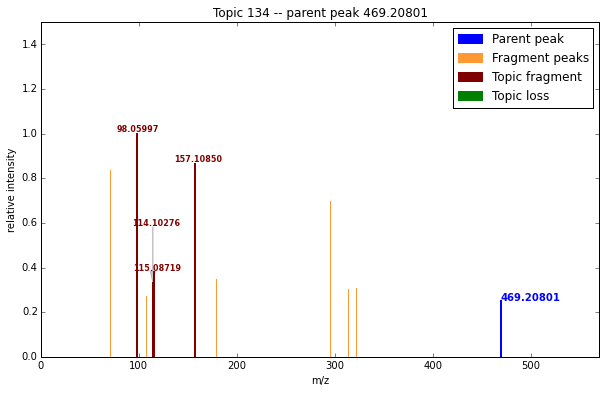

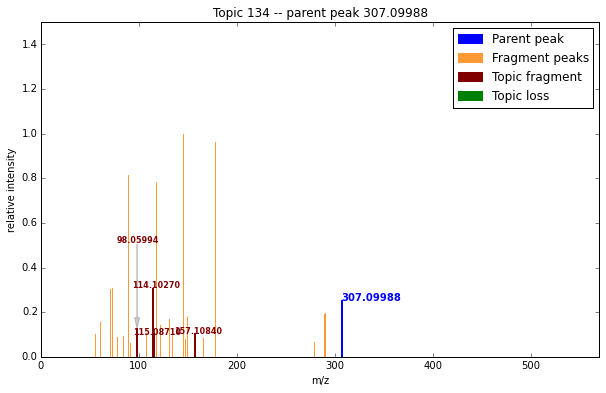

Topic 138 h-index=3

- bag 0:
	fragment_55.01824 (0.357695654165), 
	fragment_224.12739 (0.137427302285), 
	fragment_143.01554 (0.0916334661355), 
	fragment_242.13989 (0.082932637267), 
	fragment_143.01708 (0.0678206713376), 
	fragment_89.00601 (0.0627833493612), 

- bag 1:
	loss_18.00904 (0.230641478098), 

- bag 2:
	mzdiff_154.06279 (0.0502755971271), 
	mzdiff_172.07494 (0.0502755971271), 

Parent peaks

     peakID	mz		rt		int		score
1    3518 	515.41319	279.485		5.549e+05	0.871
2    2652 	560.47099	223.606		6.039e+06	0.837
3    3517 	515.41312	223.606		1.255e+07	0.829
4    9597 	85.02839	669.781		4.118e+06	0.802
5    3743 	532.43947	223.606		6.335e+07	0.798
6    10237	260.14913	857.431		4.439e+05	0.603
7    10793	260.14908	955.832		3.927e+05	0.456
8    10391	134.08113	662.160		2.677e+06	0.407
9    10792	260.14913	972.508		5.080e+05	0.356
10   5674 	108.04439	422.465		3.750e+07	0.333
11   7182 	144.06557	437.038		4.314e+06	0.312
12   9342 	109.02845	668.607		1.310e+06	0.252

Fragmen

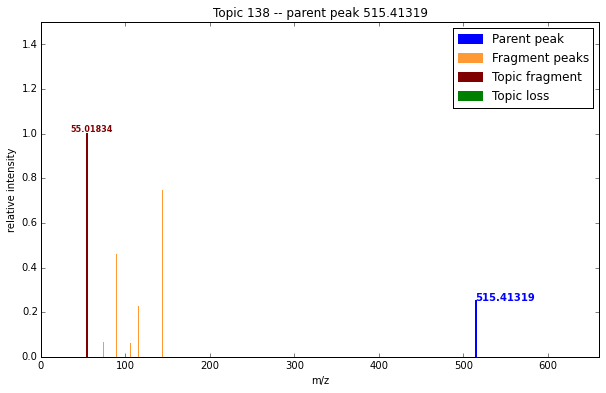

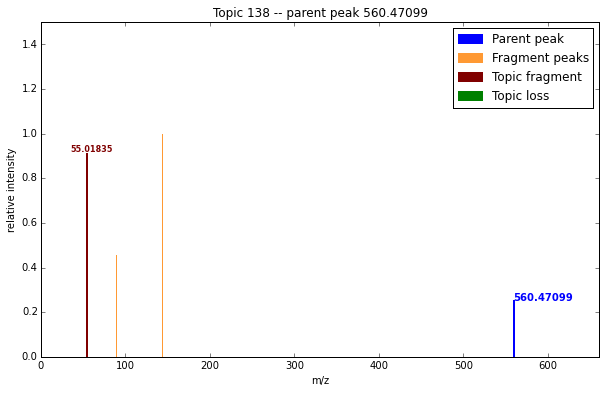

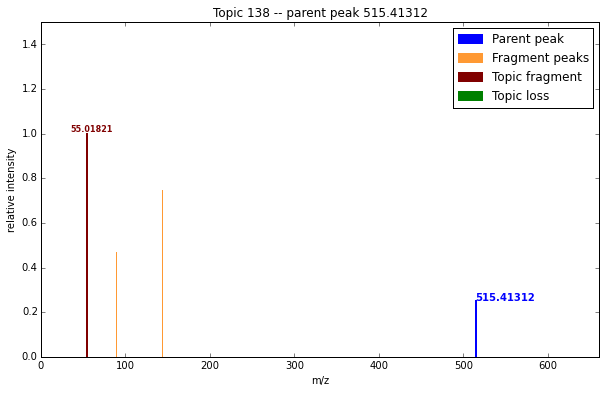

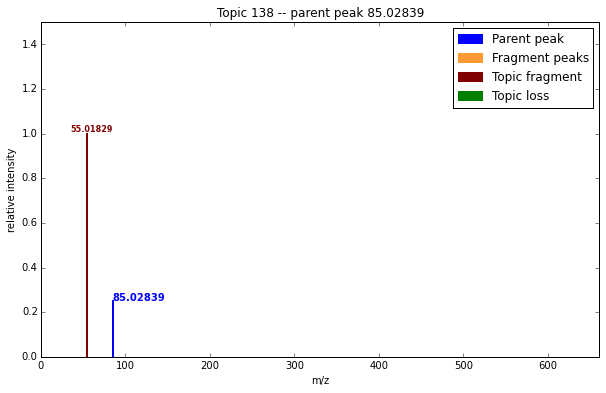

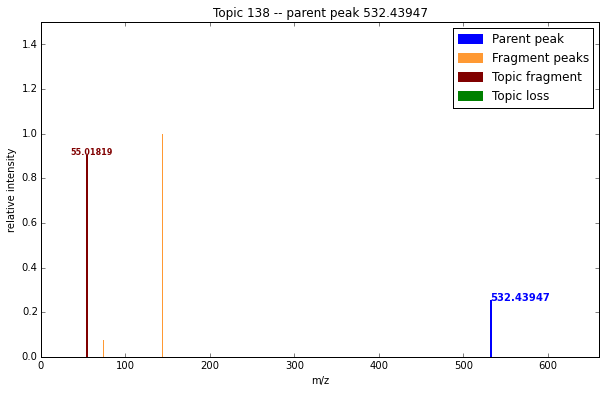

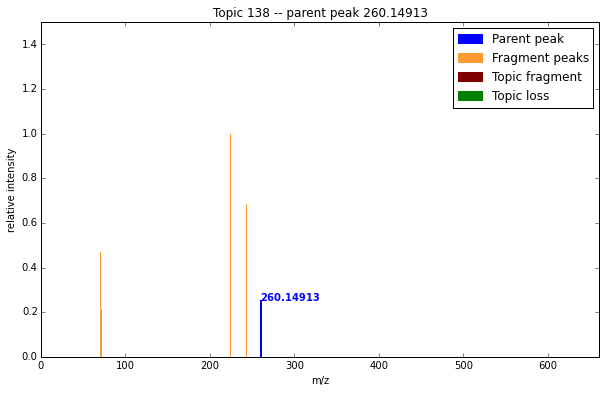

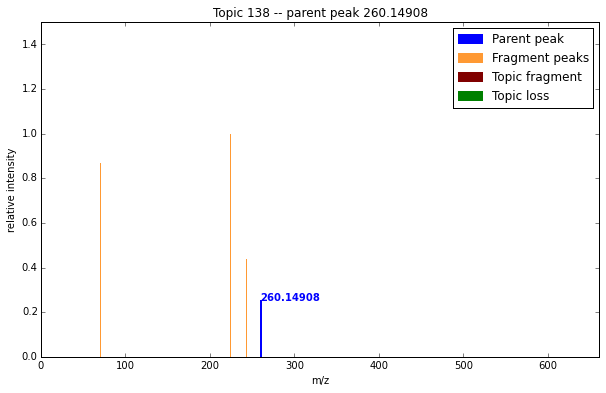

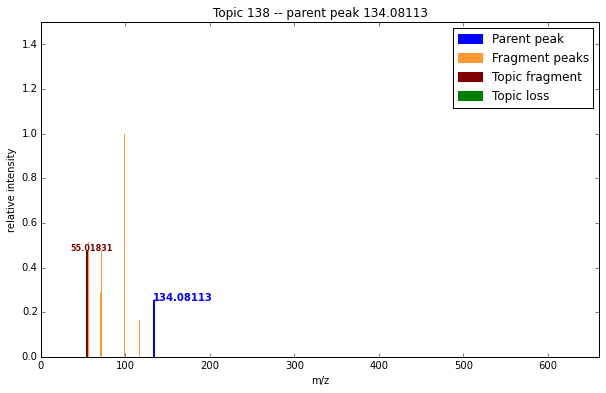

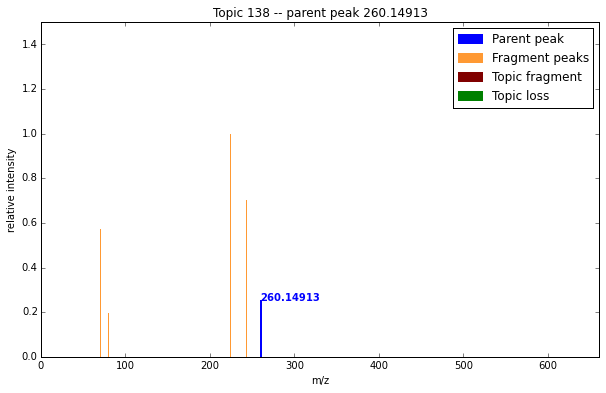

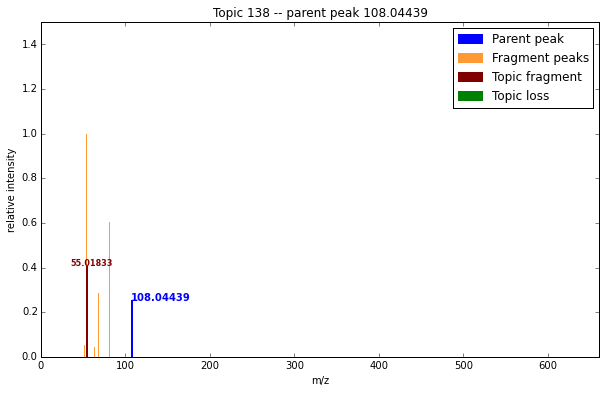

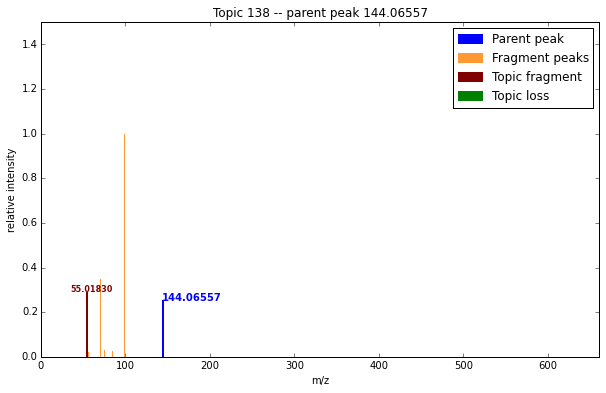

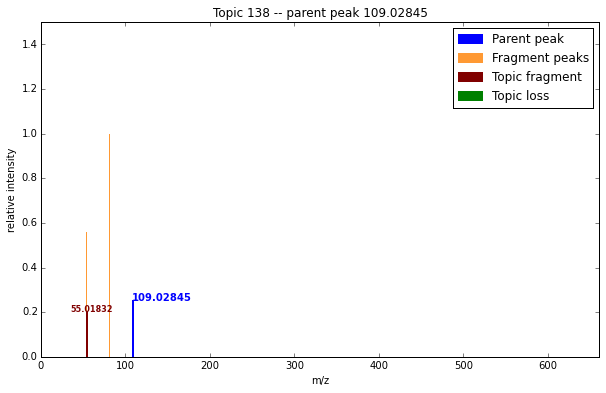

Topic 141 h-index=3

- bag 0:
	fragment_127.0387 (0.354503270532), 
	fragment_103.03868 (0.168334544641), 
	fragment_99.04366 (0.0844747582043), 
	fragment_73.0647 (0.060434952759), 

- bag 1:

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    3498 	397.17058	310.690		9.093e+05	0.692
2    5182 	414.19714	416.080		1.267e+06	0.626
3    4097 	414.19704	310.690		1.786e+06	0.574
4    4169 	379.15988	309.802		1.099e+06	0.573
5    7149 	486.18176	520.119		7.602e+05	0.262
6    4079 	370.17083	311.220		9.411e+05	0.225
7    3558 	307.10232	310.690		3.766e+05	0.179

Fragments

1    fragment_127.0387 (0.355)
 peakID  MSnParentPeakID  mz          rt       intensity
 15543   3498             127.038833  303.233  1        
 15604   3558             127.038778  308.143  1        
 15903   4079             127.038701  305.010  1        
 15943   4097             127.038744  300.070  1        
 16030   4169             127.038738  319.107  1        
 17031   5182             127.038787  415.96

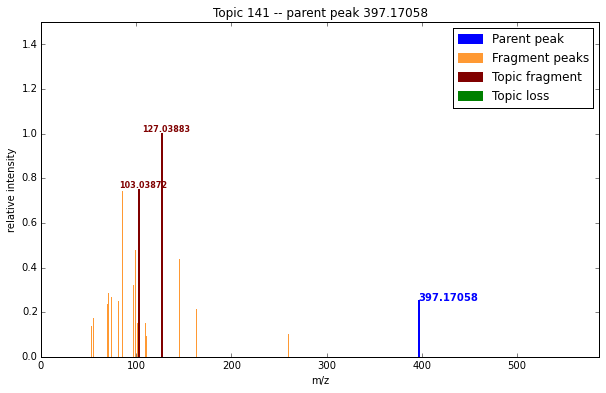

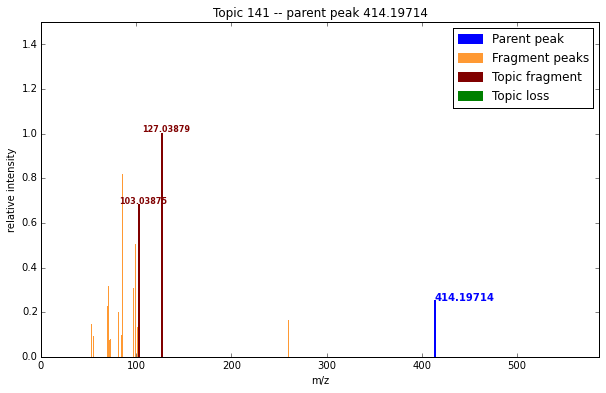

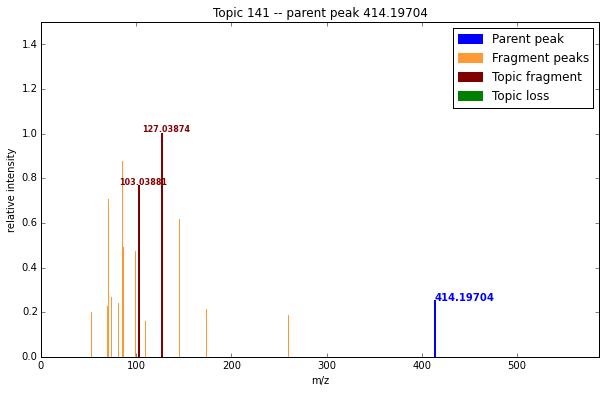

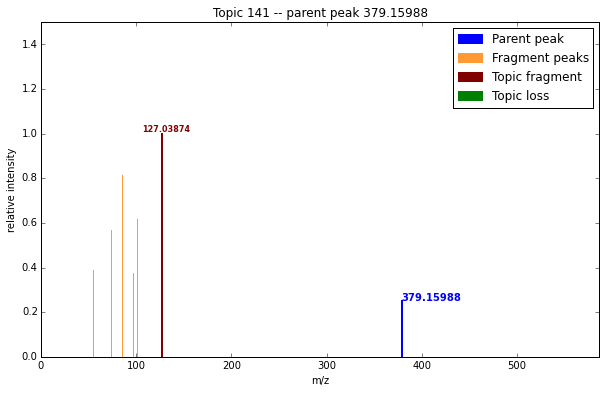

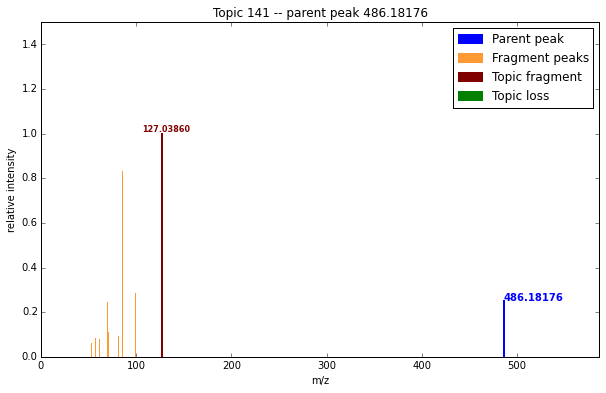

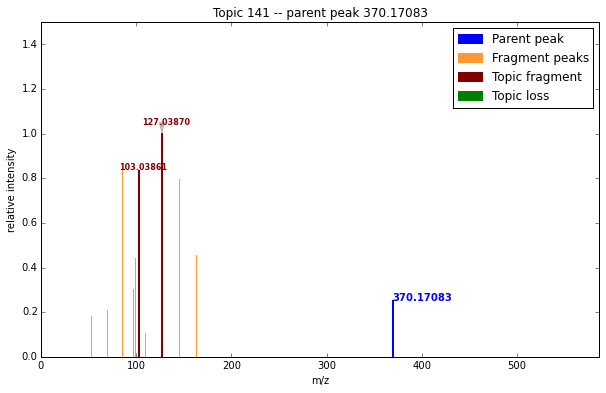

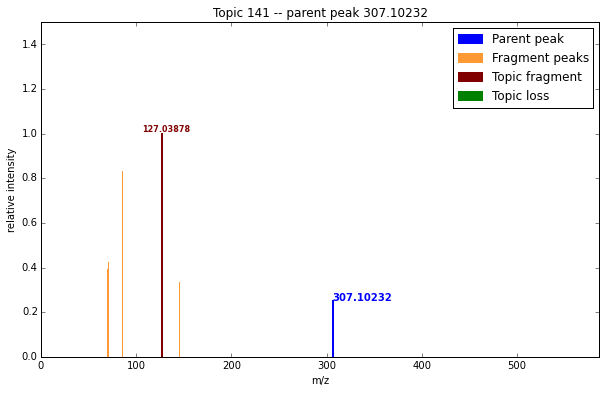

Topic 151 h-index=3

- bag 0:
	fragment_120.08041 (0.54234559155), 
	fragment_103.05449 (0.128228247569), 
	fragment_166.08632 (0.0631802666323), 

- bag 1:
	loss_157.03751 (0.184250894836), 
	loss_193.07363 (0.0785750809613), 
	loss_111.0318 (0.0581216976308), 

- bag 2:
	mzdiff_17.02602 (0.0682312860793), 

Parent peaks

     peakID	mz		rt		int		score
1    7115 	166.08624	499.470		1.505e+07	1.312
2    5636 	166.12268	282.730		8.102e+05	1.157
3    3995 	277.11822	290.983		7.819e+05	0.852
4    7117 	166.08629	290.983		6.524e+05	0.613
5    1323 	292.19063	221.946		5.747e+05	0.417
6    6387 	240.12291	382.238		7.140e+05	0.296
7    2816 	471.22375	289.342		3.912e+05	0.111
8    5777 	310.12846	372.653		7.748e+05	0.092
9    3297 	277.15831	299.240		7.832e+05	0.071
10   3768 	236.11278	241.536		1.771e+07	0.052

Fragments

1    fragment_120.08041 (0.542)
 peakID  MSnParentPeakID  mz          rt       intensity
 13377   1323             120.080319  220.990  1.000000 
 14983   2816             

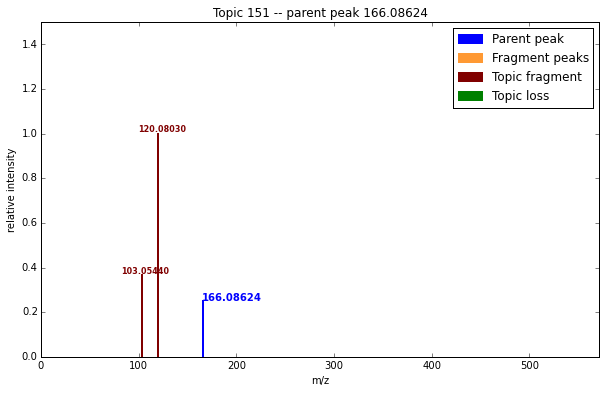

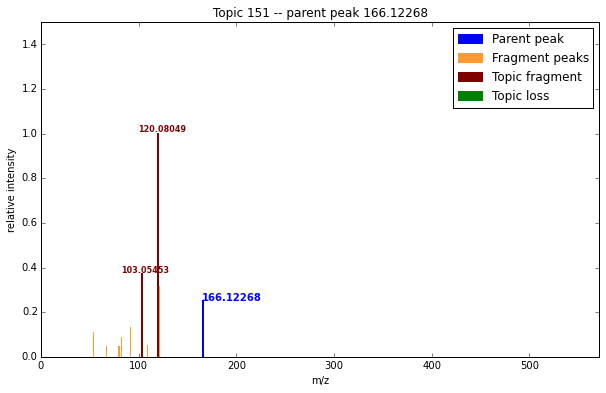

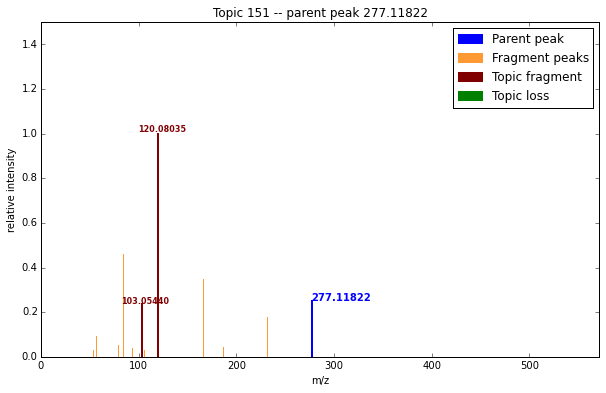

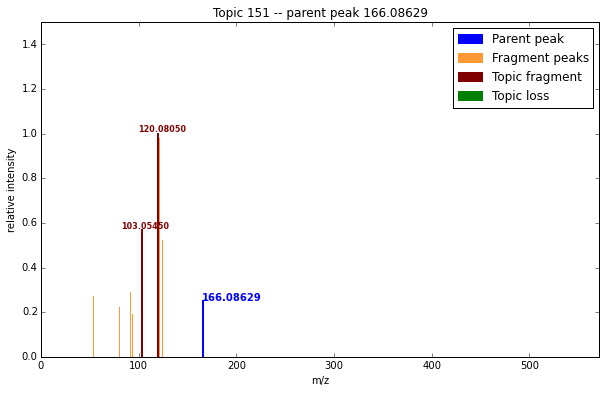

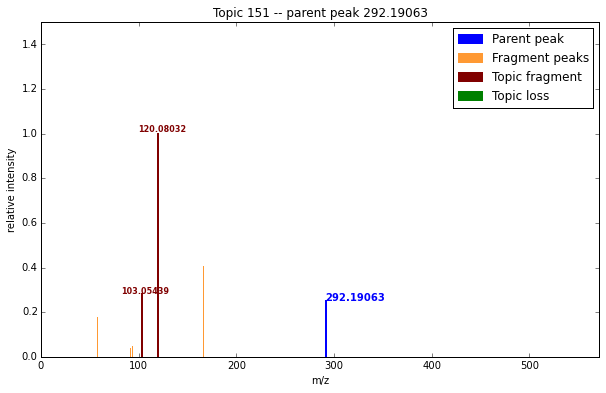

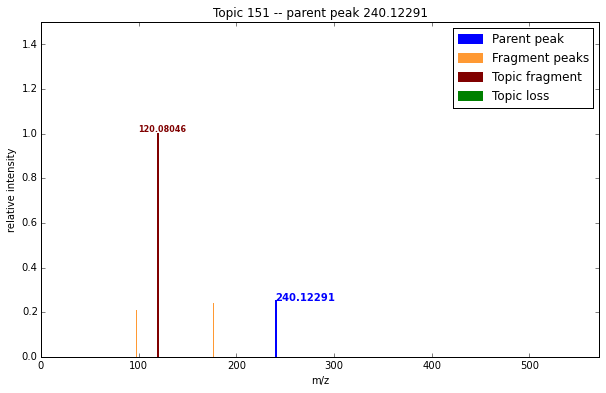

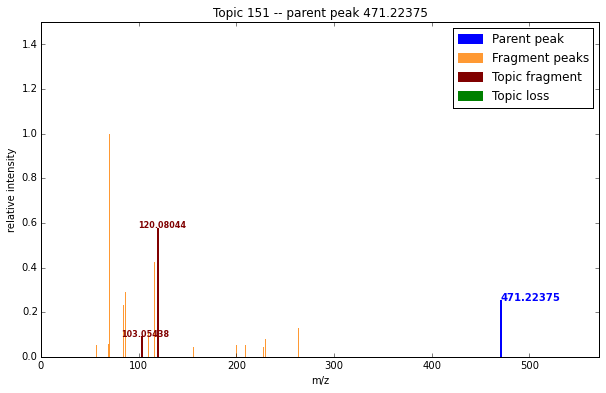

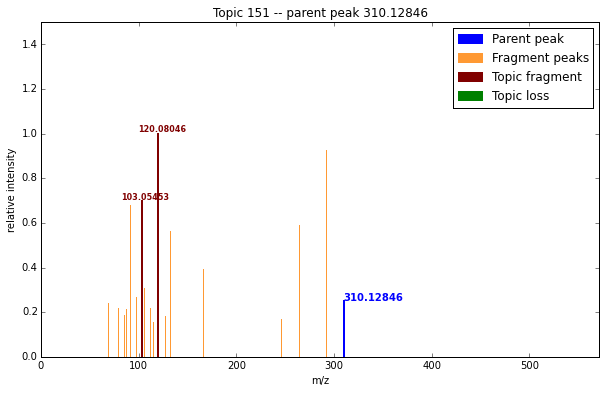

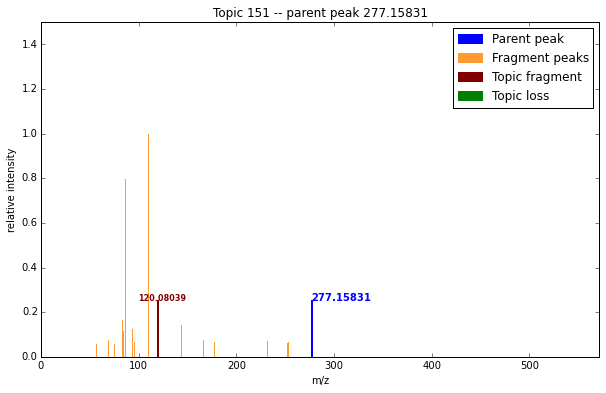

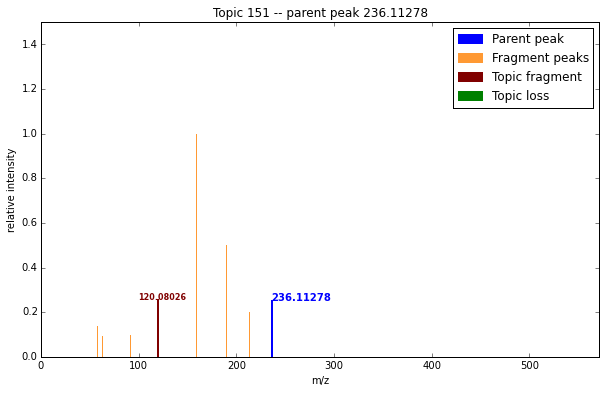

Topic 155 h-index=3

- bag 0:
	fragment_110.07176 (0.527185838982), 
	fragment_83.06042 (0.100014629151), 
	fragment_156.07692 (0.0702686887404), 

- bag 1:
	loss_100.027 (0.0531888076632), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    10451	156.07680	668.607		3.111e+06	1.626
2    10449	156.07677	620.990		1.158e+08	1.405
3    10450	156.07680	752.158		1.105e+06	1.189
4    1326 	310.21253	241.536		1.244e+06	0.803
5    3171 	553.30974	297.637		6.032e+05	0.798
6    6657 	362.21650	502.727		6.763e+05	0.742
7    3297 	277.15831	299.240		7.832e+05	0.731
8    4807 	251.15018	412.921		1.936e+06	0.469
9    6191 	198.08732	479.488		9.729e+05	0.411
10   5603 	254.10221	294.270		4.091e+05	0.156
11   6060 	364.16146	465.402		1.230e+06	0.072
12   6514 	267.05863	499.470		9.268e+05	0.057

Fragments

1    fragment_110.07176 (0.527)
 peakID  MSnParentPeakID  mz          rt       intensity
 13388    1326            110.071840  238.931  1.000000 
 15142    3171            110.071706  296.6

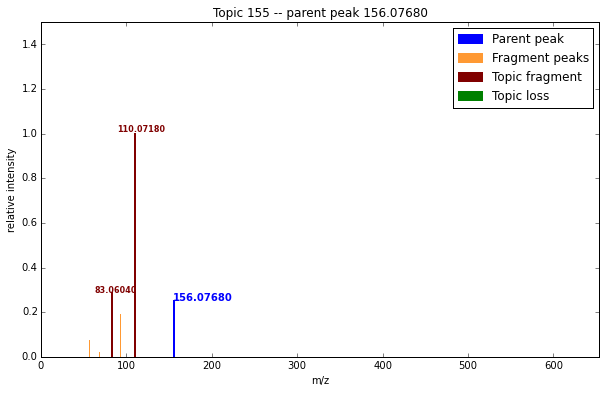

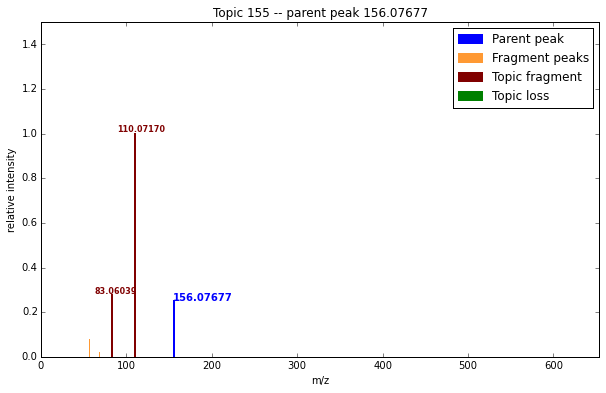

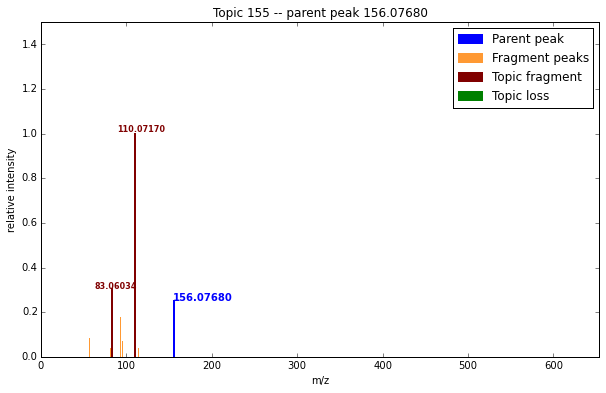

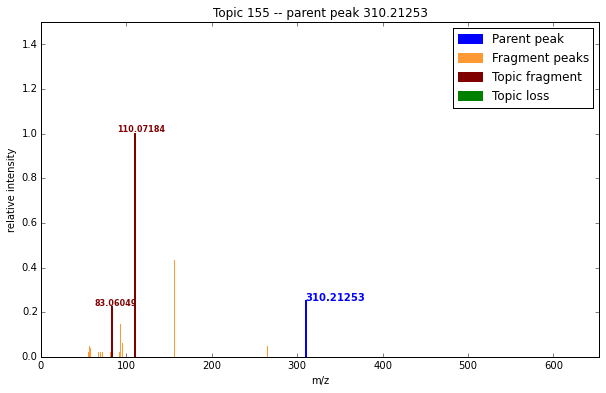

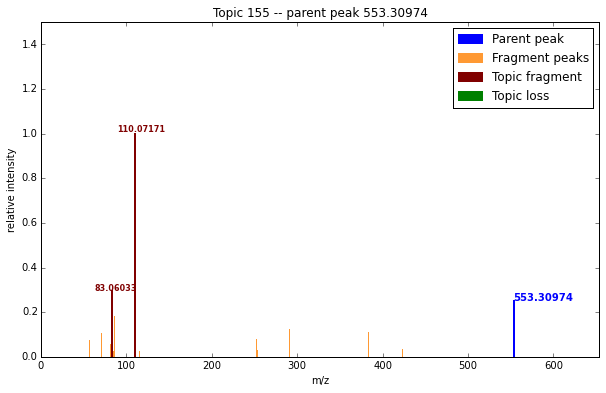

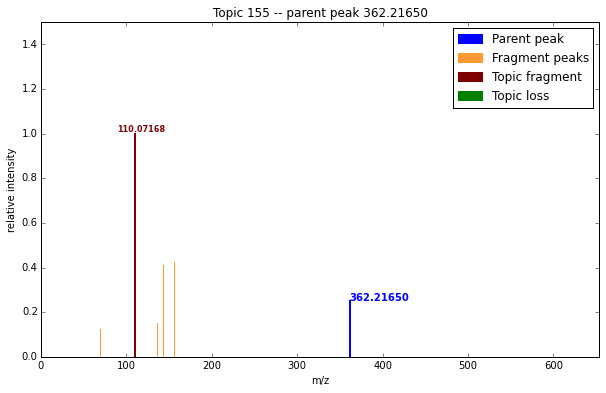

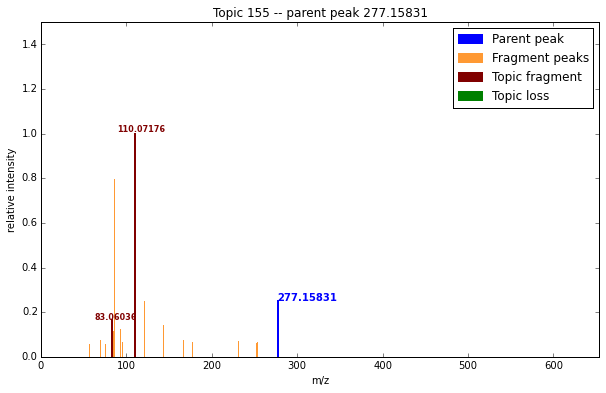

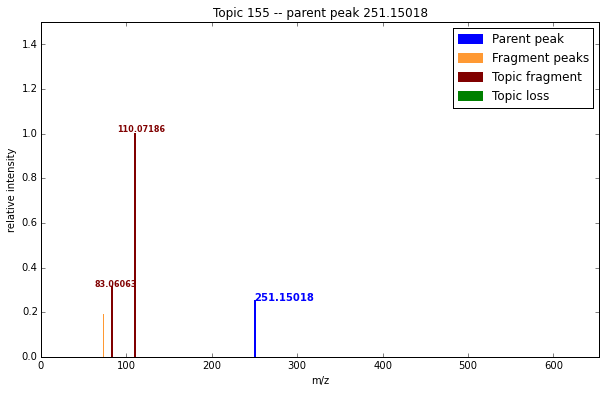

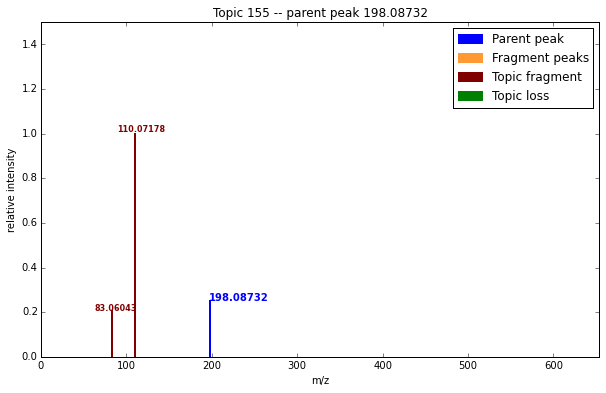

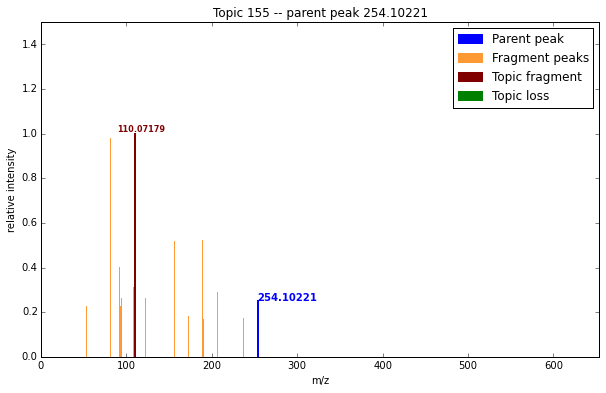

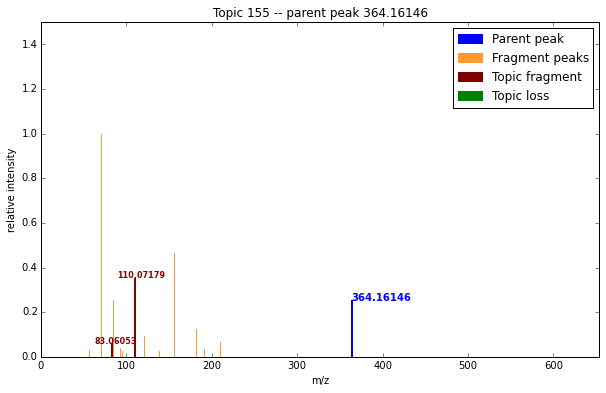

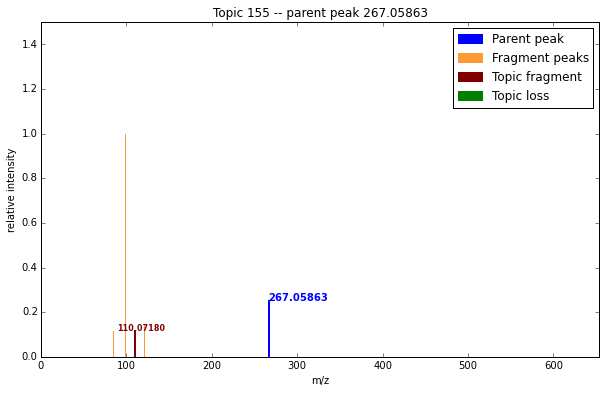

Topic 164 h-index=3

- bag 0:
	fragment_104.10731 (0.360497005653), 
	fragment_60.08102 (0.0683382772709), 
	fragment_86.09652 (0.0666592041193), 
	fragment_280.09383 (0.0560250741591), 
	fragment_221.01905 (0.0560250741591), 
	fragment_101.04037 (0.0560250741591), 

- bag 1:

- bag 2:
	mzdiff_44.02618 (0.0603674540682), 

Parent peaks

     peakID	mz		rt		int		score
1    8086 	794.29776	606.606		6.344e+05	0.842
2    8280 	296.06569	606.606		3.088e+06	0.761
3    8559 	420.16289	635.166		7.706e+06	0.722
4    8344 	280.09177	606.606		6.464e+07	0.629
5    9948 	258.10999	605.017		1.105e+09	0.619
6    10539	204.14012	929.629		5.989e+05	0.553
7    10369	266.15963	872.604		1.876e+07	0.549
8    6948 	300.12057	513.775		1.034e+06	0.317

Fragments

1    fragment_104.10731 (0.360)
 peakID  MSnParentPeakID  mz        rt       intensity
 19742    6948            104.1074  514.460  0.852456 
 21791    8086            104.1074  606.209  0.745251 
 21922    8280            104.1075  615.105  1.000000

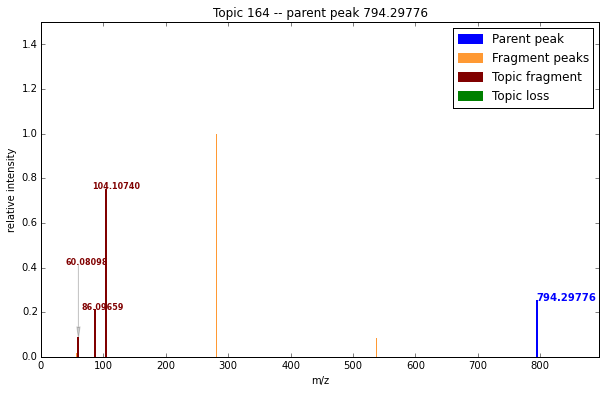

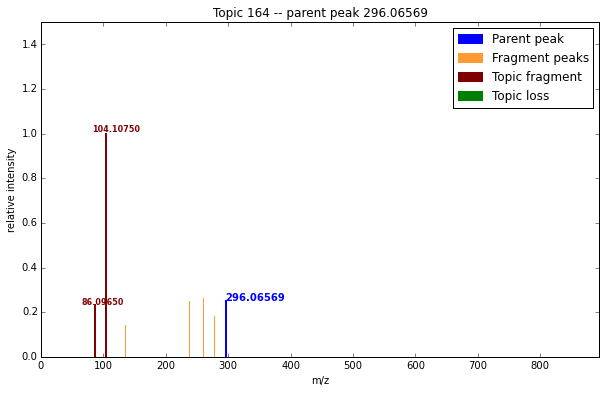

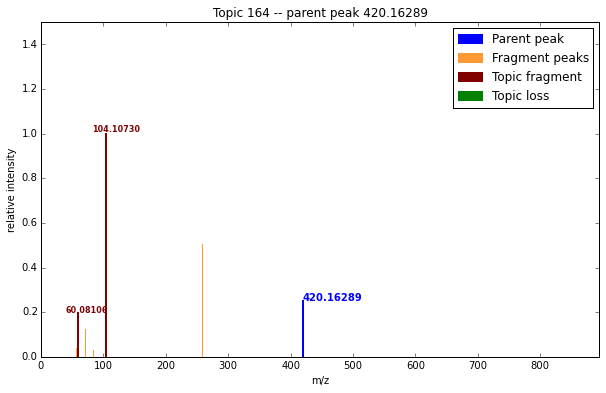

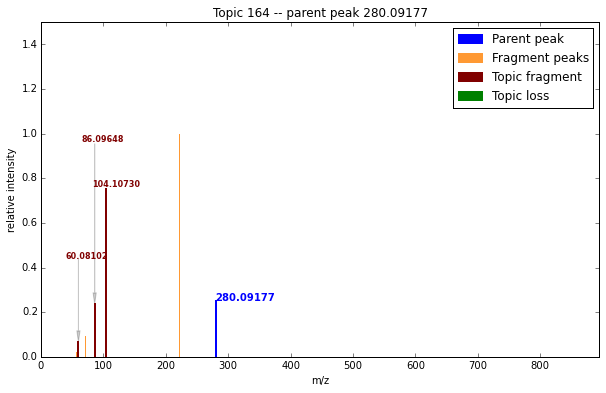

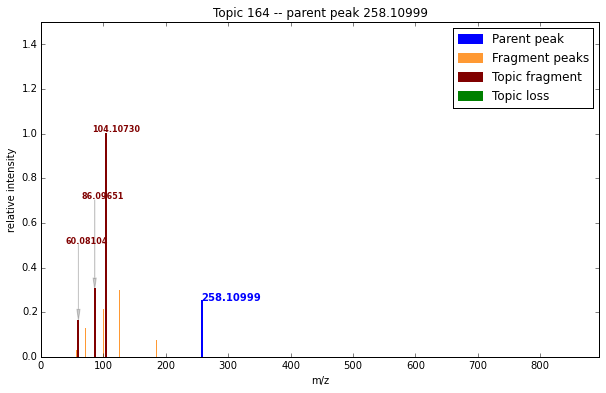

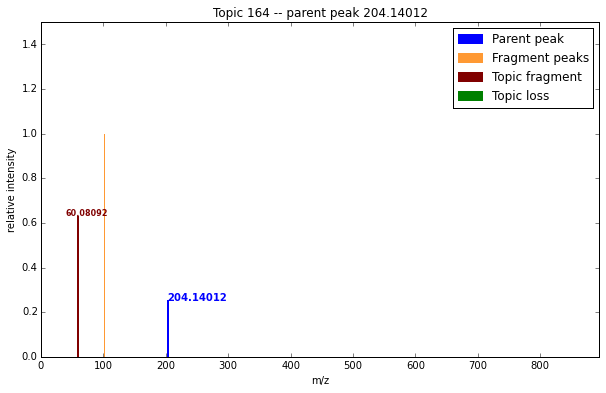

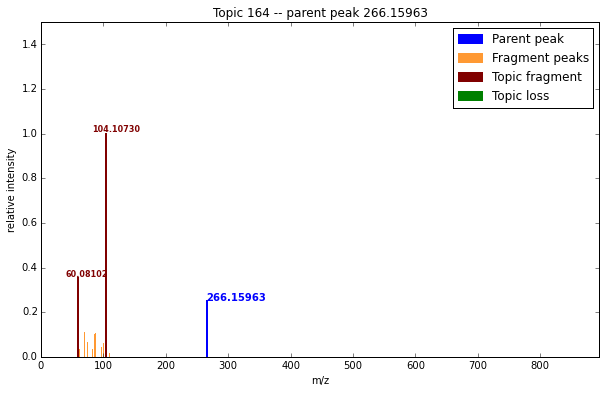

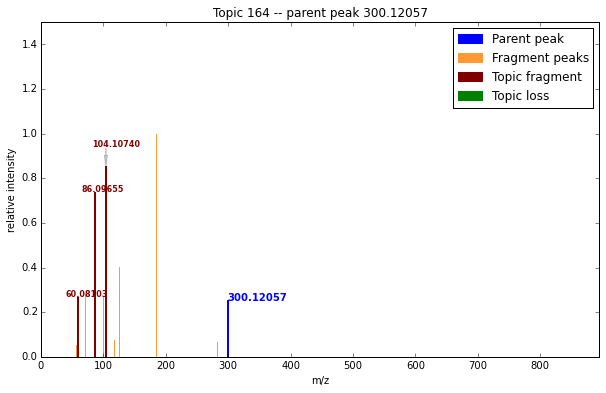

Topic 165 h-index=3

- bag 0:
	fragment_209.09245 (0.185522371489), 
	fragment_84.04422 (0.144443210836), 
	fragment_181.09784 (0.0534029088487), 

- bag 1:
	loss_161.06862 (0.169623280845), 

- bag 2:

Parent peaks

     peakID	mz		rt		int		score
1    6221 	355.16116	435.357		3.710e+06	0.869
2    6441 	370.16089	491.538		9.673e+05	0.799
3    5097 	452.21375	419.222		9.211e+05	0.756
4    5723 	324.15548	374.230		1.094e+06	0.195

Fragments

1    fragment_209.09245 (0.186)
 peakID  MSnParentPeakID  mz          rt       intensity
 16967   5097             209.092610  419.103  0.644713 
 17817   5723             209.092943  380.351  0.094926 
 18589   6221             209.093081  439.076  0.115004 
 19034   6441             209.092441  489.075  0.859829 
2    fragment_84.04422 (0.144)
 peakID  MSnParentPeakID  mz         rt       intensity
 16968   5097             84.044243  419.103  0.359990 
 17814   5723             84.044247  380.351  0.269672 
 18584   6221             84.044770  439

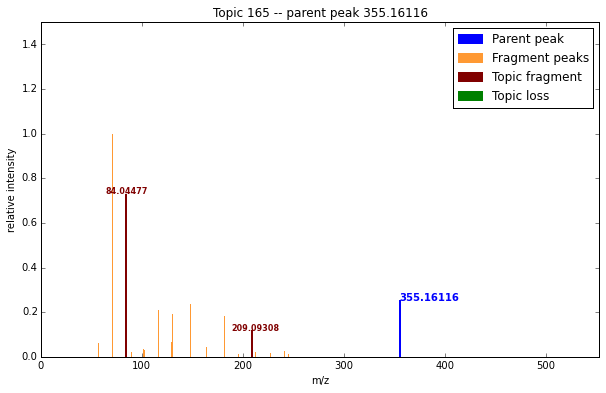

In [ ]:
ms2lda.plot_lda_fragments(consistency=0.50, sort_by="h_index")
# ms2lda.plot_lda_fragments(consistency=0.50, sort_by="in_degree")